In [1]:
import pandas as pd
import polars as pl
import numpy as np
import os
import logging
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [2]:
def color_scale(val):
    color = plt.cm.viridis(val / 100)  # Usar colormap viridis
    return f'background-color: rgba({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}, {color[3]})'

In [3]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [4]:
os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-personas/src")
import data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes as backtesting
import data_bbog_integration_fabrica_personas.pipelines.models.nodes as models
import data_bbog_integration_fabrica_personas.pipelines.model_selection.nodes as ms

In [5]:
%load_ext kedro.ipython

[01/24/25 19:27:56] INFO     Resolved project path as:                                              ]8;id=63867;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=531823;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[01/24/25 19:27:56] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=850882;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=431139;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=455061;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=222269;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/__init__.py:44: KedroDeprecationWarning:                             
                             'AbstractDataSet' has been renamed to 'AbstractDataset', and the alias                
                             will be removed in Kedro 0.19.0                                                       
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=215741;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=144221;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

[01/24/25 19:27:57] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=680143;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=144779;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=856026;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=518481;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=794806;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=732014;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [6]:
%reload_kedro

                    INFO     Resolved project path as:                                              ]8;id=387190;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=496710;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[01/24/25 19:27:57] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=947163;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=989486;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=621898;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=651607;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/__init__.py:44: KedroDeprecationWarning:                             
                             'AbstractDataSet' has been renamed to 'AbstractDataset', and the alias                
                             will be removed in Kedro 0.19.0                                                       
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=914277;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=114590;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=663978;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=63148;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [7]:
params1= catalog.list
params= catalog.load("parameters")

                    INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=708221;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=270634;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

### models:

In [8]:
info_save_all = catalog.load('info_save_all')

[01/24/25 15:01:57] INFO     Loading data from 'info_save_all' (PickleDataSet)...               ]8;id=149503;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=352024;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [9]:
info_save_all_anterior = catalog.load('info_save_all_anterior')

[01/17/25 13:40:22] INFO     Loading data from 'info_save_all_anterior' (PickleDataSet)...      ]8;id=112000;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=850006;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [9]:
info_save_all.keys()

dict_keys(['nodo_run', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'all_results', 'best_model_metrics_dataset', 'select_model'])

In [10]:
info_save_all['best_model_metrics_dataset']# experimento 2

model_name dataset_name metric_name   metric_type class_name  \
26  Run3,random_forest_2         test    f1-score  class metric        1.0   
24  Run3,random_forest_2         test   precision  class metric        1.0   
97      Run11,xgboost_10         test      recall  class metric        1.0   
23  Run3,random_forest_2        train    f1-score  class metric        1.0   
21  Run3,random_forest_2        train   precision  class metric        1.0   
94      Run11,xgboost_10        train      recall  class metric        1.0   

      value  
26   8.2514  
24   4.4010  
97  88.5044  
23   8.3236  
21   4.4397  
94  99.9981

In [11]:
99.9981-88.5044

11.49369999999999

In [11]:
info_save_all['best_model_metrics_dataset']# expeimento 1

model_name dataset_name metric_name   metric_type class_name  \
53  Run6,random_forest_5         test    f1-score  class metric        1.0   
51  Run6,random_forest_5         test   precision  class metric        1.0   
97      Run11,xgboost_10         test      recall  class metric        1.0   
50  Run6,random_forest_5        train    f1-score  class metric        1.0   
48  Run6,random_forest_5        train   precision  class metric        1.0   
13        Run2,xgboost_1        train      recall  class metric        1.0   

      value  
53   8.3532  
51   4.4550  
97  90.3209  
50   8.4251  
48   4.4934  
13  99.9906

In [14]:
99.9878-90.3209

9.666899999999998

In [13]:
info_save_all['all_results'][(info_save_all['all_results']['model_name'] == 'Run11,xgboost_10') & (info_save_all['all_results']['metric_name'] == 'recall')]

model_name dataset_name metric_name     metric_type      class_name  \
2   Run11,xgboost_10      balance      recall  overall metric  overall metric   
13  Run11,xgboost_10      balance      recall    class metric             0.0   
14  Run11,xgboost_10      balance      recall    class metric             1.0   
2   Run11,xgboost_10        train      recall  overall metric  overall metric   
13  Run11,xgboost_10        train      recall    class metric             0.0   
14  Run11,xgboost_10        train      recall    class metric             1.0   
2   Run11,xgboost_10         test      recall  overall metric  overall metric   
13  Run11,xgboost_10         test      recall    class metric             0.0   
14  Run11,xgboost_10         test      recall    class metric             1.0   

      value  
2   99.9920  
13  96.7731  
14  99.9920  
2   99.9878  
13  84.3416  
14  99.9878  
2   90.3209  
13  84.2345  
14  90.3209

In [15]:
info_save_all_anterior['best_model_metrics_dataset']

model_name dataset_name metric_name   metric_type class_name    value
35   Run4,xgboost_3         test    f1-score  class metric          1   5.8557
33   Run4,xgboost_3         test   precision  class metric          1   3.0419
25   Run3,xgboost_2         test      recall  class metric          1  83.8327
32   Run4,xgboost_3        train    f1-score  class metric          1   7.0431
30   Run4,xgboost_3        train   precision  class metric          1   3.6585
85  Run10,xgboost_9        train      recall  class metric          1  96.8529

In [17]:
89.9229-83.8327

6.090199999999996

In [16]:
info_save_all_anterior['all_results'][(info_save_all_anterior['all_results']['model_name'] == 'Run3,xgboost_2') & (info_save_all_anterior['all_results']['metric_name'] == 'recall')]

model_name dataset_name metric_name     metric_type      class_name  \
2   Run3,xgboost_2      balance      recall  overall metric  overall metric   
13  Run3,xgboost_2      balance      recall    class metric               0   
14  Run3,xgboost_2      balance      recall    class metric               1   
2   Run3,xgboost_2        train      recall  overall metric  overall metric   
13  Run3,xgboost_2        train      recall    class metric               0   
14  Run3,xgboost_2        train      recall    class metric               1   
2   Run3,xgboost_2         test      recall  overall metric  overall metric   
13  Run3,xgboost_2         test      recall    class metric               0   
14  Run3,xgboost_2         test      recall    class metric               1   

      value  
2   89.9229  
13  93.4903  
14  89.9229  
2   89.9229  
13  89.5347  
14  89.9229  
2   83.8327  
13  89.4995  
14  83.8327

info_save_all2 = info_save_all.copy()
for col in info_save_all.keys():
    if isinstance(col, int) and ('grid_search' not in info_save_all[col].keys()):
        del info_save_all2[col]

print(info_save_all2.keys())
print(info_save_all.keys())
info_save_last_all = models.evaluate_models_for_all(info_save_all2, params)
info_save_all_correct = models.compare_metrics_models(info_save_last_all, params)
print(info_save_all_correct.keys())

import pickle
import boto3
from io import BytesIO

# Configura el cliente de S3 (asegúrate de tener configuradas las credenciales de AWS)
s3_client = boto3.client('s3')

# Serializa el objeto en memoria (sin necesidad de archivo local)
pickle_buffer = BytesIO()
pickle.dump(info_save_all_correct, pickle_buffer)
pickle_buffer.seek(0)  # Vuelve al principio del buffer después de serializar


# Define el nombre del bucket y la ruta en S3
bucket_name = 'data-bbog-dev-sandbox-entity'
s3_key = 'casos-uso/fabrica-personas/AH/06-models/info_save_all.pickle'

# Sube el archivo pickle a S3
s3_client.upload_fileobj(pickle_buffer, bucket_name, s3_key)

print("Object has been pickled and uploaded to S3.")

In [18]:
for i in range(12):# expeirmento 1
    display(info_save_all[i]['Muestreo_tipo'])


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.65,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.65,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.65,
    'Use_auto': False
}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.5, 'Use_auto': False}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.5, 'Use_auto': False}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.5, 'Use_auto': False}


{
    'Type': 'Undersampling-Smote',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.8,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Smote',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.8,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Smote',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.8,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.62,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}

In [12]:
for i in range(12):# expeirmento 2
    display(info_save_all[i]['Muestreo_tipo'])


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.45,
    'sampling_strategy2': 0.6,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.45,
    'sampling_strategy2': 0.6,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.45,
    'sampling_strategy2': 0.6,
    'Use_auto': False
}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.7, 'Use_auto': False}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.7, 'Use_auto': False}

{'Type': 'Undersampling', 'sampling_strategy1': 0.8, 'sampling_strategy2': 0.7, 'Use_auto': False}

{'Type': 'Undersampling-Smote', 'sampling_strategy1': 0.6, 'sampling_strategy2': 0.6, 'Use_auto': True}

{'Type': 'Undersampling-Smote', 'sampling_strategy1': 0.6, 'sampling_strategy2': 0.6, 'Use_auto': True}

{'Type': 'Undersampling-Smote', 'sampling_strategy1': 0.6, 'sampling_strategy2': 0.6, 'Use_auto': True}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.5,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.5,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}


{
    'Type': 'Undersampling-Oversampling',
    'sampling_strategy1': 0.5,
    'sampling_strategy2': 0.95,
    'Use_auto': False
}

In [ ]:
# con eda
info_save_all[0]['Scaler'].reindex_OneHotEncoding

In [13]:
# sin eda, experimento 1 y 2
info_save_all[0]['Scaler'].reindex_OneHotEncoding

REINDEX    grupo_etario  \
llave                                                             
0                           grupo_etario__joven  _persona_mayor   
1                   grupo_etario__persona_mayor          _joven   
2                         ocupacion_comerciante             NaN   
3                         ocupacion_desempleado             NaN   
4                    ocupacion_empleado_entidad             NaN   
5                    ocupacion_empleado_privado             NaN   
6                    ocupacion_empleado_publico             NaN   
7                          ocupacion_estudiante             NaN   
8                   ocupacion_fuerzas_militares             NaN   
9                               ocupacion_hogar             NaN   
10                      ocupacion_independiente             NaN   
11                         ocupacion_pensionado             NaN   
12                   ocupacion_policia_nacional             NaN   
13                           ocupacion_politico             NaN   
14          ocupacion_profesional_independiente             NaN   
15                ocupacion_rentista_de_capital             NaN   
DROP_FIRST                                  NaN         _adulto   

                            ocupacion  
llave                                  
0                    empleado_privado  
1                          pensionado  
2                          estudiante  
3                               hogar  
4                       independiente  
5                 rentista_de_capital  
6                    empleado_publico  
7                    empleado_entidad  
8                         desempleado  
9                   fuerzas_militares  
10                        comerciante  
11          profesional_independiente  
12                   policia_nacional  
13                           politico  
14                                NaN  
15                                NaN  
DROP_FIRST                    artista

In [ ]:
# con EDA
info_temp = models.compare_metrics_models(info_save_all,params)

[01/17/25 14:58:08] INFO     Iniciando la comparacion de metricas sobre las datas generadas en         ]8;id=806188;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=208175;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#891\891]8;;\
                             Model_input:                                                                          

                    INFO     Graficos de desempeños en ['cohen_kappa', 'roc_auc'] calculadas tipo:     ]8;id=321447;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=702432;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#895\895]8;;\
                             ['overall metric']                                                                    

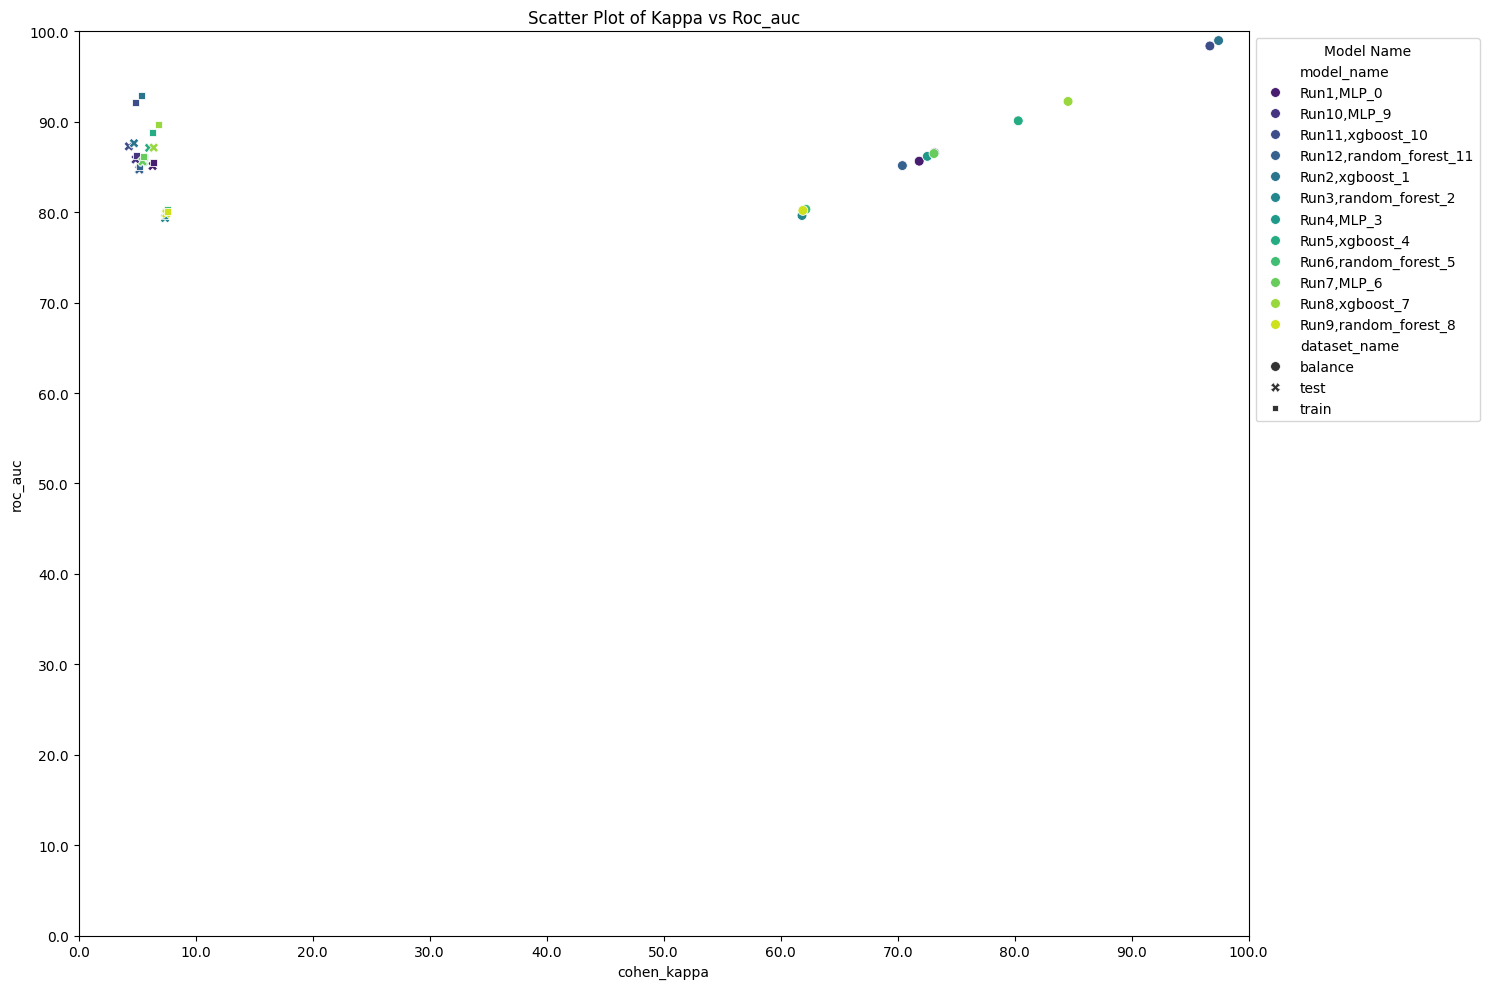

                    INFO     Graficos de desempeños en ['1', '1.0', 1, 1.0] calculadas sobre y         ]8;id=75313;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=138766;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#919\919]8;;\
                             f1-score                                                                              

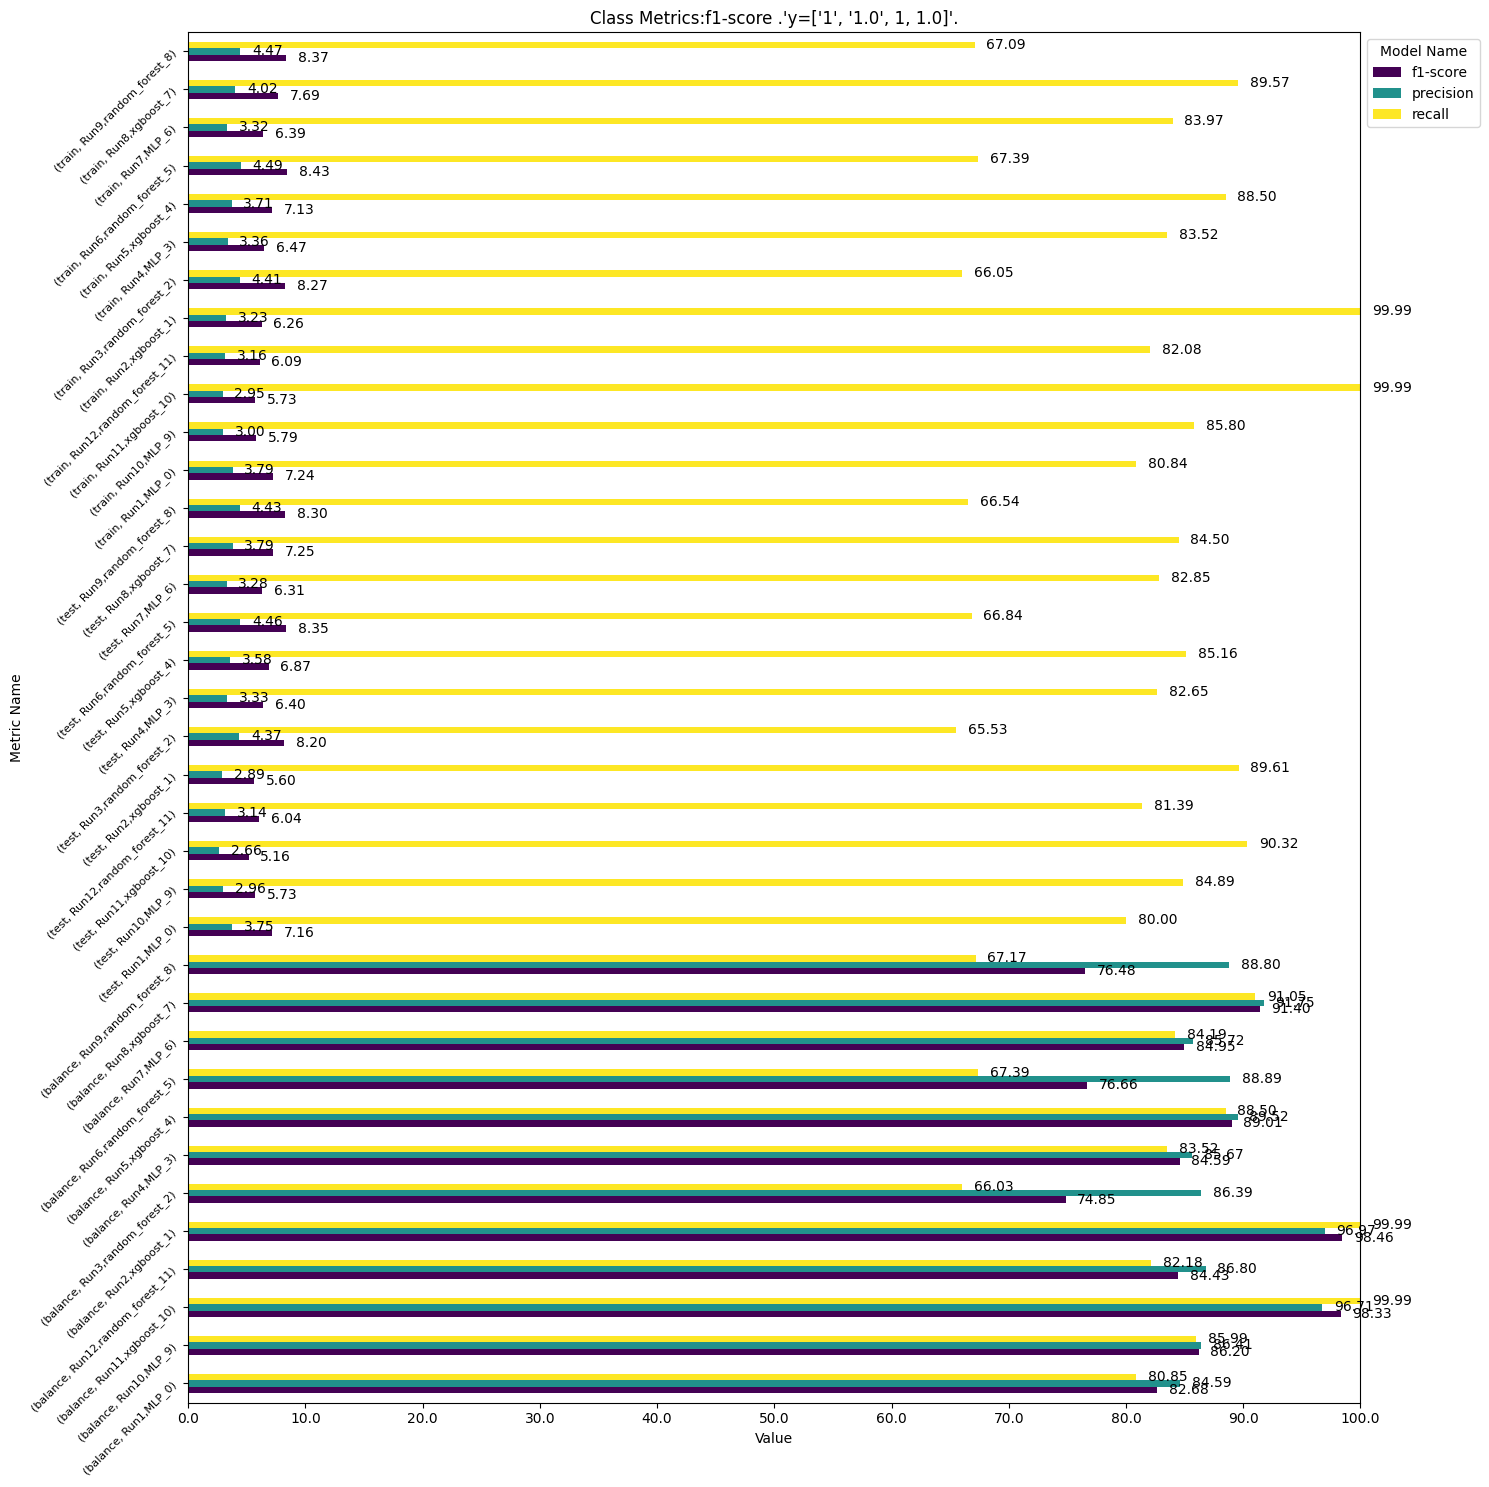

[01/17/25 14:58:09] INFO     Mejores algoritmos por metrica y dataset:                                 ]8;id=761143;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=863625;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#960\960]8;;\

model_name dataset_name metric_name   metric_type class_name  \
53  Run6,random_forest_5         test    f1-score  class metric        1.0   
51  Run6,random_forest_5         test   precision  class metric        1.0   
97      Run11,xgboost_10         test      recall  class metric        1.0   
50  Run6,random_forest_5        train    f1-score  class metric        1.0   
48  Run6,random_forest_5        train   precision  class metric        1.0   
13        Run2,xgboost_1        train      recall  class metric        1.0   

      value  
53   8.3532  
51   4.4550  
97  90.3209  
50   8.4251  
48   4.4934  
13  99.9906

                    INFO     Mejores algoritmos:                                                      ]8;id=280488;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=270670;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#1007\1007]8;;\

best_model_name   best_unbiased_model  \
model_name   Run6,random_forest_5  Run3,random_forest_2   
metric_name              f1-score              f1-score   
metric_type          class metric          class metric   
class_name                    1.0                   1.0   
test                       8.3532                8.1993   
balance                   76.6595                74.851   
train                      8.4251                 8.269   
bias                     -68.2344               -66.582   
real_bias                    True                  True   
test-train                -0.0719               -0.0697   
fitting               overfitting           overfitting   

                 best_fitting_model  
model_name   Run12,random_forest_11  
metric_name                f1-score  
metric_type            class metric  
class_name                      1.0  
test                         6.0448  
balance                     84.4252  
train                        6.0943  
bias                       -78.3309  
real_bias                      True  
test-train                  -0.0495  
fitting                 overfitting

In [10]:
# sin EDA, experimento 1
info_temp = models.compare_metrics_models(info_save_all,params)

[01/24/25 15:05:42] INFO     Iniciando la comparacion de metricas sobre las datas generadas en         ]8;id=750665;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=83484;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#891\891]8;;\
                             Model_input:                                                                          

                    INFO     Graficos de desempeños en ['cohen_kappa', 'roc_auc'] calculadas tipo:     ]8;id=650929;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=413253;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#895\895]8;;\
                             ['overall metric']                                                                    

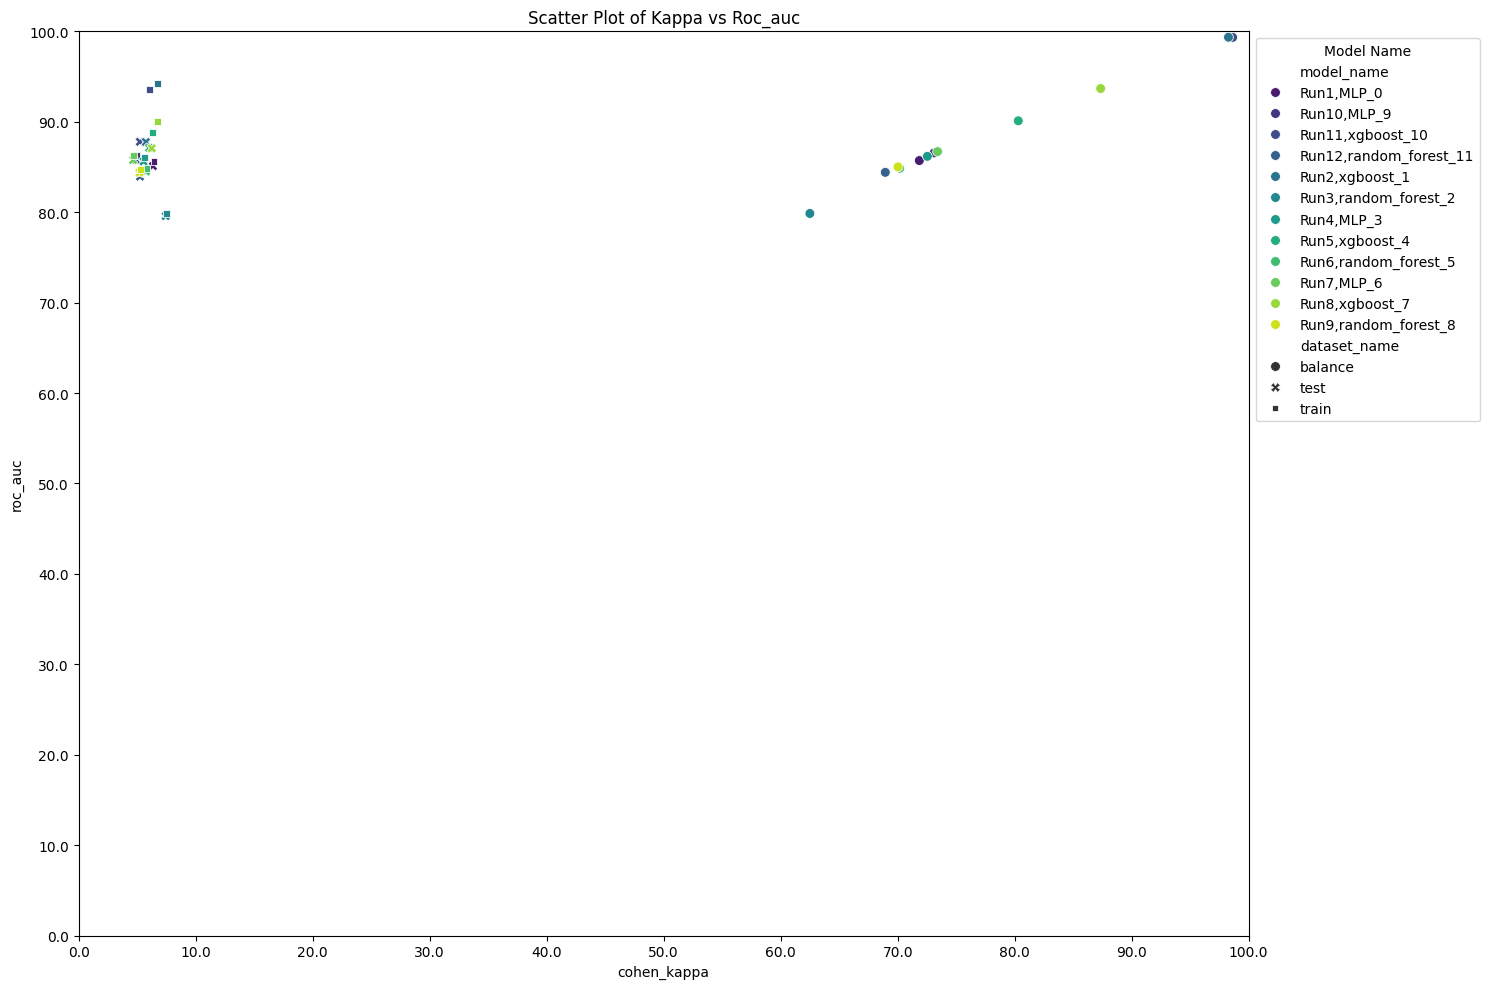

[01/24/25 15:05:43] INFO     Graficos de desempeños en ['1', '1.0', 1, 1.0] calculadas sobre y         ]8;id=311126;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=49117;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#919\919]8;;\
                             f1-score                                                                              

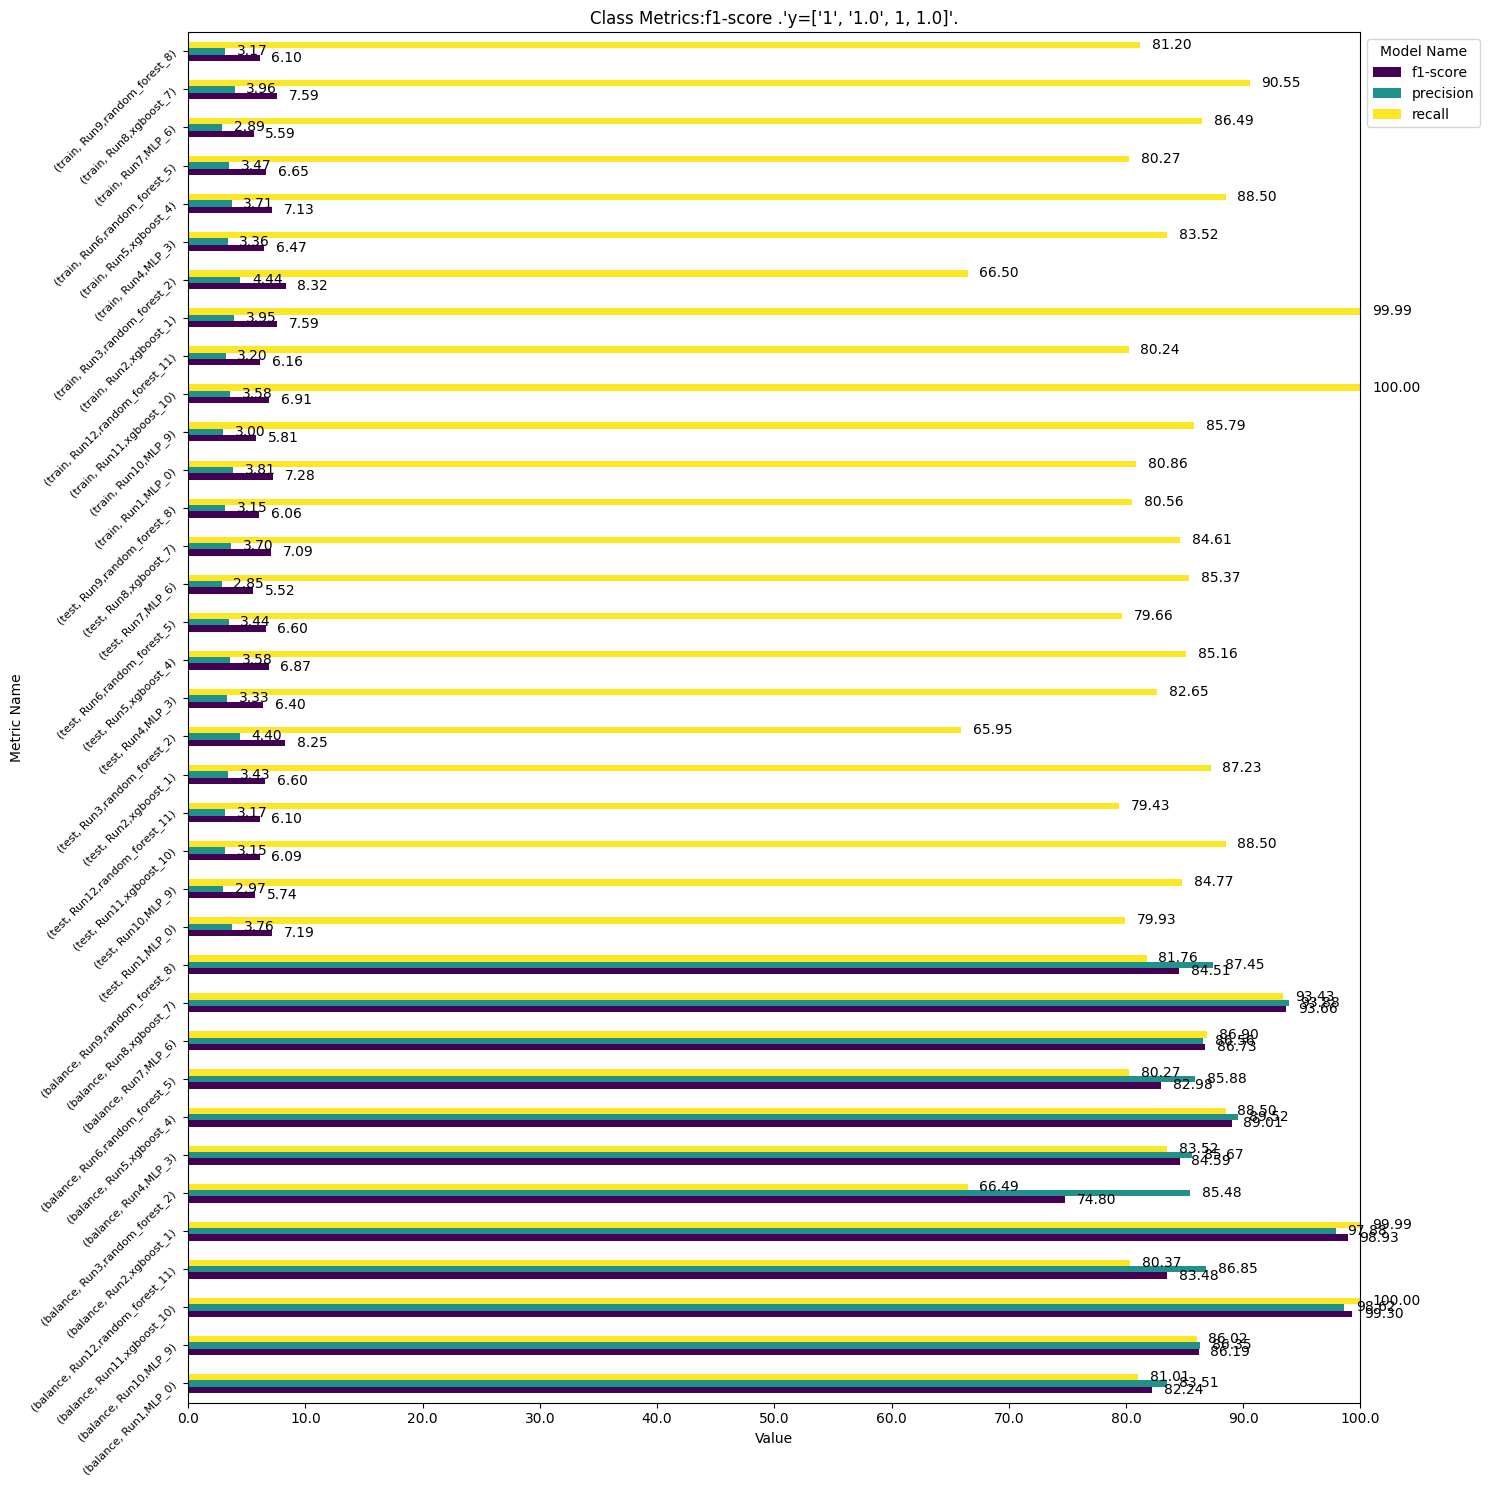

                    INFO     Mejores algoritmos por metrica y dataset:                                 ]8;id=546230;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=357319;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#960\960]8;;\

model_name dataset_name metric_name   metric_type class_name  \
26  Run3,random_forest_2         test    f1-score  class metric        1.0   
24  Run3,random_forest_2         test   precision  class metric        1.0   
97      Run11,xgboost_10         test      recall  class metric        1.0   
23  Run3,random_forest_2        train    f1-score  class metric        1.0   
21  Run3,random_forest_2        train   precision  class metric        1.0   
94      Run11,xgboost_10        train      recall  class metric        1.0   

      value  
26   8.2514  
24   4.4010  
97  88.5044  
23   8.3236  
21   4.4397  
94  99.9981

                    INFO     Mejores algoritmos:                                                      ]8;id=572805;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=605039;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#1007\1007]8;;\

best_model_name   best_unbiased_model    best_fitting_model
model_name   Run3,random_forest_2  Run3,random_forest_2  Run9,random_forest_8
metric_name              f1-score              f1-score              f1-score
metric_type          class metric          class metric          class metric
class_name                    1.0                   1.0                   1.0
test                       8.2514                8.2514                6.0552
balance                   74.8006               74.8006               84.5091
train                      8.3236                8.3236                 6.104
bias                      -66.477               -66.477              -78.4051
real_bias                    True                  True                  True
test-train                -0.0722               -0.0722               -0.0488
fitting               overfitting           overfitting           overfitting

In [13]:
# sin EDA, experimento 2
info_temp = models.compare_metrics_models(info_save_all,params)

In [12]:
pct = 0.65

In [ ]:
# con EDA
df = info_save_all['all_results']
df = df[df["metric_name"] == "f1-score"]
df = df[df["class_name"].isin(["1","1.0",1])]
df['value'] = df['value'].astype(float)
df

In [ ]:
df_metrics_train = df[df['dataset_name']=='train'].sort_values(by ='value', ascending = False)
df_metrics_test = df[df['dataset_name']=='test'].sort_values(by ='value', ascending = False)
df_metrics_train = df_metrics_train.iloc[:int(df_metrics_train.shape[0]*pct)].sort_values(by = "value", ascending = False)
df_metrics_test = df_metrics_test.iloc[:int(df_metrics_test.shape[0]*pct)].sort_values(by = "value", ascending = False)

In [ ]:
ensamble = []
names = []
for model_name in df_metrics_test['model_name']:
    if model_name in df_metrics_train['model_name'].values:
        names.append(model_name)
        ensamble.append(int(model_name.split(",")[0][3:]))
ensambles = sorted(ensamble)
ensamble = ["Run"+str(i) for i in ensambles]
weightss = [1]*len(ensamble)
print(ensamble)
print(weightss)

In [ ]:
df_metrics_test[df_metrics_test['model_name'].isin(names)]

In [ ]:
df_metrics_train[df_metrics_train['model_name'].isin(names)]

In [ ]:
info_save_all['best_model_metrics_dataset']

In [11]:
# sin EDA, experimento 1
pct = 0.58
df = info_save_all['all_results']
df = df[df["metric_name"] == "f1-score"]
df = df[df["class_name"].isin(["1","1.0",1])]
df['value'] = df['value'].astype(float)
df_metrics_train = df[df['dataset_name']=='train'].sort_values(by ='value', ascending = False)
df_metrics_test = df[df['dataset_name']=='test'].sort_values(by ='value', ascending = False)
df_metrics_train = df_metrics_train.iloc[:int(df_metrics_train.shape[0]*pct)].sort_values(by = "value", ascending = False)
df_metrics_test = df_metrics_test.iloc[:int(df_metrics_test.shape[0]*pct)].sort_values(by = "value", ascending = False)
ensamble = []
names = []
for model_name in df_metrics_test['model_name']:
    if model_name in df_metrics_train['model_name'].values:
        names.append(model_name)
        ensamble.append(int(model_name.split(",")[0][3:]))
ensambles = sorted(ensamble)
ensamble = ["Run"+str(i) for i in ensambles]
weightss = [1]*len(ensamble)
print(ensamble)
print(weightss)
print('Total de modelo: ',np.sum(weightss))
display(df_metrics_test[df_metrics_test['model_name'].isin(names)])
display(df_metrics_train[df_metrics_train['model_name'].isin(names)])
info_save_all['best_model_metrics_dataset']

['Run1', 'Run3', 'Run5', 'Run6', 'Run8', 'Run9']
[1, 1, 1, 1, 1, 1]
Total de modelo:  6


model_name dataset_name metric_name   metric_type class_name  \
16  Run6,random_forest_5         test    f1-score  class metric        1.0   
16  Run9,random_forest_8         test    f1-score  class metric        1.0   
16  Run3,random_forest_2         test    f1-score  class metric        1.0   
16        Run8,xgboost_7         test    f1-score  class metric        1.0   
16            Run1,MLP_0         test    f1-score  class metric        1.0   
16        Run5,xgboost_4         test    f1-score  class metric        1.0   

     value  
16  8.3532  
16  8.3014  
16  8.1993  
16  7.2505  
16  7.1606  
16  6.8658

model_name dataset_name metric_name   metric_type class_name  \
16  Run6,random_forest_5        train    f1-score  class metric        1.0   
16  Run9,random_forest_8        train    f1-score  class metric        1.0   
16  Run3,random_forest_2        train    f1-score  class metric        1.0   
16        Run8,xgboost_7        train    f1-score  class metric        1.0   
16            Run1,MLP_0        train    f1-score  class metric        1.0   
16        Run5,xgboost_4        train    f1-score  class metric        1.0   

     value  
16  8.4251  
16  8.3730  
16  8.2690  
16  7.6879  
16  7.2409  
16  7.1298

model_name dataset_name metric_name   metric_type class_name  \
53  Run6,random_forest_5         test    f1-score  class metric        1.0   
51  Run6,random_forest_5         test   precision  class metric        1.0   
97      Run11,xgboost_10         test      recall  class metric        1.0   
50  Run6,random_forest_5        train    f1-score  class metric        1.0   
48  Run6,random_forest_5        train   precision  class metric        1.0   
13        Run2,xgboost_1        train      recall  class metric        1.0   

      value  
53   8.3532  
51   4.4550  
97  90.3209  
50   8.4251  
48   4.4934  
13  99.9906

In [14]:
# sin EDA, experimento 2
pct = 0.59
df = info_save_all['all_results']
df = df[df["metric_name"] == "f1-score"]
df = df[df["class_name"].isin(["1","1.0",1])]
df['value'] = df['value'].astype(float)
df_metrics_train = df[df['dataset_name']=='train'].sort_values(by ='value', ascending = False)
df_metrics_test = df[df['dataset_name']=='test'].sort_values(by ='value', ascending = False)
df_metrics_train = df_metrics_train.iloc[:int(df_metrics_train.shape[0]*pct)].sort_values(by = "value", ascending = False)
df_metrics_test = df_metrics_test.iloc[:int(df_metrics_test.shape[0]*pct)].sort_values(by = "value", ascending = False)
ensamble = []
names = []
for model_name in df_metrics_test['model_name']:
    if model_name in df_metrics_train['model_name'].values:
        names.append(model_name)
        ensamble.append(int(model_name.split(",")[0][3:]))
ensambles = sorted(ensamble)
ensamble = ["Run"+str(i) for i in ensambles]
weightss = [1]*len(ensamble)
print(ensamble)
print(weightss)
print('Total de modelo: ',np.sum(weightss))
display(df_metrics_test[df_metrics_test['model_name'].isin(names)])
display(df_metrics_train[df_metrics_train['model_name'].isin(names)])
info_save_all['best_model_metrics_dataset']

['Run1', 'Run2', 'Run3', 'Run5', 'Run6', 'Run8']
[1, 1, 1, 1, 1, 1]
Total de modelo:  6


model_name dataset_name metric_name   metric_type class_name  \
16  Run3,random_forest_2         test    f1-score  class metric        1.0   
16            Run1,MLP_0         test    f1-score  class metric        1.0   
16        Run8,xgboost_7         test    f1-score  class metric        1.0   
16        Run5,xgboost_4         test    f1-score  class metric        1.0   
16  Run6,random_forest_5         test    f1-score  class metric        1.0   
16        Run2,xgboost_1         test    f1-score  class metric        1.0   

     value  
16  8.2514  
16  7.1867  
16  7.0859  
16  6.8658  
16  6.5996  
16  6.5981

model_name dataset_name metric_name   metric_type class_name  \
16  Run3,random_forest_2        train    f1-score  class metric        1.0   
16        Run2,xgboost_1        train    f1-score  class metric        1.0   
16        Run8,xgboost_7        train    f1-score  class metric        1.0   
16            Run1,MLP_0        train    f1-score  class metric        1.0   
16        Run5,xgboost_4        train    f1-score  class metric        1.0   
16  Run6,random_forest_5        train    f1-score  class metric        1.0   

     value  
16  8.3236  
16  7.5920  
16  7.5869  
16  7.2774  
16  7.1298  
16  6.6510

model_name dataset_name metric_name   metric_type class_name  \
26  Run3,random_forest_2         test    f1-score  class metric        1.0   
24  Run3,random_forest_2         test   precision  class metric        1.0   
97      Run11,xgboost_10         test      recall  class metric        1.0   
23  Run3,random_forest_2        train    f1-score  class metric        1.0   
21  Run3,random_forest_2        train   precision  class metric        1.0   
94      Run11,xgboost_10        train      recall  class metric        1.0   

      value  
26   8.2514  
24   4.4010  
97  88.5044  
23   8.3236  
21   4.4397  
94  99.9981

## model_selection

In [17]:
## algoritmo anterior

In [20]:
info_save_select_ini = catalog.load('info_save_select_anterior') # best model unico

[01/17/25 14:11:53] INFO     Loading data from 'info_save_select_anterior' (PickleDataSet)...   ]8;id=265963;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=144417;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [21]:
check_df = info_save_select_ini['select_model2']
check_df = check_df[np.in1d(check_df.index.get_level_values(1),['backtest','recall n_top','Precision n_top','f1-score n_top'])].reset_index() 
check_df = check_df[check_df['class_name'].isin([1,1.0,'1','1.0'])]
check_df = check_df.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df

value  \
metric_name     dataset_name class_name select_model        name_model                 
Precision n_top test         1          best_fitting_model  Run9              3.8748   
                                        best_model_name     Run4              4.2568   
                                        best_unbiased_model Run1              4.1103   
                                        modelo_produccion   [0, 3, 4, 6, 9]   4.2708   
                train        1          best_fitting_model  Run9              3.9034   
                                        best_model_name     Run4              5.3038   
                                        best_unbiased_model Run1               4.272   
                                        modelo_produccion   [0, 3, 4, 6, 9]   5.1201   
backtest        test         1          best_fitting_model  Run9              3.8748   
                                        best_model_name     Run4              4.2568   
                                        best_unbiased_model Run1              4.1103   
                                        modelo_produccion   [0, 3, 4, 6, 9]   4.2708   
                train        1          best_fitting_model  Run9              3.9034   
                                        best_model_name     Run4              5.3038   
                                        best_unbiased_model Run1               4.272   
                                        modelo_produccion   [0, 3, 4, 6, 9]   5.1201   
f1-score n_top  test         1          best_fitting_model  Run9              7.4604   
                                        best_model_name     Run4              8.1659   
                                        best_unbiased_model Run1              7.8961   
                                        modelo_produccion   [0, 3, 4, 6, 9]   8.1917   
                train        1          best_fitting_model  Run9              7.5135   
                                        best_model_name     Run4             10.0732   
                                        best_unbiased_model Run1               8.194   
                                        modelo_produccion   [0, 3, 4, 6, 9]   9.7414   
recall n_top    test         1          best_fitting_model  Run9               100.0   
                                        best_model_name     Run4               100.0   
                                        best_unbiased_model Run1               100.0   
                                        modelo_produccion   [0, 3, 4, 6, 9]    100.0   
                train        1          best_fitting_model  Run9               100.0   
                                        best_model_name     Run4               100.0   
                                        best_unbiased_model Run1               100.0   
                                        modelo_produccion   [0, 3, 4, 6, 9]    100.0   

                                                                                  model_name  
metric_name     dataset_name class_name select_model        name_model                        
Precision n_top test         1          best_fitting_model  Run9             random_forest_8  
                                        best_model_name     Run4                   xgboost_3  
                                        best_unbiased_model Run1                       MLP_0  
                                        modelo_produccion   [0, 3, 4, 6, 9]         Ensamble  
                train        1          best_fitting_model  Run9             random_forest_8  
                                        best_model_name     Run4                   xgboost_3  
                                        best_unbiased_model Run1                       MLP_0  
                                        modelo_produccion   [0, 3, 4, 6, 9]         Ensamble  
backtest        test         1          best_fitting_model  Run9             random_forest_8  
                                        b

In [ ]:
info_save_select_mvp2 = catalog.load('info_save_select_mvp2') # best model unico

In [ ]:
check_df_mvp2 = info_save_select_mvp2['select_model2']
check_df_mvp2 = check_df_mvp2[np.in1d(check_df_mvp2.index.get_level_values(1),['backtest'])].reset_index() 
check_df_mvp2 = check_df_mvp2.set_index(['select_model','name_model','dataset_name','class_name']).sort_index()
check_df_mvp2

In [15]:
params['Ensamble']['want'] = True
params['optimizacion_bayesiana']['want'] = False
params['Ensamble']['Algoritmos'] = ensamble
params['Ensamble']['weights'] = weightss

In [16]:
params['n_obs_filter']

0.3

In [17]:
params['use_key']

{'want': False, 'llave': ['Run10,xgboost_9'], 'estrategia': ['best_model_name']}

In [18]:
params['Ensamble']


{
    'want': True,
    'Algoritmos': ['Run1', 'Run2', 'Run3', 'Run5', 'Run6', 'Run8'],
    'weights': [1, 1, 1, 1, 1, 1],
    'scorer': 'backtest_scorer'
}

In [19]:
info_save_temp=ms.generate_modelo_produccion(info_save_all, params)

[01/24/25 15:05:44] INFO     Iniciando el Ensamblado de modelos...                                     ]8;id=191891;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=457462;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#747\747]8;;\

                    INFO     train                                                                     ]8;id=604729;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=68906;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#707\707]8;;\

                    INFO     Nodo 0, Run1                                                              ]8;id=557141;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=554213;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/24/25 15:05:54] INFO     Nodo 1, Run2                                                              ]8;id=80370;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=111451;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/24/25 15:06:21] INFO     Nodo 2, Run3                                                              ]8;id=972851;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=205852;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 100 out of 100 | elapsed:    7.6s finished


[01/24/25 15:06:30] INFO     Nodo 4, Run5                                                              ]8;id=503622;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=211158;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/24/25 15:06:37] INFO     Nodo 5, Run6                                                              ]8;id=341385;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=59027;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    9.8s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:   27.0s
[Parallel(n_jobs=48)]: Done 704 tasks      | elapsed:   50.7s
[Parallel(n_jobs=48)]: Done 900 out of 900 | elapsed:  1.1min finished


[01/24/25 15:07:43] INFO     Nodo 7, Run8                                                              ]8;id=548914;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=315487;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/24/25 15:07:59] INFO     test                                                                      ]8;id=896608;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=454126;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#707\707]8;;\

                    INFO     Nodo 0, Run1                                                              ]8;id=723502;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=670534;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/24/25 15:08:02] INFO     Nodo 1, Run2                                                              ]8;id=929189;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=467113;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/24/25 15:08:09] INFO     Nodo 2, Run3                                                              ]8;id=321470;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=22242;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 100 out of 100 | elapsed:    2.0s finished


[01/24/25 15:08:11] INFO     Nodo 4, Run5                                                              ]8;id=217710;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=750218;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/24/25 15:08:13] INFO     Nodo 5, Run6                                                              ]8;id=110619;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=791958;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    2.6s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:    7.0s
[Parallel(n_jobs=48)]: Done 704 tasks      | elapsed:   13.3s
[Parallel(n_jobs=48)]: Done 900 out of 900 | elapsed:   16.7s finished


[01/24/25 15:08:30] INFO     Nodo 7, Run8                                                              ]8;id=124923;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=260084;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#660\660]8;;\

[01/24/25 15:08:59] INFO     Ok Forecast                                                               ]8;id=828158;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=317712;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#723\723]8;;\

                    INFO     Iniciando el calculo de las metricas...                                  ]8;id=774709;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=598259;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1073\1073]8;;\

                    INFO     Tipo de Threshold: KS                                                    ]8;id=182196;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=348974;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1079\1079]8;;\

                    INFO     Models: best_model_name                                                  ]8;id=546981;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=128900;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1104\1104]8;;\

                    INFO     Estrategy: best_model_name                                               ]8;id=255086;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=925589;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1110\1110]8;;\

                    INFO     TOP N: 6744955                                                           ]8;id=919022;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=923893;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 100 out of 100 | elapsed:    7.5s finished


[01/24/25 15:09:19] INFO     TOP N: 1686239                                                           ]8;id=862193;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=747113;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 100 out of 100 | elapsed:    2.0s finished


value name_model       model_name  \
class_name metric_name    dataset_name                                       
1          f1-score n_top test          2.8274       Run3  random_forest_2   
           true_sum n_top test           24180       Run3  random_forest_2   
           backtest       test           1.434       Run3  random_forest_2   

                                           select_model  
class_name metric_name    dataset_name                   
1          f1-score n_top test          best_model_name  
           true_sum n_top test          best_model_name  
           backtest       test          best_model_name

[01/24/25 15:09:24] INFO     Models: best_unbiased_model                                              ]8;id=889395;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=378283;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1104\1104]8;;\

                    INFO     Estrategy: best_unbiased_model                                           ]8;id=60325;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=116826;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1110\1110]8;;\

                    INFO     TOP N: 6744955                                                           ]8;id=12841;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=503087;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 100 out of 100 | elapsed:    7.7s finished


[01/24/25 15:09:44] INFO     TOP N: 1686239                                                           ]8;id=789350;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=427109;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 100 out of 100 | elapsed:    2.0s finished


value name_model       model_name  \
class_name metric_name    dataset_name                                       
1          f1-score n_top test          2.8274       Run3  random_forest_2   
           true_sum n_top test           24180       Run3  random_forest_2   
           backtest       test           1.434       Run3  random_forest_2   

                                               select_model  
class_name metric_name    dataset_name                       
1          f1-score n_top test          best_unbiased_model  
           true_sum n_top test          best_unbiased_model  
           backtest       test          best_unbiased_model

[01/24/25 15:09:48] INFO     Models: best_fitting_model                                               ]8;id=499257;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=378172;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1104\1104]8;;\

                    INFO     Estrategy: best_fitting_model                                            ]8;id=670164;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=6472;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1110\1110]8;;\

                    INFO     TOP N: 6744955                                                           ]8;id=322204;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=133440;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 100 out of 100 | elapsed:    8.7s finished


[01/24/25 15:10:08] INFO     TOP N: 1686239                                                           ]8;id=57067;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=307108;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 100 out of 100 | elapsed:    2.3s finished


value name_model       model_name  \
class_name metric_name    dataset_name                                       
1          f1-score n_top test          2.8708       Run9  random_forest_8   
           true_sum n_top test           24557       Run9  random_forest_8   
           backtest       test          1.4563       Run9  random_forest_8   

                                              select_model  
class_name metric_name    dataset_name                      
1          f1-score n_top test          best_fitting_model  
           true_sum n_top test          best_fitting_model  
           backtest       test          best_fitting_model

[01/24/25 15:10:12] INFO     Estrategy: modelo_produccion                                             ]8;id=155575;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=356525;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1110\1110]8;;\

                    INFO     TOP N: 6744955                                                           ]8;id=255061;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=587553;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[01/24/25 15:10:26] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=339462;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=511937;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=705609;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=305326;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=201279;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=144793;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\
                             84, 83]                                                                               

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=601562;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=424775;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=958101;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=153498;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=473785;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=169495;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=896801;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=885286;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=613635;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=441567;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=766976;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=550962;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=17858;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=87934;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=843445;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=367877;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=621496;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=603573;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=557700;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=386065;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=366610;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=354667;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=7884;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=831368;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/24/25 15:10:56] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=676327;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=920333;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

[01/24/25 15:10:57] INFO     Calculando el estadístico KS para cada decil...                           ]8;id=766880;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=562062;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90]                        ]8;id=289111;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=30455;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=401005;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=631295;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=126120;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=354818;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=385530;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=230177;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=174408;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=894352;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=701385;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=196135;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=69364;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=185815;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 100 out of 100 | elapsed:    7.6s finished


[01/24/25 15:11:07] INFO     Try Segment Dist Probs: 90                                               ]8;id=430352;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=532633;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

[01/24/25 15:11:08] INFO     Try Segment Dist Probs: 85                                               ]8;id=698718;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=333553;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

[01/24/25 15:11:10] INFO     Try Segment Dist Probs: 80                                               ]8;id=996239;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=970123;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

[01/24/25 15:11:11] INFO     Try Segment Dist Probs: 75                                               ]8;id=502079;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=943818;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

[01/24/25 15:11:12] INFO     Try Segment Dist Probs: 70                                               ]8;id=404515;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=808872;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

[01/24/25 15:11:13] INFO     Try Segment Dist Probs: 65                                               ]8;id=823918;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=167686;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

[01/24/25 15:11:15] INFO     Try Segment Dist Probs: 60                                               ]8;id=364535;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=543716;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

[01/24/25 15:11:16] INFO     Try Segment Dist Probs: 55                                               ]8;id=593274;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=84838;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

[01/24/25 15:11:17] INFO     Try Segment Dist Probs: 50                                               ]8;id=729898;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=372383;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

[01/24/25 15:11:18] INFO     Try Segment Dist Probs: 45                                               ]8;id=789031;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=423869;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

[01/24/25 15:11:19] INFO     Try Segment Dist Probs: 40                                               ]8;id=647014;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=720830;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

[01/24/25 15:11:20] INFO     Try Segment Dist Probs: 35                                               ]8;id=986667;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=148586;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

[01/24/25 15:11:23] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=759288;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=189981;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

[01/24/25 15:11:24] INFO     Calculando el estadístico KS para cada decil...                           ]8;id=358022;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=111888;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [34, 33, 32, 31]                            ]8;id=454294;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=158624;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=302785;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=357589;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=331960;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=95688;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=467740;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=275294;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=78701;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=315045;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=862265;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=999941;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/24/25 15:11:33] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=981815;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=609032;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=641172;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=239242;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=123223;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=116088;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\
                             84]                                                                                   

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=910487;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=75798;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=520417;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=228426;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=55071;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=600434;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=101536;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=560483;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=38734;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=672309;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=837754;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=346681;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=421926;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=685255;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=71041;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=272810;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=598471;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=177341;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=891130;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=211770;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=123106;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=262043;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=724837;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=728900;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=557075;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=625893;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=228161;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=560167;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    9.8s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:   26.9s
[Parallel(n_jobs=48)]: Done 704 tasks      | elapsed:   50.9s
[Parallel(n_jobs=48)]: Done 900 out of 900 | elapsed:  1.1min finished


[01/24/25 15:12:42] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=384539;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=884157;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=727074;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=453571;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=592760;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=173075;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\
                             84, 83, 81]                                                                           

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=366136;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=182821;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=435628;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=603015;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=285310;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=312774;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=229960;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=961873;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=213001;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=257997;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=397709;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=828122;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=203715;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=716138;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=624332;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=206957;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=877516;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=808414;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=606013;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=166070;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=372702;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=322241;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=975505;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=131335;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

[01/24/25 15:12:43] INFO     Finalizando el procesamiento del ks                                      ]8;id=444877;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=18102;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/24/25 15:12:58] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=689235;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=531101;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

[01/24/25 15:12:59] INFO     Calculando el estadístico KS para cada decil...                           ]8;id=139970;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=337381;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85]    ]8;id=446357;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=109626;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=917100;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=215745;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=736753;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=507926;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=788609;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=653354;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=757501;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=802136;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=406579;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=702650;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=521731;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=519415;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=194989;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=843226;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=192693;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=869025;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=336314;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=847926;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=463709;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=936596;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

                    INFO     Tipo de Threshold: KS                                                     ]8;id=96883;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=332835;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#295\295]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=511279;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=331058;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_0,Run1. Weight: 1                                             ]8;id=400783;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=635593;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/24/25 15:13:11] INFO     Update probs: Selected: 0, Target Select: 6744955, Diff %: -1.0           ]8;id=746387;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=320202;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/24/25 15:13:15] INFO     Update probs: Selected: 236426, Target Select: 6744955, Diff %:           ]8;id=848766;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=978184;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649477275978862                                                                   

[01/24/25 15:13:19] INFO     Update probs: Selected: 473183, Target Select: 6744955, Diff %:           ]8;id=874541;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=231922;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.929846381480677                                                                    

[01/24/25 15:13:24] INFO     Update probs: Selected: 710319, Target Select: 6744955, Diff %:           ]8;id=835681;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=654779;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8946888452183892                                                                   

[01/24/25 15:13:28] INFO     Update probs: Selected: 946562, Target Select: 6744955, Diff %:           ]8;id=511062;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=132119;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596637042055877                                                                   

[01/24/25 15:13:32] INFO     Update probs: Selected: 1183343, Target Select: 6744955, Diff %:          ]8;id=407817;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=370304;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245587998733869                                                                   

[01/24/25 15:13:36] INFO     Update probs: Selected: 1420194, Target Select: 6744955, Diff %:          ]8;id=733809;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=456317;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894435174141265                                                                   

[01/24/25 15:13:40] INFO     Update probs: Selected: 1656488, Target Select: 6744955, Diff %:          ]8;id=746628;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=381534;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7544108151944676                                                                   

[01/24/25 15:13:44] INFO     Update probs: Selected: 1893265, Target Select: 6744955, Diff %:          ]8;id=179232;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=678092;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193065038980987                                                                   

[01/24/25 15:13:48] INFO     Update probs: Selected: 2129951, Target Select: 6744955, Diff %:          ]8;id=36129;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=60406;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6842156841669069                                                                   

[01/24/25 15:13:53] INFO     Update probs: Selected: 2366418, Target Select: 6744955, Diff %:          ]8;id=417062;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=145592;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491573331475154                                                                   

[01/24/25 15:13:57] INFO     Update probs: Selected: 2603489, Target Select: 6744955, Diff %:          ]8;id=361454;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=493663;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.614009433717497                                                                    

[01/24/25 15:14:01] INFO     Update probs: Selected: 2840235, Target Select: 6744955, Diff %:          ]8;id=632218;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=317810;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789097184488258                                                                   

[01/24/25 15:14:05] INFO     Update probs: Selected: 3076496, Target Select: 6744955, Diff %:          ]8;id=971147;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=887057;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438819087747806                                                                   

[01/24/25 15:14:09] INFO     Update probs: Selected: 3312979, Target Select: 6744955, Diff %:          ]8;id=578961;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=852066;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5088211856120611                                                                   

[01/24/25 15:14:13] INFO     Update probs: Selected: 3550226, Target Select: 6744955, Diff %:          ]8;id=668181;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=903242;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4736471926054362                                                                   

[01/24/25 15:14:17] INFO     Update probs: Selected: 3786458, Target Select: 6744955, Diff %:          ]8;id=926076;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=996147;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4386236824411727                                                                   

[01/24/25 15:14:22] INFO     Update probs: Selected: 4023408, Target Select: 6744955, Diff %:          ]8;id=648565;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=663961;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40349372234507125                                                                  

[01/24/25 15:14:26] INFO     Update probs: Selected: 4260783, Target Select: 6744955, Diff %:          ]8;id=741153;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=221955;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36830075219182334                                                                  

[01/24/25 15:14:30] INFO     Update probs: Selected: 4497508, Target Select: 6744955, Diff %:          ]8;id=351629;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=66067;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33320415036127                                                                     

[01/24/25 15:14:34] INFO     Update probs: Selected: 4732322, Target Select: 6744955, Diff %:          ]8;id=444289;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=318049;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.29839087139943854                                                                  

[01/24/25 15:14:38] INFO     Update probs: Selected: 4969132, Target Select: 6744955, Diff %:          ]8;id=64978;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=352842;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2632816675574559                                                                   

[01/24/25 15:14:42] INFO     Update probs: Selected: 5207143, Target Select: 6744955, Diff %:          ]8;id=185355;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=157460;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2279944047069254                                                                   

[01/24/25 15:14:46] INFO     Update probs: Selected: 5442641, Target Select: 6744955, Diff %:          ]8;id=996755;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=32728;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1930797166178277                                                                   

[01/24/25 15:14:51] INFO     Update probs: Selected: 5681636, Target Select: 6744955, Diff %:          ]8;id=336621;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=423129;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1576465669526335                                                                   

[01/24/25 15:14:55] INFO     Update probs: Selected: 6154390, Target Select: 6744955, Diff %:          ]8;id=390689;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=934596;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08755655152628891                                                                  

[01/24/25 15:14:59] INFO     Update probs: Selected: 6389714, Target Select: 6744955, Diff %:          ]8;id=489741;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=712541;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05266766049588174                                                                  

[01/24/25 15:15:03] INFO     Update probs: Selected: 6744955, Target Select: 6744955, Diff %: 0.0      ]8;id=779980;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=615819;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=4306;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=617210;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=777273;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=128882;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_1,Run2. Weight: 1                                         ]8;id=51219;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=417677;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/24/25 15:15:32] INFO     Update probs: Selected: 0, Target Select: 6744955, Diff %: -1.0           ]8;id=410087;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=11570;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/24/25 15:15:36] INFO     Update probs: Selected: 236200, Target Select: 6744955, Diff %:           ]8;id=733626;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=48246;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649812341223922                                                                   

[01/24/25 15:15:40] INFO     Update probs: Selected: 474242, Target Select: 6744955, Diff %:           ]8;id=393009;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=368151;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.929689375244164                                                                    

[01/24/25 15:15:44] INFO     Update probs: Selected: 710419, Target Select: 6744955, Diff %:           ]8;id=744382;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=75777;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8946740193225899                                                                   

[01/24/25 15:15:48] INFO     Update probs: Selected: 946613, Target Select: 6744955, Diff %:           ]8;id=508212;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=889208;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596561429987302                                                                   

[01/24/25 15:15:52] INFO     Update probs: Selected: 1183156, Target Select: 6744955, Diff %:          ]8;id=720730;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=337414;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245865242985313                                                                   

[01/24/25 15:15:56] INFO     Update probs: Selected: 1420035, Target Select: 6744955, Diff %:          ]8;id=358729;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=228221;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894670905884472                                                                   

[01/24/25 15:16:00] INFO     Update probs: Selected: 1656709, Target Select: 6744955, Diff %:          ]8;id=457333;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=107683;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543780499647514                                                                   

[01/24/25 15:16:04] INFO     Update probs: Selected: 1893360, Target Select: 6744955, Diff %:          ]8;id=143010;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=522810;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7192924192970894                                                                   

[01/24/25 15:16:09] INFO     Update probs: Selected: 2130017, Target Select: 6744955, Diff %:          ]8;id=168620;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=122054;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6842058990756795                                                                   

[01/24/25 15:16:13] INFO     Update probs: Selected: 2603276, Target Select: 6744955, Diff %:          ]8;id=875826;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=131721;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140410128755492                                                                   

[01/24/25 15:16:14] INFO     Update probs: Selected: 2603276, Target Select: 6744955, Diff %:          ]8;id=451325;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=380291;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140410128755492                                                                   

[01/24/25 15:16:16] INFO     Update probs: Selected: 2603276, Target Select: 6744955, Diff %:          ]8;id=682203;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=786829;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140410128755492                                                                   

[01/24/25 15:16:18] INFO     Update probs: Selected: 2603276, Target Select: 6744955, Diff %:          ]8;id=389196;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=526634;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140410128755492                                                                   

[01/24/25 15:16:20] INFO     ------------------------------------------------------                    ]8;id=489994;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=350662;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: random_forest_2,Run3. Weight: 1                                   ]8;id=348663;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=231904;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 100 out of 100 | elapsed:    7.7s finished


[01/24/25 15:16:31] INFO     Update probs: Selected: 0, Target Select: 6744955, Diff %: -1.0           ]8;id=449332;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=84218;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/24/25 15:16:35] INFO     Update probs: Selected: 641924, Target Select: 6744955, Diff %:           ]8;id=533425;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=36191;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9048290166502223                                                                   

[01/24/25 15:16:39] INFO     Update probs: Selected: 1284539, Target Select: 6744955, Diff %:          ]8;id=816380;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=519954;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8095555863604724                                                                   

[01/24/25 15:16:44] INFO     Update probs: Selected: 1928981, Target Select: 6744955, Diff %:          ]8;id=203586;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=387959;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7140112869544719                                                                   

[01/24/25 15:16:48] INFO     Update probs: Selected: 2573589, Target Select: 6744955, Diff %:          ]8;id=23776;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=576499;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6184423765614449                                                                   

[01/24/25 15:16:52] INFO     Update probs: Selected: 3215153, Target Select: 6744955, Diff %:          ]8;id=227236;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=594758;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.523324766436544                                                                    

[01/24/25 15:16:57] INFO     Update probs: Selected: 3855722, Target Select: 6744955, Diff %:          ]8;id=185958;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=89626;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4283546739748449                                                                   

[01/24/25 15:17:01] INFO     Update probs: Selected: 4496088, Target Select: 6744955, Diff %:          ]8;id=420935;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=232157;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33341467808161807                                                                  

[01/24/25 15:17:05] INFO     Update probs: Selected: 5136591, Target Select: 6744955, Diff %:          ]8;id=938366;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=910252;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.23845437071114634                                                                  

[01/24/25 15:17:09] INFO     Update probs: Selected: 5783450, Target Select: 6744955, Diff %:          ]8;id=382960;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=512929;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.14255172940368024                                                                  

[01/24/25 15:17:14] INFO     Update probs: Selected: 6534667, Target Select: 6744955, Diff %:          ]8;id=745800;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=882612;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.031177079758130336                                                                 

[01/24/25 15:17:18] INFO     Update probs: Selected: 6744955, Target Select: 6744955, Diff %: 0.0      ]8;id=654482;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=438278;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=70076;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=849026;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[01/24/25 15:17:19] INFO     ------------------------------------------------------                    ]8;id=820111;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=130048;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_4,Run5. Weight: 1                                         ]8;id=443691;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=787289;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/24/25 15:17:27] INFO     Update probs: Selected: 0, Target Select: 6744955, Diff %: -1.0           ]8;id=112858;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=746209;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/24/25 15:17:31] INFO     Update probs: Selected: 236996, Target Select: 6744955, Diff %:           ]8;id=36748;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=195738;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9648632199918309                                                                   

[01/24/25 15:17:35] INFO     Update probs: Selected: 472917, Target Select: 6744955, Diff %:           ]8;id=767106;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=306284;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298858183635028                                                                   

[01/24/25 15:17:39] INFO     Update probs: Selected: 709940, Target Select: 6744955, Diff %:           ]8;id=835721;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=398374;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947450353634679                                                                   

[01/24/25 15:17:43] INFO     Update probs: Selected: 946830, Target Select: 6744955, Diff %:           ]8;id=285642;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=327105;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.859623970804846                                                                    

[01/24/25 15:17:47] INFO     Update probs: Selected: 1183490, Target Select: 6744955, Diff %:          ]8;id=947596;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=36030;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245370058065621                                                                   

[01/24/25 15:17:51] INFO     Update probs: Selected: 1420114, Target Select: 6744955, Diff %:          ]8;id=536880;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=539814;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894553781307659                                                                   

[01/24/25 15:17:55] INFO     Update probs: Selected: 1656567, Target Select: 6744955, Diff %:          ]8;id=769141;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=708927;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543991027367862                                                                   

[01/24/25 15:17:59] INFO     Update probs: Selected: 1893279, Target Select: 6744955, Diff %:          ]8;id=628276;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=324549;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193044282726868                                                                   

[01/24/25 15:18:03] INFO     Update probs: Selected: 2130001, Target Select: 6744955, Diff %:          ]8;id=25400;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=667948;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6842082712190074                                                                   

[01/24/25 15:18:07] INFO     Update probs: Selected: 2366888, Target Select: 6744955, Diff %:          ]8;id=916479;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=793031;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6490876514372594                                                                   

[01/24/25 15:18:11] INFO     Update probs: Selected: 2603472, Target Select: 6744955, Diff %:          ]8;id=113027;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=316230;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140119541197828                                                                   

[01/24/25 15:18:15] INFO     Update probs: Selected: 2840082, Target Select: 6744955, Diff %:          ]8;id=752144;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=205869;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789324020693986                                                                   

[01/24/25 15:18:19] INFO     Update probs: Selected: 3076500, Target Select: 6744955, Diff %:          ]8;id=486492;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=460501;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438813157389486                                                                   

[01/24/25 15:18:23] INFO     Update probs: Selected: 3313178, Target Select: 6744955, Diff %:          ]8;id=395664;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=678961;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5087916820794208                                                                   

[01/24/25 15:18:27] INFO     Update probs: Selected: 3786361, Target Select: 6744955, Diff %:          ]8;id=164112;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=29756;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4386380635600979                                                                   

[01/24/25 15:18:31] INFO     Update probs: Selected: 4023576, Target Select: 6744955, Diff %:          ]8;id=637746;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=637755;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40346881484012864                                                                  

[01/24/25 15:18:36] INFO     Update probs: Selected: 4259651, Target Select: 6744955, Diff %:          ]8;id=312841;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=5286;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36846858133226984                                                                  

[01/24/25 15:18:40] INFO     Update probs: Selected: 4497263, Target Select: 6744955, Diff %:          ]8;id=618137;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=475031;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33324047380597793                                                                  

[01/24/25 15:18:44] INFO     Update probs: Selected: 4732835, Target Select: 6744955, Diff %:          ]8;id=422293;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=742983;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2983148145539889                                                                   

[01/24/25 15:18:48] INFO     Update probs: Selected: 4969213, Target Select: 6744955, Diff %:          ]8;id=940864;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=770141;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2632696585818586                                                                   

[01/24/25 15:18:52] INFO     Update probs: Selected: 5207165, Target Select: 6744955, Diff %:          ]8;id=543985;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=12877;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22799114300984957                                                                  

[01/24/25 15:18:56] INFO     Update probs: Selected: 5679701, Target Select: 6744955, Diff %:          ]8;id=503026;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=679626;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15793344803634718                                                                  

[01/24/25 15:19:00] INFO     Update probs: Selected: 6153267, Target Select: 6744955, Diff %:          ]8;id=204047;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=2416;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08772304633611344                                                                  

[01/24/25 15:19:04] INFO     Update probs: Selected: 6627779, Target Select: 6744955, Diff %:          ]8;id=868552;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=53352;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017372391661619684                                                                 

[01/24/25 15:19:08] INFO     Update probs: Selected: 6744955, Target Select: 6744955, Diff %: 0.0      ]8;id=933701;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=763580;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=34580;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=682775;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[01/24/25 15:19:09] INFO     ------------------------------------------------------                    ]8;id=319198;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=236246;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: random_forest_5,Run6. Weight: 1                                   ]8;id=579491;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=502587;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:   10.1s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:   27.3s
[Parallel(n_jobs=48)]: Done 704 tasks      | elapsed:   51.2s
[Parallel(n_jobs=48)]: Done 900 out of 900 | elapsed:  1.1min finished


[01/24/25 15:20:17] INFO     Update probs: Selected: 0, Target Select: 6744955, Diff %: -1.0           ]8;id=708827;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=241580;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/24/25 15:20:21] INFO     Update probs: Selected: 236892, Target Select: 6744955, Diff %:           ]8;id=861953;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=527145;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.964878638923462                                                                    

[01/24/25 15:20:26] INFO     Update probs: Selected: 473891, Target Select: 6744955, Diff %:           ]8;id=873465;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=800;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.929741414138419                                                                    

[01/24/25 15:20:30] INFO     Update probs: Selected: 710152, Target Select: 6744955, Diff %:           ]8;id=878812;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=726085;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947136044643738                                                                   

[01/24/25 15:20:34] INFO     Update probs: Selected: 946519, Target Select: 6744955, Diff %:           ]8;id=152853;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=726874;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596700793407813                                                                   

[01/24/25 15:20:38] INFO     Update probs: Selected: 1183206, Target Select: 6744955, Diff %:          ]8;id=979610;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=747467;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245791113506317                                                                   

[01/24/25 15:20:42] INFO     Update probs: Selected: 1420003, Target Select: 6744955, Diff %:          ]8;id=253522;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=521093;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.789471834875103                                                                    

[01/24/25 15:20:47] INFO     Update probs: Selected: 1656379, Target Select: 6744955, Diff %:          ]8;id=815782;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=807374;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7544269754208887                                                                   

[01/24/25 15:20:51] INFO     Update probs: Selected: 1893448, Target Select: 6744955, Diff %:          ]8;id=72830;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=404955;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7192793725087862                                                                   

[01/24/25 15:20:55] INFO     Update probs: Selected: 2129958, Target Select: 6744955, Diff %:          ]8;id=29872;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=972923;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.684214646354201                                                                    

[01/24/25 15:20:59] INFO     Update probs: Selected: 2366456, Target Select: 6744955, Diff %:          ]8;id=376204;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=106051;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491516993071118                                                                   

[01/24/25 15:21:03] INFO     Update probs: Selected: 2603688, Target Select: 6744955, Diff %:          ]8;id=593210;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=215199;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6139799301848566                                                                   

[01/24/25 15:21:08] INFO     Update probs: Selected: 3076406, Target Select: 6744955, Diff %:          ]8;id=738597;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=937748;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438952520809998                                                                   

[01/24/25 15:21:12] INFO     Update probs: Selected: 3312751, Target Select: 6744955, Diff %:          ]8;id=864459;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=82365;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5088549886544832                                                                   

[01/24/25 15:21:16] INFO     Update probs: Selected: 3549076, Target Select: 6744955, Diff %:          ]8;id=132627;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=319712;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4738176904071265                                                                   

[01/24/25 15:21:20] INFO     Update probs: Selected: 3786538, Target Select: 6744955, Diff %:          ]8;id=261912;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=55668;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4386118217245334                                                                   

[01/24/25 15:21:24] INFO     Update probs: Selected: 4023228, Target Select: 6744955, Diff %:          ]8;id=434633;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=235310;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40352040895750974                                                                  

[01/24/25 15:21:29] INFO     Update probs: Selected: 4260536, Target Select: 6744955, Diff %:          ]8;id=846777;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=863250;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3683373721544473                                                                   

[01/24/25 15:21:33] INFO     Update probs: Selected: 4496563, Target Select: 6744955, Diff %:          ]8;id=868413;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=346149;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33334425507657206                                                                  

[01/24/25 15:21:37] INFO     Update probs: Selected: 4732650, Target Select: 6744955, Diff %:          ]8;id=38083;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=135529;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2983422424612173                                                                   

[01/24/25 15:21:41] INFO     Update probs: Selected: 4971707, Target Select: 6744955, Diff %:          ]8;id=180608;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=963039;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.26289990074062763                                                                  

[01/24/25 15:21:45] INFO     Update probs: Selected: 5205467, Target Select: 6744955, Diff %:          ]8;id=212957;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=505665;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22824288672051926                                                                  

[01/24/25 15:21:50] INFO     Update probs: Selected: 5441919, Target Select: 6744955, Diff %:          ]8;id=903831;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=546416;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1931867595854976                                                                   

[01/24/25 15:21:54] INFO     Update probs: Selected: 5681513, Target Select: 6744955, Diff %:          ]8;id=921472;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=579191;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15766480280446646                                                                  

[01/24/25 15:21:58] INFO     Update probs: Selected: 5916776, Target Select: 6744955, Diff %:          ]8;id=173672;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=642611;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12278495557049676                                                                  

[01/24/25 15:22:02] INFO     Update probs: Selected: 6154369, Target Select: 6744955, Diff %:          ]8;id=549164;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=137814;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08755966496440673                                                                  

[01/24/25 15:22:06] INFO     Update probs: Selected: 6389794, Target Select: 6744955, Diff %:          ]8;id=160857;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=526420;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05265579977924241                                                                  

[01/24/25 15:22:11] INFO     Update probs: Selected: 6624384, Target Select: 6744955, Diff %:          ]8;id=206529;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=257734;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01787573082400105                                                                  

[01/24/25 15:22:15] INFO     Update probs: Selected: 6744955, Target Select: 6744955, Diff %: 0.0      ]8;id=530876;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=176194;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=925171;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=362887;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[01/24/25 15:22:17] INFO     ------------------------------------------------------                    ]8;id=531302;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=869679;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_7,Run8. Weight: 1                                         ]8;id=960892;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=627442;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/24/25 15:22:31] INFO     Update probs: Selected: 0, Target Select: 6744955, Diff %: -1.0           ]8;id=378079;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=85570;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/24/25 15:22:35] INFO     Update probs: Selected: 236489, Target Select: 6744955, Diff %:           ]8;id=536125;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=808888;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649383872835327                                                                   

[01/24/25 15:22:39] INFO     Update probs: Selected: 473297, Target Select: 6744955, Diff %:           ]8;id=982335;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=343859;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.929829479959466                                                                    

[01/24/25 15:22:43] INFO     Update probs: Selected: 710033, Target Select: 6744955, Diff %:           ]8;id=180519;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=137659;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947312472803748                                                                   

[01/24/25 15:22:47] INFO     Update probs: Selected: 946531, Target Select: 6744955, Diff %:           ]8;id=599859;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=545556;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596683002332854                                                                   

[01/24/25 15:22:51] INFO     Update probs: Selected: 1183360, Target Select: 6744955, Diff %:          ]8;id=205494;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=579546;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.824556279471101                                                                    

[01/24/25 15:22:55] INFO     Update probs: Selected: 1419783, Target Select: 6744955, Diff %:          ]8;id=931128;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=898459;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.789504451845861                                                                    

[01/24/25 15:22:59] INFO     Update probs: Selected: 1656717, Target Select: 6744955, Diff %:          ]8;id=402583;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=109956;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543768638930874                                                                   

[01/24/25 15:23:03] INFO     Update probs: Selected: 1893277, Target Select: 6744955, Diff %:          ]8;id=428793;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=687666;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193047247906027                                                                   

[01/24/25 15:23:07] INFO     Update probs: Selected: 2130042, Target Select: 6744955, Diff %:          ]8;id=261401;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=688541;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6842021926017298                                                                   

[01/24/25 15:23:11] INFO     Update probs: Selected: 2366518, Target Select: 6744955, Diff %:          ]8;id=43075;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=362001;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491425072517163                                                                   

[01/24/25 15:23:15] INFO     Update probs: Selected: 2603045, Target Select: 6744955, Diff %:          ]8;id=979851;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=714024;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140752606948453                                                                   

[01/24/25 15:23:19] INFO     Update probs: Selected: 2840048, Target Select: 6744955, Diff %:          ]8;id=542986;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=282880;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789374428739702                                                                   

[01/24/25 15:23:24] INFO     Update probs: Selected: 3076785, Target Select: 6744955, Diff %:          ]8;id=73325;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=309438;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.543839061935921                                                                    

[01/24/25 15:23:28] INFO     Update probs: Selected: 3313460, Target Select: 6744955, Diff %:          ]8;id=105383;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=792443;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5087498730532672                                                                   

[01/24/25 15:23:32] INFO     Update probs: Selected: 3549964, Target Select: 6744955, Diff %:          ]8;id=896964;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=319764;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.47368603645243                                                                     

[01/24/25 15:23:36] INFO     Update probs: Selected: 3786915, Target Select: 6744955, Diff %:          ]8;id=871531;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=477808;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43855592809737054                                                                  

[01/24/25 15:23:40] INFO     Update probs: Selected: 4022846, Target Select: 6744955, Diff %:          ]8;id=80628;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=262760;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4035770438794625                                                                   

[01/24/25 15:23:44] INFO     Update probs: Selected: 4260260, Target Select: 6744955, Diff %:          ]8;id=990463;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=184493;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.368378291626853                                                                    

[01/24/25 15:23:48] INFO     Update probs: Selected: 4496771, Target Select: 6744955, Diff %:          ]8;id=27398;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=250144;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3333134172133098                                                                   

[01/24/25 15:23:52] INFO     Update probs: Selected: 4732764, Target Select: 6744955, Diff %:          ]8;id=29214;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=889966;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2983253409400063                                                                   

[01/24/25 15:23:56] INFO     Update probs: Selected: 4969301, Target Select: 6744955, Diff %:          ]8;id=613857;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=859045;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2632566117935553                                                                   

[01/24/25 15:24:00] INFO     Update probs: Selected: 5207027, Target Select: 6744955, Diff %:          ]8;id=842895;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=970264;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22801160274605242                                                                  

[01/24/25 15:24:04] INFO     Update probs: Selected: 5442493, Target Select: 6744955, Diff %:          ]8;id=153457;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=573601;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19310165894361045                                                                  

[01/24/25 15:24:08] INFO     Update probs: Selected: 5680481, Target Select: 6744955, Diff %:          ]8;id=544098;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=980958;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15781780604911375                                                                  

[01/24/25 15:24:12] INFO     Update probs: Selected: 6153478, Target Select: 6744955, Diff %:          ]8;id=192441;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=678012;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08769176369597721                                                                  

[01/24/25 15:24:16] INFO     Update probs: Selected: 6388749, Target Select: 6744955, Diff %:          ]8;id=985230;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=991456;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0528107303903436                                                                   

[01/24/25 15:24:20] INFO     Update probs: Selected: 6744955, Target Select: 6744955, Diff %: 0.0      ]8;id=367426;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=88307;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=702932;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=99451;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

[01/24/25 15:24:22] INFO     Iniciando sistema de votaciones..                                         ]8;id=33450;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=970449;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#331\331]8;;\

[01/24/25 15:24:28] INFO     Ok Sistema de votaciones                                                  ]8;id=642239;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=599160;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#350\350]8;;\

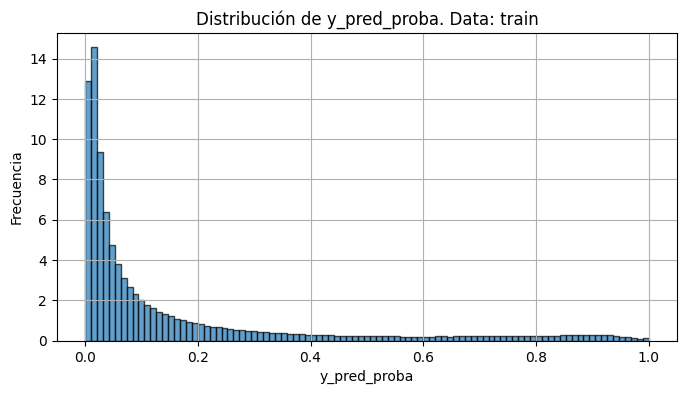

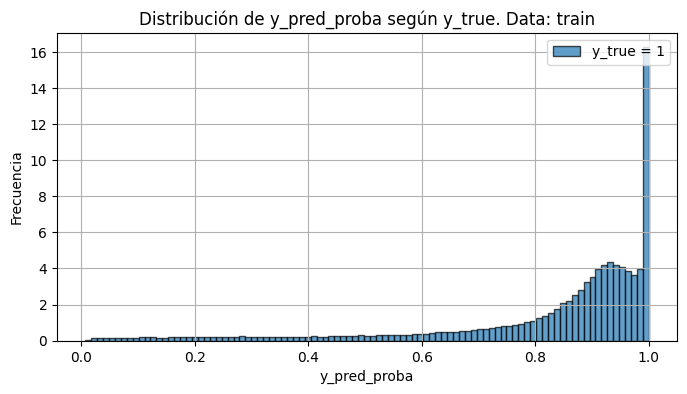

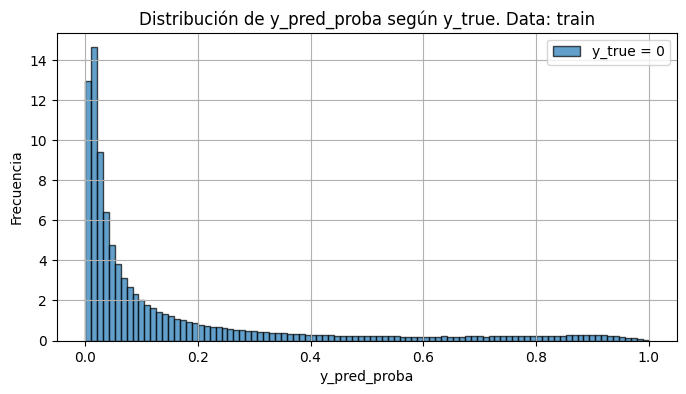

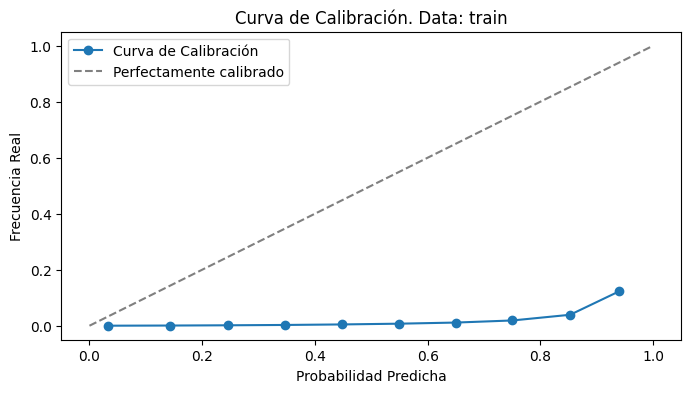

[01/24/25 15:24:51] INFO     TOP N: 1686239                                                           ]8;id=128735;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=963837;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1116\1116]8;;\

[01/24/25 15:24:55] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=585427;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=938745;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=562666;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=552180;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=135703;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=677799;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\
                             84, 83]                                                                               

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=275727;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=700284;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=212381;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=39052;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=537406;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=690916;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=870768;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=794730;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=274273;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=45617;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=684232;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=743851;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=636594;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=837506;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=166016;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=99840;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=367403;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=414282;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/24/25 15:25:02] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=705707;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=561746;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

[01/24/25 15:25:03] INFO     Calculando el estadístico KS para cada decil...                           ]8;id=938721;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=939927;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=902738;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=821187;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\
                             84]                                                                                   

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=603482;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=994579;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=639073;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=231371;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=29182;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=544793;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=936843;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=265872;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=834567;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=112499;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=685187;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=302852;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=447991;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=313359;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=731544;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=639215;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=42659;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=350361;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=41538;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=186577;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=359343;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=779809;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=695721;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=384186;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=669888;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=130077;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=750057;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=747931;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=205035;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=322645;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=517104;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=159112;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 100 out of 100 | elapsed:    2.0s finished


[01/24/25 15:25:05] INFO     Try Segment Dist Probs: 90                                               ]8;id=685905;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=731870;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

[01/24/25 15:25:06] INFO     Try Segment Dist Probs: 85                                               ]8;id=345538;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=458724;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

                    INFO     Try Segment Dist Probs: 80                                               ]8;id=148605;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=325537;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

                    INFO     Try Segment Dist Probs: 75                                               ]8;id=96519;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=456806;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

[01/24/25 15:25:07] INFO     Try Segment Dist Probs: 70                                               ]8;id=950202;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=258463;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

                    INFO     Try Segment Dist Probs: 65                                               ]8;id=168180;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=365441;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

                    INFO     Try Segment Dist Probs: 60                                               ]8;id=25497;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=977731;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

[01/24/25 15:25:08] INFO     Try Segment Dist Probs: 55                                               ]8;id=777045;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=497841;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

                    INFO     Try Segment Dist Probs: 50                                               ]8;id=528680;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=927806;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

                    INFO     Try Segment Dist Probs: 45                                               ]8;id=737241;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=281413;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

                    INFO     Try Segment Dist Probs: 40                                               ]8;id=457672;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=617990;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

[01/24/25 15:25:09] INFO     Try Segment Dist Probs: 35                                               ]8;id=541506;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=907428;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1150\1150]8;;\

                    INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=558930;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=946668;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=463062;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=77496;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [34, 33, 32, 31]                            ]8;id=159557;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=516073;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=58677;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=817278;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=923377;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=637448;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=808055;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=414138;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=549782;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=586863;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=733197;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=429508;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/24/25 15:25:12] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=361199;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=910927;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=534287;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=38604;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=384217;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=137832;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\
                             84]                                                                                   

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=271651;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=183342;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=470607;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=594066;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=398784;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=806886;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=348562;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=223429;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=764315;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=283229;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=21313;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=77267;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=962963;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=197481;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=359198;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=595255;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=462807;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=124648;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=965146;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=557933;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=298193;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=646528;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=404410;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=63729;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    2.6s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:    7.0s
[Parallel(n_jobs=48)]: Done 704 tasks      | elapsed:   13.2s
[Parallel(n_jobs=48)]: Done 900 out of 900 | elapsed:   16.6s finished


[01/24/25 15:25:30] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=503151;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=991120;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=494732;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=261054;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=875813;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=193278;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\
                             84, 83, 81]                                                                           

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=254075;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=314339;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=694061;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=539982;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=605299;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=727569;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=703585;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=514536;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=409163;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=757428;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=299267;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=502621;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=58209;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=455844;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=326991;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=662491;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=642086;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=858532;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

[01/24/25 15:25:34] INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=621638;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=433949;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#755\755]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=397892;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=845445;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#793\793]8;;\

                    INFO     Deciles donde el ks aumenta:  [94, 93, 92, 91, 90, 89, 88, 87, 86, 85,    ]8;id=802368;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=264047;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#817\817]8;;\
                             84]                                                                                   

                    INFO     Iniciando el procesamiento del ks                                        ]8;id=948966;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=804425;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1169\1169]8;;\

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=721919;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=677350;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=933310;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=318608;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=852451;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=499772;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=579247;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=743574;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=374248;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=43526;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=953925;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=927746;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=25591;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=228673;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=443616;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=377590;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=245995;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=592254;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_selection/nodes.py:11                
                             8: SettingWithCopyWarning:                                                            
                             A value is trying to be set on a copy of a slice from a DataFrame                     
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               sub_group.loc[index,'prob_min'] = value_copy                                        
                                                                                                                   

                    INFO     Finalizando el procesamiento del ks                                      ]8;id=35632;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=754446;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#1177\1177]8;;\

                    INFO     Tipo de Threshold: KS                                                     ]8;id=494451;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=180091;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#295\295]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=951602;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=830808;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_0,Run1. Weight: 1                                             ]8;id=444964;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=828290;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/24/25 15:25:37] INFO     Update probs: Selected: 0, Target Select: 1686239, Diff %: -1.0           ]8;id=892811;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=566770;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/24/25 15:25:38] INFO     Update probs: Selected: 59198, Target Select: 1686239, Diff %:            ]8;id=905343;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=544702;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9648934700241187                                                                   

[01/24/25 15:25:39] INFO     Update probs: Selected: 118370, Target Select: 1686239, Diff %:           ]8;id=381095;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=440951;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298023589775827                                                                   

[01/24/25 15:25:40] INFO     Update probs: Selected: 177432, Target Select: 1686239, Diff %:           ]8;id=613906;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=419763;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947764818628913                                                                   

[01/24/25 15:25:41] INFO     Update probs: Selected: 236675, Target Select: 1686239, Diff %:           ]8;id=948069;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=515351;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596432652785281                                                                   

[01/24/25 15:25:42] INFO     Update probs: Selected: 295887, Target Select: 1686239, Diff %:           ]8;id=18239;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=259504;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245284328022303                                                                   

[01/24/25 15:25:43] INFO     Update probs: Selected: 355044, Target Select: 1686239, Diff %:           ]8;id=86464;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=922872;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894462172918548                                                                   

[01/24/25 15:25:44] INFO     Update probs: Selected: 414202, Target Select: 1686239, Diff %:           ]8;id=473294;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=243448;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543634087457354                                                                   

[01/24/25 15:25:45] INFO     Update probs: Selected: 473318, Target Select: 1686239, Diff %:           ]8;id=253457;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=559794;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7193055077008657                                                                   

[01/24/25 15:25:46] INFO     Update probs: Selected: 532484, Target Select: 1686239, Diff %:           ]8;id=50315;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=933137;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6842179548687938                                                                   

[01/24/25 15:25:47] INFO     Update probs: Selected: 591702, Target Select: 1686239, Diff %:           ]8;id=222446;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=937201;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6490995641780317                                                                   

[01/24/25 15:25:48] INFO     Update probs: Selected: 650796, Target Select: 1686239, Diff %:           ]8;id=176982;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=439285;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140547099195309                                                                   

[01/24/25 15:25:49] INFO     Update probs: Selected: 710052, Target Select: 1686239, Diff %:           ]8;id=48213;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=665791;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789137838704952                                                                   

                    INFO     Update probs: Selected: 769218, Target Select: 1686239, Diff %:           ]8;id=595718;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=408426;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438262310384234                                                                   

[01/24/25 15:25:50] INFO     Update probs: Selected: 828322, Target Select: 1686239, Diff %:           ]8;id=706975;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=593951;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5087754464224822                                                                   

[01/24/25 15:25:51] INFO     Update probs: Selected: 887415, Target Select: 1686239, Diff %:           ]8;id=169432;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=194837;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.47373118519972557                                                                  

[01/24/25 15:25:52] INFO     Update probs: Selected: 946753, Target Select: 1686239, Diff %:           ]8;id=734516;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=765376;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43854163021967824                                                                  

[01/24/25 15:25:53] INFO     Update probs: Selected: 1005905, Target Select: 1686239, Diff %:          ]8;id=207821;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=809268;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40346237988802297                                                                  

[01/24/25 15:25:54] INFO     Update probs: Selected: 1064973, Target Select: 1686239, Diff %:          ]8;id=971798;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=35512;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3684329445588674                                                                   

[01/24/25 15:25:55] INFO     Update probs: Selected: 1124106, Target Select: 1686239, Diff %:          ]8;id=912590;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=188918;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33336496190634896                                                                  

[01/24/25 15:25:56] INFO     Update probs: Selected: 1183057, Target Select: 1686239, Diff %:          ]8;id=681178;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=181399;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.29840491175924644                                                                  

[01/24/25 15:25:57] INFO     Update probs: Selected: 1242435, Target Select: 1686239, Diff %:          ]8;id=33451;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=82951;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2631916353494374                                                                   

[01/24/25 15:25:58] INFO     Update probs: Selected: 1301515, Target Select: 1686239, Diff %:          ]8;id=746151;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=130790;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2281550835913533                                                                   

[01/24/25 15:25:59] INFO     Update probs: Selected: 1361017, Target Select: 1686239, Diff %:          ]8;id=891061;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=912482;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19286827074928287                                                                  

[01/24/25 15:26:00] INFO     Update probs: Selected: 1419882, Target Select: 1686239, Diff %:          ]8;id=476102;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=354371;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15795922167616808                                                                  

[01/24/25 15:26:01] INFO     Update probs: Selected: 1479001, Target Select: 1686239, Diff %:          ]8;id=595903;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=855553;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12289954152406628                                                                  

[01/24/25 15:26:02] INFO     Update probs: Selected: 1538315, Target Select: 1686239, Diff %:          ]8;id=31314;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=679310;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08772421940187601                                                                  

[01/24/25 15:26:03] INFO     Update probs: Selected: 1597636, Target Select: 1686239, Diff %:          ]8;id=279019;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=334992;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05254474602947744                                                                  

[01/24/25 15:26:04] INFO     Update probs: Selected: 1656534, Target Select: 1686239, Diff %:          ]8;id=701883;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=392765;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017616126776809217                                                                 

[01/24/25 15:26:05] INFO     Update probs: Selected: 1686239, Target Select: 1686239, Diff %: 0.0      ]8;id=387379;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=952099;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=704886;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=559284;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=196998;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=856394;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_1,Run2. Weight: 1                                         ]8;id=409720;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=200963;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/24/25 15:26:12] INFO     Update probs: Selected: 0, Target Select: 1686239, Diff %: -1.0           ]8;id=28584;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=742594;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/24/25 15:26:13] INFO     Update probs: Selected: 59675, Target Select: 1686239, Diff %:            ]8;id=890128;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=753513;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9646105919742101                                                                   

[01/24/25 15:26:14] INFO     Update probs: Selected: 118528, Target Select: 1686239, Diff %:           ]8;id=751813;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=964324;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9297086593300238                                                                   

[01/24/25 15:26:15] INFO     Update probs: Selected: 177626, Target Select: 1686239, Diff %:           ]8;id=662753;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=752078;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8946614329285469                                                                   

[01/24/25 15:26:16] INFO     Update probs: Selected: 236647, Target Select: 1686239, Diff %:           ]8;id=282073;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=942176;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596598702793613                                                                   

                    INFO     Update probs: Selected: 295883, Target Select: 1686239, Diff %:           ]8;id=808741;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=319712;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245308049452065                                                                   

[01/24/25 15:26:17] INFO     Update probs: Selected: 354956, Target Select: 1686239, Diff %:           ]8;id=505420;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=602556;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894984044373307                                                                   

[01/24/25 15:26:18] INFO     Update probs: Selected: 414139, Target Select: 1686239, Diff %:           ]8;id=217037;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=531199;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7544007699976101                                                                   

[01/24/25 15:26:19] INFO     Update probs: Selected: 473333, Target Select: 1686239, Diff %:           ]8;id=20615;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=675773;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.719296612164705                                                                    

[01/24/25 15:26:20] INFO     Update probs: Selected: 532518, Target Select: 1686239, Diff %:           ]8;id=234862;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=679213;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841977916534964                                                                   

[01/24/25 15:26:21] INFO     Update probs: Selected: 591636, Target Select: 1686239, Diff %:           ]8;id=625251;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=360073;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491387045371386                                                                   

[01/24/25 15:26:22] INFO     Update probs: Selected: 650831, Target Select: 1686239, Diff %:           ]8;id=705965;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=184314;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140339536684895                                                                   

[01/24/25 15:26:23] INFO     Update probs: Selected: 709949, Target Select: 1686239, Diff %:           ]8;id=892595;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=816697;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789748665521317                                                                   

[01/24/25 15:26:24] INFO     Update probs: Selected: 769165, Target Select: 1686239, Diff %:           ]8;id=951539;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=834541;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438576619328577                                                                   

[01/24/25 15:26:25] INFO     Update probs: Selected: 828350, Target Select: 1686239, Diff %:           ]8;id=511819;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=123408;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.508758841421649                                                                    

[01/24/25 15:26:26] INFO     Update probs: Selected: 887452, Target Select: 1686239, Diff %:           ]8;id=812224;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=827285;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.47370924287719596                                                                  

[01/24/25 15:26:27] INFO     Update probs: Selected: 946687, Target Select: 1686239, Diff %:           ]8;id=891989;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=576719;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4385807705787851                                                                   

                    INFO     Update probs: Selected: 1064934, Target Select: 1686239, Diff %:          ]8;id=809087;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=548713;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36845607295288507                                                                  

[01/24/25 15:26:28] INFO     Update probs: Selected: 1124245, Target Select: 1686239, Diff %:          ]8;id=362056;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=421140;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33328252993792695                                                                  

[01/24/25 15:26:29] INFO     Update probs: Selected: 1242557, Target Select: 1686239, Diff %:          ]8;id=917288;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=663729;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2631192849886641                                                                   

[01/24/25 15:26:30] INFO     Update probs: Selected: 1301572, Target Select: 1686239, Diff %:          ]8;id=169158;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=644181;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22812128055394282                                                                  

[01/24/25 15:26:31] INFO     Update probs: Selected: 1479254, Target Select: 1686239, Diff %:          ]8;id=809336;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=379182;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1227495034808233                                                                   

[01/24/25 15:26:32] INFO     Update probs: Selected: 1538317, Target Select: 1686239, Diff %:          ]8;id=963057;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=855398;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08772303333038792                                                                  

[01/24/25 15:26:33] INFO     Update probs: Selected: 1597209, Target Select: 1686239, Diff %:          ]8;id=148758;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=49793;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05279797229218397                                                                  

[01/24/25 15:26:34] INFO     Update probs: Selected: 1656388, Target Select: 1686239, Diff %:          ]8;id=561802;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=198088;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017702709995439554                                                                 

[01/24/25 15:26:35] INFO     Update probs: Selected: 1686239, Target Select: 1686239, Diff %: 0.0      ]8;id=901474;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=901852;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=245912;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=379803;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=571098;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=272017;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: random_forest_2,Run3. Weight: 1                                   ]8;id=327513;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=889913;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 100 out of 100 | elapsed:    2.0s finished


[01/24/25 15:26:38] INFO     Update probs: Selected: 0, Target Select: 1686239, Diff %: -1.0           ]8;id=179317;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=349874;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/24/25 15:26:39] INFO     Update probs: Selected: 160584, Target Select: 1686239, Diff %:           ]8;id=885797;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=56654;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9047679480785346                                                                   

[01/24/25 15:26:40] INFO     Update probs: Selected: 321153, Target Select: 1686239, Diff %:           ]8;id=191052;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=638736;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8095447916932297                                                                   

[01/24/25 15:26:41] INFO     Update probs: Selected: 481646, Target Select: 1686239, Diff %:           ]8;id=140990;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=101699;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7143667060244722                                                                   

[01/24/25 15:26:42] INFO     Update probs: Selected: 643746, Target Select: 1686239, Diff %:           ]8;id=483746;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=227402;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.618235611915037                                                                    

[01/24/25 15:26:43] INFO     Update probs: Selected: 802765, Target Select: 1686239, Diff %:           ]8;id=551302;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=773253;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5239316609329994                                                                   

[01/24/25 15:26:44] INFO     Update probs: Selected: 963578, Target Select: 1686239, Diff %:           ]8;id=73465;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=742169;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.428563803826148                                                                    

[01/24/25 15:26:45] INFO     Update probs: Selected: 1124373, Target Select: 1686239, Diff %:          ]8;id=298190;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=912184;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3332066213626894                                                                   

[01/24/25 15:26:46] INFO     Update probs: Selected: 1284757, Target Select: 1686239, Diff %:          ]8;id=179451;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=123557;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.23809317659003262                                                                  

[01/24/25 15:26:47] INFO     Update probs: Selected: 1444699, Target Select: 1686239, Diff %:          ]8;id=8290;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=353552;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.143241853616243                                                                    

[01/24/25 15:26:48] INFO     Update probs: Selected: 1633155, Target Select: 1686239, Diff %:          ]8;id=702224;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=918376;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.031480709436799884                                                                 

[01/24/25 15:26:49] INFO     Update probs: Selected: 1686239, Target Select: 1686239, Diff %: 0.0      ]8;id=829352;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=91504;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=420169;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=914270;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=248234;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=353197;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_4,Run5. Weight: 1                                         ]8;id=405955;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=726966;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/24/25 15:26:51] INFO     Update probs: Selected: 0, Target Select: 1686239, Diff %: -1.0           ]8;id=846534;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=667083;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/24/25 15:26:52] INFO     Update probs: Selected: 59118, Target Select: 1686239, Diff %:            ]8;id=66830;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=398176;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649409128836423                                                                   

[01/24/25 15:26:53] INFO     Update probs: Selected: 118351, Target Select: 1686239, Diff %:           ]8;id=998493;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=930035;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9298136266567195                                                                   

[01/24/25 15:26:54] INFO     Update probs: Selected: 177502, Target Select: 1686239, Diff %:           ]8;id=576462;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=878003;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947349693608083                                                                   

                    INFO     Update probs: Selected: 236645, Target Select: 1686239, Diff %:           ]8;id=958470;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=877040;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596610563508494                                                                   

[01/24/25 15:26:55] INFO     Update probs: Selected: 295903, Target Select: 1686239, Diff %:           ]8;id=656643;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=823772;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245189442303256                                                                   

[01/24/25 15:26:56] INFO     Update probs: Selected: 355015, Target Select: 1686239, Diff %:           ]8;id=487010;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=935291;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894634153284321                                                                   

[01/24/25 15:26:57] INFO     Update probs: Selected: 414161, Target Select: 1686239, Diff %:           ]8;id=352121;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=141817;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543877232112411                                                                   

[01/24/25 15:26:58] INFO     Update probs: Selected: 473371, Target Select: 1686239, Diff %:           ]8;id=32183;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=324096;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7192740768064314                                                                   

[01/24/25 15:26:59] INFO     Update probs: Selected: 532535, Target Select: 1686239, Diff %:           ]8;id=265071;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=282951;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841877100458476                                                                   

[01/24/25 15:27:00] INFO     Update probs: Selected: 591664, Target Select: 1686239, Diff %:           ]8;id=966667;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=247359;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491220995363054                                                                   

[01/24/25 15:27:01] INFO     Update probs: Selected: 650802, Target Select: 1686239, Diff %:           ]8;id=522014;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=139235;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140511517050667                                                                   

[01/24/25 15:27:02] INFO     Update probs: Selected: 710062, Target Select: 1686239, Diff %:           ]8;id=821114;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=737999;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789078535130547                                                                   

[01/24/25 15:27:03] INFO     Update probs: Selected: 769136, Target Select: 1686239, Diff %:           ]8;id=217875;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=772938;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.543874859969435                                                                    

[01/24/25 15:27:04] INFO     Update probs: Selected: 828262, Target Select: 1686239, Diff %:           ]8;id=206675;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=632834;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5088110285671248                                                                   

[01/24/25 15:27:05] INFO     Update probs: Selected: 887508, Target Select: 1686239, Diff %:           ]8;id=576633;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=130065;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4736760328755295                                                                   

[01/24/25 15:27:06] INFO     Update probs: Selected: 946525, Target Select: 1686239, Diff %:           ]8;id=748140;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=302352;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43867684236932014                                                                  

                    INFO     Update probs: Selected: 1005677, Target Select: 1686239, Diff %:          ]8;id=110138;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=116927;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4035975920376649                                                                   

[01/24/25 15:27:07] INFO     Update probs: Selected: 1064900, Target Select: 1686239, Diff %:          ]8;id=291198;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=561917;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3684762361681826                                                                   

[01/24/25 15:27:08] INFO     Update probs: Selected: 1124289, Target Select: 1686239, Diff %:          ]8;id=435559;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=472105;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33325643636518903                                                                  

[01/24/25 15:27:09] INFO     Update probs: Selected: 1183386, Target Select: 1686239, Diff %:          ]8;id=236917;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=647143;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2982098029994562                                                                   

[01/24/25 15:27:10] INFO     Update probs: Selected: 1242485, Target Select: 1686239, Diff %:          ]8;id=554632;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=89853;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.26316198356223525                                                                  

[01/24/25 15:27:11] INFO     Update probs: Selected: 1361036, Target Select: 1686239, Diff %:          ]8;id=263746;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=928285;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19285700307014605                                                                  

[01/24/25 15:27:12] INFO     Update probs: Selected: 1420429, Target Select: 1686239, Diff %:          ]8;id=801748;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=571400;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15763483112417634                                                                  

[01/24/25 15:27:13] INFO     Update probs: Selected: 1479241, Target Select: 1686239, Diff %:          ]8;id=82117;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=938820;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12275721294549587                                                                  

[01/24/25 15:27:14] INFO     Update probs: Selected: 1597620, Target Select: 1686239, Diff %:          ]8;id=473084;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=41571;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05255423460138213                                                                  

[01/24/25 15:27:15] INFO     Update probs: Selected: 1657390, Target Select: 1686239, Diff %:          ]8;id=21637;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=497927;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01710848817990807                                                                  

[01/24/25 15:27:16] INFO     Update probs: Selected: 1686239, Target Select: 1686239, Diff %: 0.0      ]8;id=242528;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=199417;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=436925;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=129180;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=561327;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=960313;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: random_forest_5,Run6. Weight: 1                                   ]8;id=589697;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=952101;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[Parallel(n_jobs=48)]: Using backend ThreadingBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:    2.5s
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:    7.0s
[Parallel(n_jobs=48)]: Done 704 tasks      | elapsed:   13.1s
[Parallel(n_jobs=48)]: Done 900 out of 900 | elapsed:   16.5s finished


[01/24/25 15:27:33] INFO     Update probs: Selected: 0, Target Select: 1686239, Diff %: -1.0           ]8;id=616013;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=159522;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/24/25 15:27:34] INFO     Update probs: Selected: 59266, Target Select: 1686239, Diff %:            ]8;id=447823;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=92995;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9648531435935238                                                                   

[01/24/25 15:27:35] INFO     Update probs: Selected: 118191, Target Select: 1686239, Diff %:           ]8;id=652253;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=608731;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9299085123757664                                                                   

[01/24/25 15:27:36] INFO     Update probs: Selected: 177461, Target Select: 1686239, Diff %:           ]8;id=108631;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=360570;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947592838263141                                                                   

[01/24/25 15:27:37] INFO     Update probs: Selected: 236599, Target Select: 1686239, Diff %:           ]8;id=528972;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=130787;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596883359950754                                                                   

[01/24/25 15:27:38] INFO     Update probs: Selected: 295856, Target Select: 1686239, Diff %:           ]8;id=515598;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=398603;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8245468169102956                                                                   

[01/24/25 15:27:39] INFO     Update probs: Selected: 355011, Target Select: 1686239, Diff %:           ]8;id=412338;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=25659;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894657874714083                                                                   

[01/24/25 15:27:40] INFO     Update probs: Selected: 414136, Target Select: 1686239, Diff %:           ]8;id=377809;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=471770;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7544025491048422                                                                   

[01/24/25 15:27:41] INFO     Update probs: Selected: 473390, Target Select: 1686239, Diff %:           ]8;id=21010;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=160157;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7192628091272946                                                                   

[01/24/25 15:27:42] INFO     Update probs: Selected: 532520, Target Select: 1686239, Diff %:           ]8;id=157907;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=25339;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6841966055820082                                                                   

[01/24/25 15:27:43] INFO     Update probs: Selected: 591606, Target Select: 1686239, Diff %:           ]8;id=644687;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=733426;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491564956094599                                                                   

[01/24/25 15:27:44] INFO     Update probs: Selected: 650830, Target Select: 1686239, Diff %:           ]8;id=397095;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=927731;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140345467042335                                                                   

[01/24/25 15:27:45] INFO     Update probs: Selected: 710071, Target Select: 1686239, Diff %:           ]8;id=948725;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=154;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789025161913584                                                                   

[01/24/25 15:27:46] INFO     Update probs: Selected: 769174, Target Select: 1686239, Diff %:           ]8;id=911264;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=781464;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438523246111613                                                                   

[01/24/25 15:27:47] INFO     Update probs: Selected: 828255, Target Select: 1686239, Diff %:           ]8;id=207927;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=102686;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5088151798173332                                                                   

[01/24/25 15:27:48] INFO     Update probs: Selected: 887500, Target Select: 1686239, Diff %:           ]8;id=274732;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=570588;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4736807771614819                                                                   

[01/24/25 15:27:49] INFO     Update probs: Selected: 946776, Target Select: 1686239, Diff %:           ]8;id=198180;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=990052;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43852799039756524                                                                  

[01/24/25 15:27:50] INFO     Update probs: Selected: 1005948, Target Select: 1686239, Diff %:          ]8;id=910904;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=49201;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4034368793510291                                                                   

[01/24/25 15:27:51] INFO     Update probs: Selected: 1064944, Target Select: 1686239, Diff %:          ]8;id=8281;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=697485;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3684501425954447                                                                   

                    INFO     Update probs: Selected: 1124396, Target Select: 1686239, Diff %:          ]8;id=900279;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=381318;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3331929815405764                                                                   

[01/24/25 15:27:52] INFO     Update probs: Selected: 1183204, Target Select: 1686239, Diff %:          ]8;id=754245;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=275538;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.29831773550487206                                                                  

[01/24/25 15:27:53] INFO     Update probs: Selected: 1242757, Target Select: 1686239, Diff %:          ]8;id=274652;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=726171;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2630006778398554                                                                   

[01/24/25 15:27:54] INFO     Update probs: Selected: 1301617, Target Select: 1686239, Diff %:          ]8;id=770295;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=545541;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2280945939454609                                                                   

[01/24/25 15:27:55] INFO     Update probs: Selected: 1360768, Target Select: 1686239, Diff %:          ]8;id=644289;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=667159;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1930159366495497                                                                   

[01/24/25 15:27:56] INFO     Update probs: Selected: 1419937, Target Select: 1686239, Diff %:          ]8;id=993324;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=218066;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1579266047102457                                                                   

[01/24/25 15:27:57] INFO     Update probs: Selected: 1479538, Target Select: 1686239, Diff %:          ]8;id=217936;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=931473;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12258108132951498                                                                  

[01/24/25 15:27:58] INFO     Update probs: Selected: 1538396, Target Select: 1686239, Diff %:          ]8;id=686712;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=396510;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0876761835066085                                                                   

[01/24/25 15:27:59] INFO     Update probs: Selected: 1597324, Target Select: 1686239, Diff %:          ]8;id=897601;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=277921;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05272977318161898                                                                  

[01/24/25 15:28:00] INFO     Update probs: Selected: 1657167, Target Select: 1686239, Diff %:          ]8;id=707413;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=525957;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017240735150829745                                                                 

[01/24/25 15:28:01] INFO     Update probs: Selected: 1686239, Target Select: 1686239, Diff %: 0.0      ]8;id=26651;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=949175;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=908736;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=248903;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=802930;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=553460;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: xgboost_7,Run8. Weight: 1                                         ]8;id=203713;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=759156;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[01/24/25 15:28:05] INFO     Update probs: Selected: 0, Target Select: 1686239, Diff %: -1.0           ]8;id=411934;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=842285;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[01/24/25 15:28:06] INFO     Update probs: Selected: 59195, Target Select: 1686239, Diff %:            ]8;id=599594;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=151049;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9648952491313509                                                                   

[01/24/25 15:28:07] INFO     Update probs: Selected: 118379, Target Select: 1686239, Diff %:           ]8;id=38651;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=186487;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9297970216558863                                                                   

[01/24/25 15:28:08] INFO     Update probs: Selected: 177475, Target Select: 1686239, Diff %:           ]8;id=657777;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=47243;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8947509813258975                                                                   

[01/24/25 15:28:09] INFO     Update probs: Selected: 236728, Target Select: 1686239, Diff %:           ]8;id=367755;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=435579;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8596118343840938                                                                   

[01/24/25 15:28:10] INFO     Update probs: Selected: 295801, Target Select: 1686239, Diff %:           ]8;id=484890;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=299689;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.824579433876218                                                                    

[01/24/25 15:28:11] INFO     Update probs: Selected: 355021, Target Select: 1686239, Diff %:           ]8;id=124716;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=898235;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7894598571139678                                                                   

[01/24/25 15:28:12] INFO     Update probs: Selected: 414162, Target Select: 1686239, Diff %:           ]8;id=767511;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=916967;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7543871301754971                                                                   

                    INFO     Update probs: Selected: 473287, Target Select: 1686239, Diff %:           ]8;id=200047;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=921671;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.719323891808931                                                                    

[01/24/25 15:28:13] INFO     Update probs: Selected: 532495, Target Select: 1686239, Diff %:           ]8;id=568456;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=779193;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6842114314756094                                                                   

[01/24/25 15:28:14] INFO     Update probs: Selected: 591610, Target Select: 1686239, Diff %:           ]8;id=327566;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=65976;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6491541234664837                                                                   

[01/24/25 15:28:15] INFO     Update probs: Selected: 650796, Target Select: 1686239, Diff %:           ]8;id=640702;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=197512;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6140547099195309                                                                   

[01/24/25 15:28:16] INFO     Update probs: Selected: 710037, Target Select: 1686239, Diff %:           ]8;id=357113;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=552531;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5789226794066559                                                                   

[01/24/25 15:28:17] INFO     Update probs: Selected: 769150, Target Select: 1686239, Diff %:           ]8;id=985229;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=882687;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5438665574690184                                                                   

[01/24/25 15:28:18] INFO     Update probs: Selected: 828384, Target Select: 1686239, Diff %:           ]8;id=16865;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=840679;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5087386782063515                                                                   

[01/24/25 15:28:19] INFO     Update probs: Selected: 887502, Target Select: 1686239, Diff %:           ]8;id=689431;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=63221;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.47367959108999375                                                                  

[01/24/25 15:28:20] INFO     Update probs: Selected: 946568, Target Select: 1686239, Diff %:           ]8;id=165913;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=435625;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43865134183232624                                                                  

[01/24/25 15:28:21] INFO     Update probs: Selected: 1005956, Target Select: 1686239, Diff %:          ]8;id=4623;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=743274;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4034321350650768                                                                   

[01/24/25 15:28:22] INFO     Update probs: Selected: 1124214, Target Select: 1686239, Diff %:          ]8;id=840412;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=841616;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33330091404599227                                                                  

[01/24/25 15:28:23] INFO     Update probs: Selected: 1183187, Target Select: 1686239, Diff %:          ]8;id=842482;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=942421;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2983278171125208                                                                   

                    INFO     Update probs: Selected: 1242681, Target Select: 1686239, Diff %:          ]8;id=18789;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=368862;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2630457485564027                                                                   

[01/24/25 15:28:24] INFO     Update probs: Selected: 1301891, Target Select: 1686239, Diff %:          ]8;id=693361;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=71106;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22793210215159299                                                                  

[01/24/25 15:28:25] INFO     Update probs: Selected: 1360828, Target Select: 1686239, Diff %:          ]8;id=474600;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=624090;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19298035450490708                                                                  

[01/24/25 15:28:26] INFO     Update probs: Selected: 1420167, Target Select: 1686239, Diff %:          ]8;id=836933;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=564184;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1577902064891157                                                                   

[01/24/25 15:28:27] INFO     Update probs: Selected: 1479050, Target Select: 1686239, Diff %:          ]8;id=978043;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=485151;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12287048277260815                                                                  

[01/24/25 15:28:28] INFO     Update probs: Selected: 1538110, Target Select: 1686239, Diff %:          ]8;id=43540;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=910629;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0878457917294049                                                                   

[01/24/25 15:28:29] INFO     Update probs: Selected: 1597339, Target Select: 1686239, Diff %:          ]8;id=818150;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=928812;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.052720877645458325                                                                 

[01/24/25 15:28:30] INFO     Update probs: Selected: 1656902, Target Select: 1686239, Diff %:          ]8;id=757071;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=773126;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017397889623001248                                                                 

[01/24/25 15:28:31] INFO     Update probs: Selected: 1686239, Target Select: 1686239, Diff %: 0.0      ]8;id=135002;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=754686;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=823688;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=910743;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     Iniciando sistema de votaciones..                                         ]8;id=394487;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=608799;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#331\331]8;;\

[01/24/25 15:28:33] INFO     Ok Sistema de votaciones                                                  ]8;id=665726;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=239296;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#350\350]8;;\

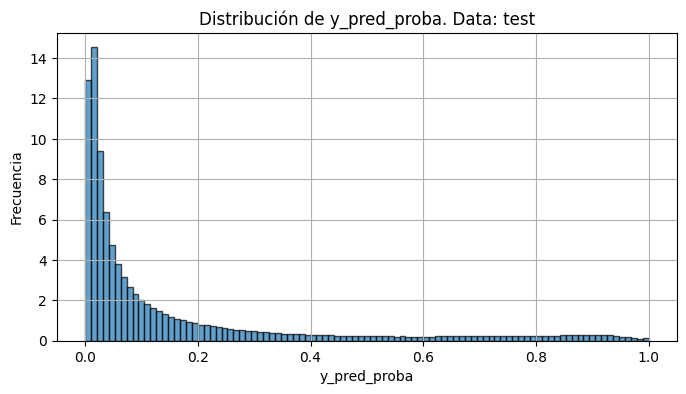

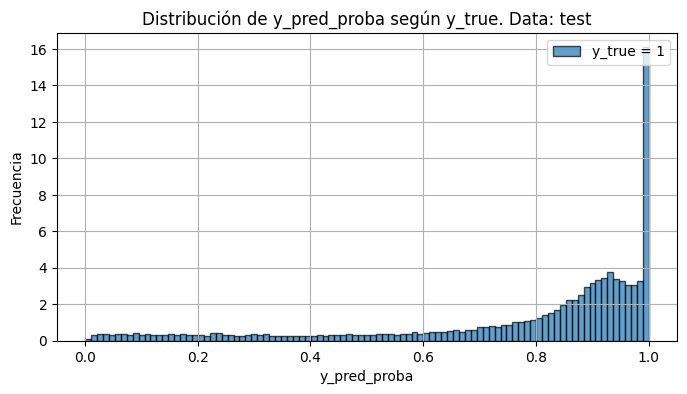

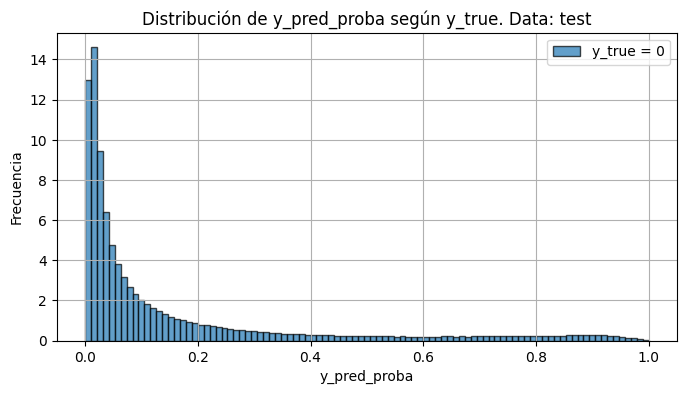

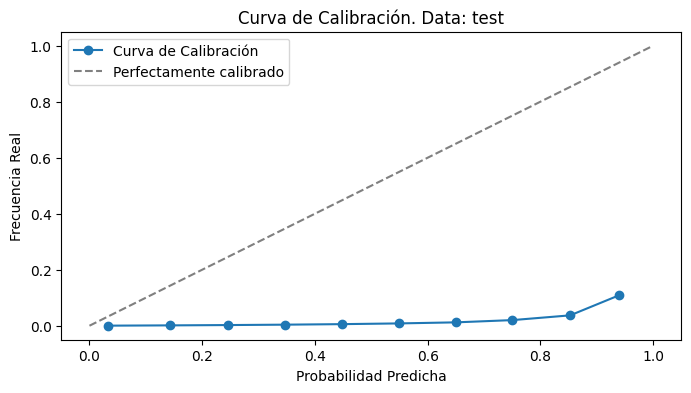

value          name_model model_name  \
class_name metric_name    dataset_name                                          
1          f1-score n_top test          2.9798  [0, 1, 2, 4, 5, 7]   Ensamble   
           true_sum n_top test           25503  [0, 1, 2, 4, 5, 7]   Ensamble   
           backtest       test          1.5124  [0, 1, 2, 4, 5, 7]   Ensamble   

                                             select_model  
class_name metric_name    dataset_name                     
1          f1-score n_top test          modelo_produccion  
           true_sum n_top test          modelo_produccion  
           backtest       test          modelo_produccion

In [20]:
info_save2=ms.calc_metrics_before_backtesting(info_save_all, info_save_temp,params)

In [ ]:
# con eda
check_df_cientifico = info_save2['select_model2']
check_df_cientifico = check_df_cientifico[np.in1d(check_df_cientifico.index.get_level_values(1),['backtest','recall n_top','Precision n_top','f1-score n_top'])].reset_index() 
check_df_cientifico = check_df_cientifico[check_df_cientifico['class_name'].isin([1,1.0,'1','1.0'])]
check_df_cientifico = check_df_cientifico.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df_cientifico

In [20]:
# sin eda, experimento 1
check_df_cientifico = info_save2['select_model2']
check_df_cientifico = check_df_cientifico[np.in1d(check_df_cientifico.index.get_level_values(1),['backtest','recall n_top','Precision n_top','f1-score n_top'])].reset_index() 
check_df_cientifico = check_df_cientifico[check_df_cientifico['class_name'].isin([1,1.0,'1','1.0'])]
check_df_cientifico = check_df_cientifico.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df_cientifico

value  \
metric_name     dataset_name class_name select_model        name_model                   
Precision n_top test         1          best_fitting_model  Run12               1.4662   
                                        best_model_name     Run6                1.4398   
                                        best_unbiased_model Run3                1.4448   
                                        modelo_produccion   [0, 2, 4, 5, 7, 8]  1.4851   
                train        1          best_fitting_model  Run12               1.4707   
                                        best_model_name     Run6                1.4479   
                                        best_unbiased_model Run3                1.4531   
                                        modelo_produccion   [0, 2, 4, 5, 7, 8]  1.5033   
backtest        test         1          best_fitting_model  Run12               1.4662   
                                        best_model_name     Run6                1.4398   
                                        best_unbiased_model Run3                1.4448   
                                        modelo_produccion   [0, 2, 4, 5, 7, 8]  1.4851   
                train        1          best_fitting_model  Run12               1.4707   
                                        best_model_name     Run6                1.4479   
                                        best_unbiased_model Run3                1.4531   
                                        modelo_produccion   [0, 2, 4, 5, 7, 8]  1.5033   
f1-score n_top  test         1          best_fitting_model  Run12                 2.89   
                                        best_model_name     Run6                2.8387   
                                        best_unbiased_model Run3                2.8484   
                                        modelo_produccion   [0, 2, 4, 5, 7, 8]  2.9268   
                train        1          best_fitting_model  Run12               2.8987   
                                        best_model_name     Run6                2.8544   
                                        best_unbiased_model Run3                2.8646   
                                        modelo_produccion   [0, 2, 4, 5, 7, 8]  2.9621   
recall n_top    test         1          best_fitting_model  Run12                100.0   
                                        best_model_name     Run6                 100.0   
                                        best_unbiased_model Run3                 100.0   
                                        modelo_produccion   [0, 2, 4, 5, 7, 8]   100.0   
                train        1          best_fitting_model  Run12                100.0   
                                        best_model_name     Run6                 100.0   
                                        best_unbiased_model Run3                 100.0   
                                        modelo_produccion   [0, 2, 4, 5, 7, 8]   100.0   

                                                                                      model_name  
metric_name     dataset_name class_name select_model        name_model                            
Precision n_top test         1          best_fitting_model  Run12               random_forest_11  
                                        best_model_name     Run6                 random_forest_5  
                                        best_unbiased_model Run3                 random_forest_2  
                                        modelo_produccion   [0, 2, 4, 5, 7, 8]          Ensamble  
                train        1          best_fitting_model  Run12               random_forest_11  
                                        best_model_name     Run6                 random_forest_5  
                                        best_unbiased_model Run3                 random_forest_2  
                                        modelo_produccion   [0, 2, 4, 5, 7, 8]          Ensamble  
backtest        test         1

In [21]:
# sin eda, experimento 2
check_df_cientifico = info_save2['select_model2']
check_df_cientifico = check_df_cientifico[np.in1d(check_df_cientifico.index.get_level_values(1),['backtest','recall n_top','Precision n_top','f1-score n_top'])].reset_index() 
check_df_cientifico = check_df_cientifico[check_df_cientifico['class_name'].isin([1,1.0,'1','1.0'])]
check_df_cientifico = check_df_cientifico.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df_cientifico

value  \
metric_name     dataset_name class_name select_model        name_model                   
Precision n_top test         1          best_fitting_model  Run9                1.4563   
                                        best_model_name     Run3                 1.434   
                                        best_unbiased_model Run3                 1.434   
                                        modelo_produccion   [0, 1, 2, 4, 5, 7]  1.5124   
                train        1          best_fitting_model  Run9                1.4608   
                                        best_model_name     Run3                1.4427   
                                        best_unbiased_model Run3                1.4427   
                                        modelo_produccion   [0, 1, 2, 4, 5, 7]  1.5666   
backtest        test         1          best_fitting_model  Run9                1.4563   
                                        best_model_name     Run3                 1.434   
                                        best_unbiased_model Run3                 1.434   
                                        modelo_produccion   [0, 1, 2, 4, 5, 7]  1.5124   
                train        1          best_fitting_model  Run9                1.4608   
                                        best_model_name     Run3                1.4427   
                                        best_unbiased_model Run3                1.4427   
                                        modelo_produccion   [0, 1, 2, 4, 5, 7]  1.5666   
f1-score n_top  test         1          best_fitting_model  Run9                2.8708   
                                        best_model_name     Run3                2.8274   
                                        best_unbiased_model Run3                2.8274   
                                        modelo_produccion   [0, 1, 2, 4, 5, 7]  2.9798   
                train        1          best_fitting_model  Run9                2.8796   
                                        best_model_name     Run3                2.8444   
                                        best_unbiased_model Run3                2.8444   
                                        modelo_produccion   [0, 1, 2, 4, 5, 7]  3.0849   
recall n_top    test         1          best_fitting_model  Run9                 100.0   
                                        best_model_name     Run3                 100.0   
                                        best_unbiased_model Run3                 100.0   
                                        modelo_produccion   [0, 1, 2, 4, 5, 7]   100.0   
                train        1          best_fitting_model  Run9                 100.0   
                                        best_model_name     Run3                 100.0   
                                        best_unbiased_model Run3                 100.0   
                                        modelo_produccion   [0, 1, 2, 4, 5, 7]   100.0   

                                                                                     model_name  
metric_name     dataset_name class_name select_model        name_model                           
Precision n_top test         1          best_fitting_model  Run9                random_forest_8  
                                        best_model_name     Run3                random_forest_2  
                                        best_unbiased_model Run3                random_forest_2  
                                        modelo_produccion   [0, 1, 2, 4, 5, 7]         Ensamble  
                train        1          best_fitting_model  Run9                random_forest_8  
                                        best_model_name     Run3                random_forest_2  
                                        best_unbiased_model Run3                random_forest_2  
                                        modelo_produccion   [0, 1, 2, 4, 5, 7]         Ensamble  
backtest        test         1          

In [22]:
# ks en uno de los modeos del ensamble
display(info_save2[info_save2['modelo_produccion']['nodos_select'][0]]['ks_train'].head())
display(info_save2[info_save2['modelo_produccion']['nodos_select'][0]]['ks_test'].head())

prob_min  prob_max  tasa_aperturas
0     90.14    100.00           14.49
1     86.62     90.14            5.67
2     83.19     86.62            4.27
3     79.06     83.19            3.32
4     73.82     79.06            2.59

prob_min  prob_max  tasa_aperturas
0     90.15    100.00           14.49
1     86.62     90.15            5.49
2     83.20     86.62            4.11
3     79.10     83.20            3.25
4     73.84     79.10            2.64

# optimizar ensamblado

In [25]:
train = info_save2['Votaciones']['train']
train2 = train.replace(0,np.nan).dropna(how = 'all').replace(np.nan,0)
index_train = ~train.index.isin(train2.index.tolist())
drops = train.index[index_train]
train.shape

test = info_save2['Votaciones']['test']
test2 = test.replace(0,np.nan).dropna(how = 'all').replace(np.nan,0)
index_test = ~test.index.isin(test2.index.tolist())
drops2 = test.index[index_test]
#test.index = list(range(test.shape[0]))
test.shape

(5620797, 7)

In [26]:
best_probs = params['n_obs_filter']
best_probs = 0.2
import itertools
from multiprocessing import Pool, cpu_count
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math
def calcular_metricas(itter,best_probs = best_probs):
    res = results[itter]
    total_count = res.shape[0]
    selected = res.nlargest(int(total_count * best_probs)).index
    return itter, y_true['y'][selected].sum()  # o la métrica que necesites

mejor_test_dado_mejores_train = True
ignore_train = False
first_loop = False

In [58]:
mejor_test_dado_mejores_train = True
ignore_train = False
first_loop = True

In [70]:
mejor_test_dado_mejores_train = False
ignore_train = True
first_loop = True

In [71]:
# Obtener el número de núcleos disponibles
timing = time.time()
num_nucleos = int(cpu_count()/2) # Puedes ajustar este número según sea necesario
msj = ['Train Data','Test Data']
lopps_df = [train,test]
nulls = [drops,drops2]
if ignore_train == True:
    msj = ["test Data"]
    lopps_df = [test]
    nulls = [drops2]
df_model_unic = pd.DataFrame()

for t,df_select in enumerate(lopps_df):
    y_true = df_select[['y']]
    tot = int(y_true.shape[0]*best_probs)
    print("N TOP",tot,".EMPEZAMOS: ",msj[t])
    dropping = nulls[t]
    df_select = df_select.drop('y', axis = 1).drop(dropping, axis = 0)

    if t == 0:
        n = df_select.shape[1]
        # Lista de elementos
        modelos = list(range(0,min(n,3),1)) # el algoritmo se ponderara son con 3 discriminaciones
        # Obtener todas las combinaciones de 2 elementos
        combinaciones = list(itertools.product(modelos, repeat = n))
        combinaciones = pd.DataFrame(combinaciones, columns = df_select.columns.tolist())
        weights = combinaciones.div(combinaciones.sum(axis=1), axis=0).dropna(how = 'all')
        modelos_unicos = []
        for i in range(n):
            filt = combinaciones[combinaciones[combinaciones.columns[i]] == 1]
            filt = filt.drop(combinaciones.columns[i], axis = 1)
            filt = filt.loc[(filt == 0).all(axis=1)]
            modelos_unicos.append(filt.index[0])
        weights_unicos = weights.loc[modelos_unicos]
        weights = weights.drop_duplicates()
    else:
        if mejor_test_dado_mejores_train == True:
            weights = weights.loc[best_iter_w.index.tolist()+modelos_unicos]
        else:
            pass
        #results_train = results.copy()
    logger.info(f"Numero de iteraciones: {weights.shape[0]}. {msj[t]}")
    #results = df_select @ weights.T # observaciones x iteraciones
    results = df_select.astype(np.float32).values @ weights.astype(np.float32).T.values
    results = pd.DataFrame(results, index = df_select.index, columns = weights.T.columns)
    nulos_temp =pd.DataFrame(np.zeros((dropping.shape[0],weights.shape[0])),index = dropping, columns = results.columns)
    results = pd.concat([results,nulos_temp], axis = 0)
    results = results.loc[y_true.index]
    # Usar Pool para paralelizar
    if __name__ == '__main__':
        with Pool(processes=num_nucleos) as pool:  # Especificar el número de núcleos
            resultados = pool.map(calcular_metricas, results.columns)
    
        # Convertir los resultados a un DataFrame
        epochs = pd.DataFrame(resultados, columns=['Iteracion', 'Valor'])
        epochs.set_index('Iteracion', inplace=True)

    maxi_true = epochs['Valor'].max()
    best_iter_w = epochs[epochs['Valor'] == maxi_true]
    trues = y_true['y'].sum()
    logger.info(f"TP: {maxi_true}. True: {trues}. Tasa de Exito: {np.round(maxi_true/tot*100,4)}%. Usando {best_probs} deciles para {msj[t]}")
    if best_iter_w.shape[0] == 1:
        logger.info(f"Numero de Iteraciones Finales: {best_iter_w.shape[0]}. {msj[t]}")
        print('------------------------')        
        break
    if t == 1:
        logger.info(f"Numero de Iteraciones Finales: {best_iter_w.shape[0]}. {msj[t]}")
        print('------------------------')
    if first_loop == True:
        break
minutess = (time.time() - timing) /60
hrs = math.floor(minutess / 60)
minutes = minutess - hrs * 60
logger.info(f"Hrs: {hrs}. Min {minutes}")
epochs.shape

N TOP 1124159 .EMPEZAMOS:  test Data


[01/24/25 16:10:18] INFO     Numero de iteraciones: 665. test Data                                 ]8;id=327475;file:///tmp/ipykernel_19680/3713006134.py\3713006134.py]8;;\:]8;id=616989;file:///tmp/ipykernel_19680/3713006134.py#42\42]8;;\

[01/24/25 16:11:19] INFO     TP: 24935.0. True: 26645.0. Tasa de Exito: 2.2181%. Usando 0.2        ]8;id=729756;file:///tmp/ipykernel_19680/3713006134.py\3713006134.py]8;;\:]8;id=571471;file:///tmp/ipykernel_19680/3713006134.py#61\61]8;;\
                             deciles para test Data                                                                

                    INFO     Numero de Iteraciones Finales: 1. test Data                           ]8;id=760647;file:///tmp/ipykernel_19680/3713006134.py\3713006134.py]8;;\:]8;id=842549;file:///tmp/ipykernel_19680/3713006134.py#63\63]8;;\

------------------------


                    INFO     Hrs: 0. Min 1.0240453362464905                                        ]8;id=207890;file:///tmp/ipykernel_19680/3713006134.py\3713006134.py]8;;\:]8;id=794690;file:///tmp/ipykernel_19680/3713006134.py#74\74]8;;\

(665, 1)

In [72]:
print(mejor_test_dado_mejores_train)
print(ignore_train)
print(first_loop)

False
True
True


In [73]:
epochs_select = (epochs.loc[modelos_unicos]/tot*100).round(4).sort_values(by="Valor", ascending = False)
mejor_unico = epochs_select.index[0]
print("Mejor modelo Unico")
display(combinaciones.loc[[mejor_unico]])
print("% TP en n_filt_obs de los modelos individuales o unicos ejecutados")
display(epochs_select)
print("Cominaciones e ietraciones de modelos unicos")
display(combinaciones.loc[modelos_unicos])
toti = int(y_true.shape[0]*0.1)
a,b = calcular_metricas(mejor_unico,0.1)
print("Decil 1: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.2)
a,b = calcular_metricas(mejor_unico,0.2)
print("Decil 2: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.3)
a,b = calcular_metricas(mejor_unico,0.3)
print("Decil 3: ",(a,np.round(100*b/toti,4)))

Mejor modelo Unico


Run1  Run2  Run3  Run5  Run6  Run8
81     0     1     0     0     0     0

% TP en n_filt_obs de los modelos individuales o unicos ejecutados


Valor
Iteracion        
81         2.1954
1          2.1841
9          2.1807
243        2.1205
3          2.0912
27         2.0180

Cominaciones e ietraciones de modelos unicos


Run1  Run2  Run3  Run5  Run6  Run8
243     1     0     0     0     0     0
81      0     1     0     0     0     0
27      0     0     1     0     0     0
9       0     0     0     1     0     0
3       0     0     0     0     1     0
1       0     0     0     0     0     1

Decil 1:  (81, 4.0149)
Decil 2:  (81, 2.1954)
Decil 3:  (81, 1.5086)


In [74]:
epochs_select = (epochs/tot*100).round(4).sort_values(by="Valor", ascending = False)
mejor_combinado = epochs_select.index[0]
print("Mejor modelo Iteraciones")
display(combinaciones.loc[[mejor_combinado]])
print("% TP en n_filt_obs de los modelos individuales o unicos ejecutados")
display(epochs_select.head())
toti = int(y_true.shape[0]*0.1)
a,b = calcular_metricas(mejor_combinado,0.1)
print("Decil 1: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.2)
a,b = calcular_metricas(mejor_combinado,0.2)
print("Decil 2: ",(a,np.round(100*b/toti,4)))
toti = int(y_true.shape[0]*0.3)
a,b = calcular_metricas(mejor_combinado,0.3)
print("Decil 3: ",(a,np.round(100*b/toti,4)))

Mejor modelo Iteraciones


Run1  Run2  Run3  Run5  Run6  Run8
172     0     2     0     1     0     1

% TP en n_filt_obs de los modelos individuales o unicos ejecutados


Valor
Iteracion        
172        2.2181
173        2.2170
181        2.2167
82         2.2161
406        2.2152

Decil 1:  (172, 4.0377)
Decil 2:  (172, 2.2181)
Decil 3:  (172, 1.5258)


**Sin eda experimento 1**

In [32]:
iterr = [33,30,303,276,57] # test best in test
iterr2 = iterr   # test best in train
iterr3 = [3,33,30,57,276] # train best in test
iterr4 = iterr3 # train best in train

In [39]:
# sin eda
# test best in test
display(combinaciones.loc[iterr])
display(epochs_select.loc[iterr])

Run1  Run3  Run5  Run6  Run8  Run9
33      0     0     1     0     2     0
30      0     0     1     0     1     0
303     1     0     2     0     2     0
276     1     0     1     0     2     0
57      0     0     2     0     1     0

Valor
Iteracion        
33         2.1887
30         2.1878
303        2.1855
276        2.1854
57         2.1851

In [49]:
# sin eda
# test best in train
display(combinaciones.loc[iterr2])
display(epochs_select.loc[iterr2])

Run1  Run3  Run5  Run6  Run8  Run9
33      0     0     1     0     2     0
30      0     0     1     0     1     0
303     1     0     2     0     2     0
276     1     0     1     0     2     0
57      0     0     2     0     1     0

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:4                                                                                    │
│                                                                                                  │
│   1 # sin eda                                                                                    │
│   2 # test best in train                                                                         │
│   3 display(combinaciones.loc[iterr2])                                                           │
│ ❱ 4 display(epochs_select.loc[iterr2])                                                           │
│   5                                                                                              │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/pandas/core/indexi │
│ ng.py:1192 in __getitem__                                                                        │
│                                                                                                  │
│   1189 │   │   │                                                                                 │
│   1190 │   │   │   maybe_callable = com.apply_if_callable(key, self.obj)                         │
│   1191 │   │   │   maybe_callable = self._check_deprecated_callable_usage(key, maybe_callable)   │
│ ❱ 1192 │   │   │   return self._getitem_axis(maybe_callable, axis=axis)                          │
│   1193 │                                                                                         │
│   1194 │   def _is_scalar_access(self, key: tuple):                                              │
│   1195 │   │   raise NotImplementedError()                                                       │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/pandas/core/indexi │
│ ng.py:1421 in _getitem_axis                                                                      │
│                                                                                                  │
│   1418 │   │   │   │   if hasattr(key, "ndim") and key.ndim > 1:                                 │
│   1419 │   │   │   │   │   raise ValueError("Cannot index with multidimensional key")            │
│   1420 │   │   │   │                                                                             │
│ ❱ 1421 │   │   │   │   return self._getitem_iterable(key, axis=axis)                             │
│   1422 │   │   │                                                                                 │
│   1423 │   │   │   # nested tuple slicing                                                        │
│   1424 │   │   │   if is_nested_tuple(key, labels):                                              │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/pandas/core/indexi │
│ ng.py:1361 in _getitem_iterable                                                                  │
│                                                                                                  │
│   1358 │   │   self._validate_key(key, axis)                                                     │
│   1359 │   │                                                                                     │
│   1360 │   │   # A collection of keys                                                            │
│ ❱ 1361 │   │   keyarr, indexer = self._get_listlike_indexer(key, axis)                           │
│   1362 │   │   return self.obj._reindex_with_indexers(                                           │
│   1363 │   │   │   {axis: [keyarr, indexer]}, copy=True, al

In [40]:
# sin eda
# train best in test
display(combinaciones.loc[iterr3])
display(epochs_select.loc[iterr3])

Run1  Run3  Run5  Run6  Run8  Run9
3       0     0     0     0     1     0
33      0     0     1     0     2     0
30      0     0     1     0     1     0
57      0     0     2     0     1     0
276     1     0     1     0     2     0

Valor
Iteracion        
3          2.1849
33         2.1887
30         2.1878
57         2.1851
276        2.1854

In [31]:
# sin eda
# train best in train
display(combinaciones.loc[iterr4])
display(epochs_select.loc[iterr4])

Run1  Run3  Run5  Run6  Run8  Run9
3       0     0     0     0     1     0
33      0     0     1     0     2     0
30      0     0     1     0     1     0
57      0     0     2     0     1     0
276     1     0     1     0     2     0

Valor
Iteracion        
3          2.2715
33         2.2648
30         2.2606
57         2.2560
276        2.2501

**Sin eda experimento 2**

In [75]:
iterr = [172,173,181,82,406]# test best in test
iterr2 = iterr   # test best in train
iterr3 = [81,163,171,405,82] # train best in test
iterr4 = iterr3 # train best in train

In [76]:
# sin eda, test best in test
display(combinaciones.loc[iterr])
display(epochs_select.loc[iterr])

Run1  Run2  Run3  Run5  Run6  Run8
172     0     2     0     1     0     1
173     0     2     0     1     0     2
181     0     2     0     2     0     1
82      0     1     0     0     0     1
406     1     2     0     0     0     1

Valor
Iteracion        
172        2.2181
173        2.2170
181        2.2167
82         2.2161
406        2.2152

In [64]:
# sin eda, # test best in train
display(combinaciones.loc[iterr2])
display(epochs_select.loc[iterr2])

Run1  Run2  Run3  Run5  Run6  Run8
172     0     2     0     1     0     1
173     0     2     0     1     0     2
181     0     2     0     2     0     1
82      0     1     0     0     0     1
406     1     2     0     0     0     1

Valor
Iteracion        
172        2.3618
173        2.3583
181        2.3573
82         2.3626
406        2.3602

In [77]:
# sin eda, # train best in test
display(combinaciones.loc[iterr3])
display(epochs_select.loc[iterr3])

Run1  Run2  Run3  Run5  Run6  Run8
81      0     1     0     0     0     0
163     0     2     0     0     0     1
171     0     2     0     1     0     0
405     1     2     0     0     0     0
82      0     1     0     0     0     1

Valor
Iteracion        
81         2.1954
163        2.2145
171        2.2135
405        2.2073
82         2.2161

In [65]:
# sin eda,# train best in train
display(combinaciones.loc[iterr4])
display(epochs_select.loc[iterr4])

Run1  Run2  Run3  Run5  Run6  Run8
81      0     1     0     0     0     0
163     0     2     0     0     0     1
171     0     2     0     1     0     0
405     1     2     0     0     0     0
82      0     1     0     0     0     1

Valor
Iteracion        
81         2.3699
163        2.3653
171        2.3642
405        2.3631
82         2.3626

**con eda, experimento 1**

In [ ]:
# con eda, test best in test
display(combinaciones.loc[iterr])
display(epochs_select.loc[iterr])

In [ ]:
# con eda, # test best in train
display(combinaciones.loc[iterr2])
display(epochs_select.loc[iterr2])

In [ ]:
# con eda, # train best in test
display(combinaciones.loc[iterr3])
display(epochs_select.loc[iterr3])

In [ ]:
# con eda,# train best in train
display(combinaciones.loc[iterr4])
display(epochs_select.loc[iterr4])

In [78]:
combinaciones_interes = list(set([mejor_unico]+iterr+iterr2+iterr3+iterr4))
rangos = sorted(list(set([params['n_obs_filter'],0.01,0.05,0.1,0.2,0.3,0.5])))
print('Iteracion: ',combinaciones_interes)
print('Calling: ',rangos)

Iteracion:  [163, 171, 172, 173, 81, 82, 181, 406, 405]
Calling:  [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]


**Experimento1**

In [52]:
# sin eda train
summary = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary.loc[mejor_combinado,nodo] = res1234
summary.index.name = 'Iteraccion'
summary

0.01    0.05    0.10    0.20    0.30    0.50
Iteraccion                                                
33          1.8239  3.5308  4.1793  4.5295  4.6384  4.6718
3           1.8070  3.5606  4.2074  4.5430  4.6424  4.6690
303         1.8108  3.4654  4.1247  4.4991  4.6113  4.6708
276         1.8146  3.4678  4.1272  4.5003  4.6127  4.6708
57          1.8035  3.4992  4.1488  4.5120  4.6136  4.6718
30          1.8203  3.5161  4.1637  4.5212  4.6277  4.6718

In [42]:
# sin eda test
summary_test = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary_test.loc[mejor_combinado,nodo] = res1234
summary_test.index.name = 'Iteraccion'
summary_test

0.01    0.05    0.10    0.20    0.30    0.50
Iteraccion                                                
33          1.6599  3.2896  3.9662  4.3775  4.5387  4.6125
3           1.6377  3.2830  3.9658  4.3698  4.5389  4.5921
303         1.6713  3.2819  3.9598  4.3709  4.5333  4.6257
276         1.6647  3.2798  3.9580  4.3707  4.5333  4.6257
57          1.6583  3.2841  3.9637  4.3702  4.5275  4.6125
30          1.6649  3.2860  3.9662  4.3755  4.5358  4.6125

**Experimento2**

In [67]:
# sin eda train
summary = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary.loc[mejor_combinado,nodo] = res1234
summary.index.name = 'Iteraccion'
summary

0.01    0.05    0.10    0.20    0.30    0.50
Iteraccion                                                
163         2.2309  4.4443  4.6953  4.7306  4.7360  4.7399
171         2.2200  4.4470  4.6917  4.7284  4.7347  4.7399
172         2.1998  4.3143  4.6561  4.7237  4.7343  4.7399
173         2.1711  4.2389  4.6317  4.7167  4.7325  4.7399
81          2.2528  4.6038  4.7387  4.7399  4.7399  4.7401
82          2.1994  4.3186  4.6607  4.7252  4.7334  4.7399
181         2.1640  4.2347  4.6280  4.7147  4.7298  4.7399
406         2.1969  4.2958  4.6491  4.7203  4.7308  4.7399
405         2.2164  4.4246  4.6815  4.7262  4.7321  4.7399

In [79]:
# sin eda test
summary_test = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary_test.loc[mejor_combinado,nodo] = res1234
summary_test.index.name = 'Iteraccion'
summary_test

0.01    0.05    0.10    0.20    0.30    0.50
Iteraccion                                                
163         1.6788  3.4264  4.0414  4.4291  4.5666  4.6497
171         1.6717  3.4218  4.0407  4.4270  4.5680  4.6527
172         1.6930  3.4152  4.0377  4.4362  4.5773  4.6606
173         1.7062  3.3986  4.0295  4.4341  4.5702  4.6606
81          1.6448  3.3983  4.0149  4.3908  4.5259  4.5897
82          1.6960  3.4052  4.0336  4.4321  4.5698  4.6497
181         1.7046  3.3979  4.0284  4.4334  4.5743  4.6606
406         1.6873  3.4098  4.0224  4.4303  4.5693  4.6664
405         1.6613  3.4111  4.0183  4.4147  4.5607  4.6513

**Con eda**

In [56]:
# con eda train
summary = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary.loc[mejor_combinado,nodo] = res1234
summary.index.name = 'Iteraccion'
summary

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:7                                                                                    │
│                                                                                                  │
│    4 │   toti = int(y_true.shape[0]*0.1)                                                         │
│    5 │                                                                                           │
│    6 │   for nodo in rangos:                                                                     │
│ ❱  7 │   │   a,b = calcular_metricas(mejor_combinado,nodo)                                       │
│    8 │   │   res1234 = np.round(100*b/toti,4)                                                    │
│    9 │   │   summary.loc[mejor_combinado,nodo] = res1234                                         │
│   10 summary.index.name = 'Iteraccion'                                                           │
│                                                                                                  │
│ in calcular_metricas:12                                                                          │
│                                                                                                  │
│    9 def calcular_metricas(itter,best_probs = best_probs):                                       │
│   10 │   res = results[itter]                                                                    │
│   11 │   total_count = res.shape[0]                                                              │
│ ❱ 12 │   selected = res.nlargest(int(total_count * best_probs)).index                            │
│   13 │   return itter, y_true['y'][selected].sum()  # o la métrica que necesites                 │
│   14                                                                                             │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/pandas/core/series │
│ .py:4232 in nlargest                                                                             │
│                                                                                                  │
│   4229 │   │   Brunei        434000                                                              │
│   4230 │   │   dtype: int64                                                                      │
│   4231 │   │   """                                                                               │
│ ❱ 4232 │   │   return selectn.SelectNSeries(self, n=n, keep=keep).nlargest()                     │
│   4233 │                                                                                         │
│   4234 │   def nsmallest(                                                                        │
│   4235 │   │   self, n: int = 5, keep: Literal["first", "last", "all"] = "first"                 │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/pandas/core/method │
│ s/selectn.py:57 in nlargest                                                                      │
│                                                                                                  │
│    54 │                                                                                          │
│    55 │   @final                                                                                 │
│    56 │   def nlargest(self):                                                                    │
│ ❱  57 │   │   return self.compute("nlargest")                                                    │
│    58 │                                                                                          │
│    59 │   @final                                           

In [ ]:
# con eda test
summary_test = pd.DataFrame()
for mejor_combinado in combinaciones_interes:
    toti = int(y_true.shape[0]*0.1)
    
    for nodo in rangos:
        a,b = calcular_metricas(mejor_combinado,nodo)
        res1234 = np.round(100*b/toti,4)
        summary_test.loc[mejor_combinado,nodo] = res1234
summary_test.index.name = 'Iteraccion'
summary_test

**Analisis, experimento1**

<Axes: >

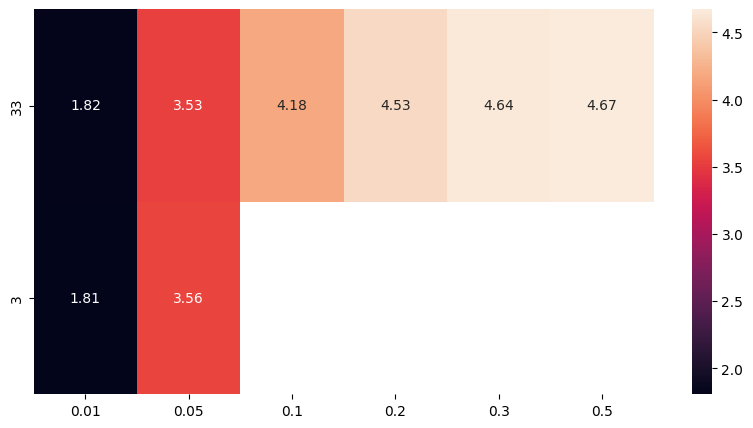

In [57]:
# sin eda train
plt.figure(figsize = (10,5))
sns.heatmap(summary, annot=True,  fmt=".2f")

<Axes: ylabel='Iteraccion'>

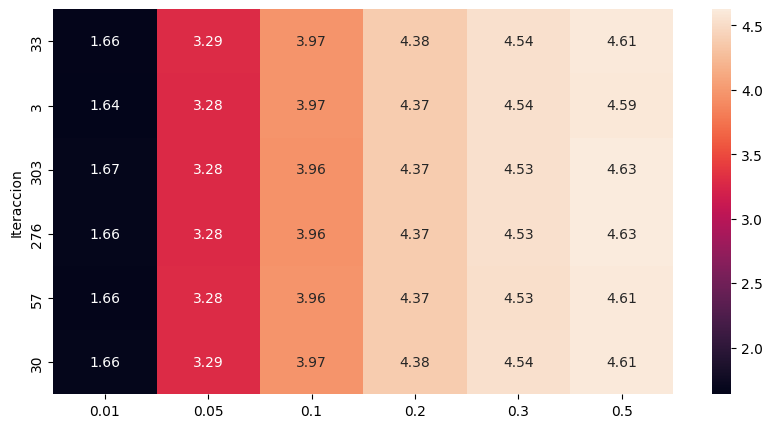

In [58]:
# sin eda test
plt.figure(figsize = (10,5))
sns.heatmap(summary_test, annot=True,  fmt=".2f")

<Axes: >

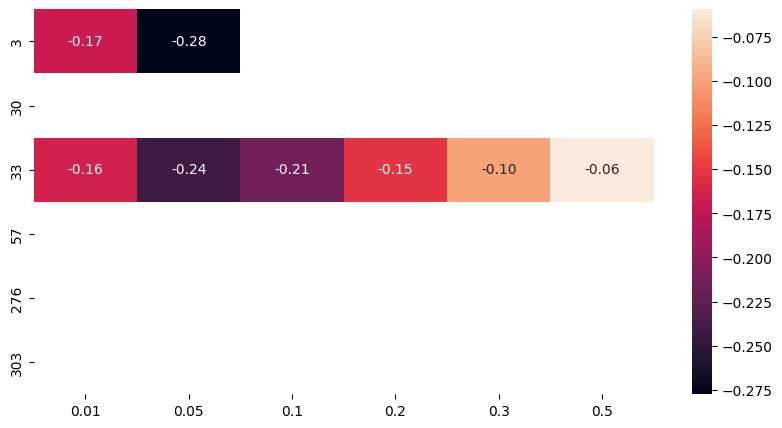

In [59]:
# sin eda test-train
plt.figure(figsize = (10,5))
sns.heatmap(summary_test -summary, annot=True,  fmt=".2f")

**Analisis, experimento2**

<Axes: ylabel='Iteraccion'>

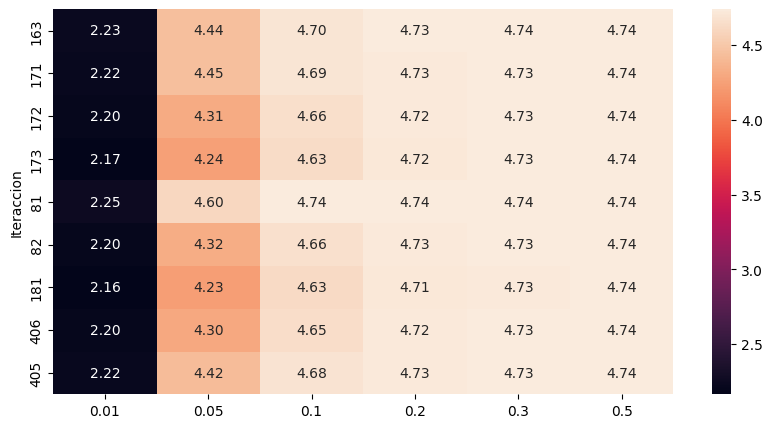

In [69]:
# sin eda train
plt.figure(figsize = (10,5))
sns.heatmap(summary, annot=True,  fmt=".2f")

<Axes: ylabel='Iteraccion'>

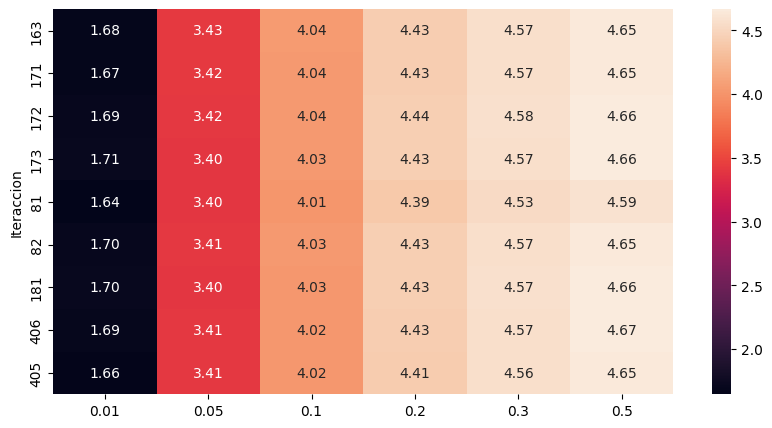

In [80]:
# sin eda test
plt.figure(figsize = (10,5))
sns.heatmap(summary_test, annot=True,  fmt=".2f")

<Axes: ylabel='Iteraccion'>

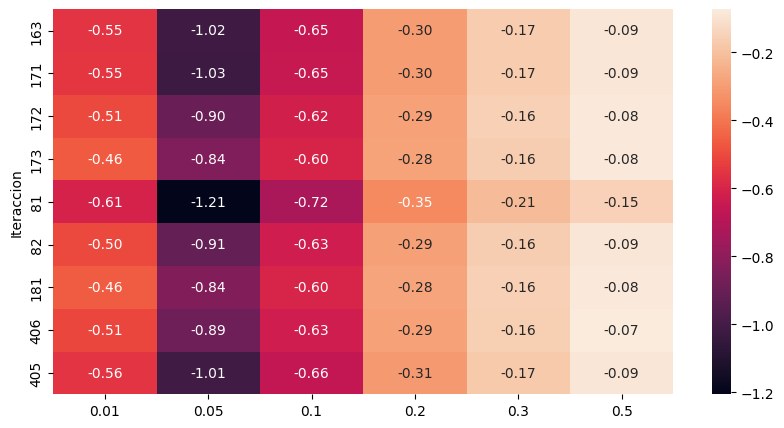

In [81]:
# sin eda test-train
plt.figure(figsize = (10,5))
sns.heatmap(summary_test -summary, annot=True,  fmt=".2f")

**Analisis, experimento1 con eda**

In [ ]:
# con eda
plt.figure(figsize = (10,5))
sns.heatmap(summary, annot=True,  fmt=".2f")

In [ ]:
# con eda test
plt.figure(figsize = (10,5))
sns.heatmap(summary_test, annot=True,  fmt=".2f")

<Axes: ylabel='Iteraccion'>

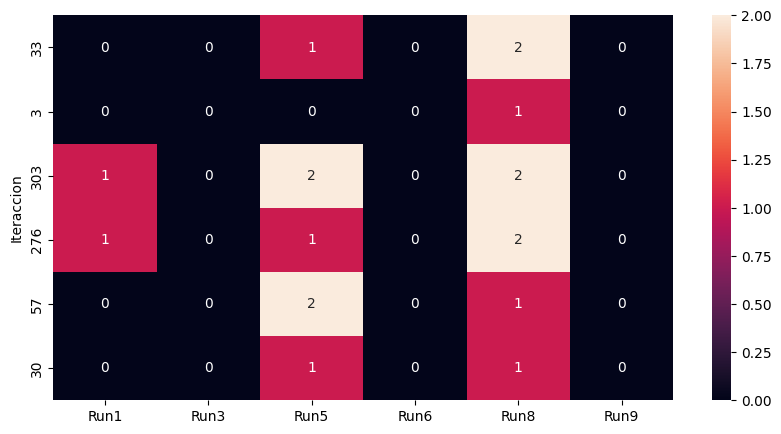

In [61]:
# sin eda, experimento1
plt.figure(figsize = (10,5)) #modelo mejor: 33
sns.heatmap(combinaciones.loc[summary_test.index],annot=True)

<Axes: ylabel='Iteraccion'>

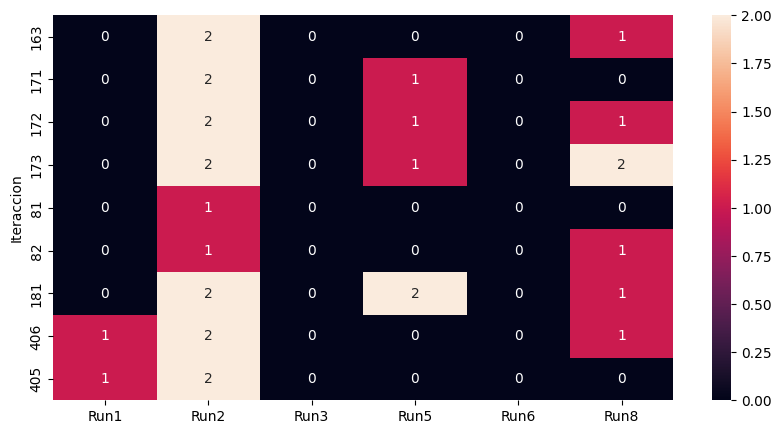

In [82]:
# sin eda, experimento2
plt.figure(figsize = (10,5)) #modelo mejor: 172 y luego el 406
sns.heatmap(combinaciones.loc[summary_test.index],annot=True)

In [ ]:
# con eda
plt.figure(figsize = (10,5))
sns.heatmap(combinaciones.loc[summary.index],annot=True)

In [22]:
# mejor modelo
check_df

value  \
metric_name     dataset_name class_name select_model        name_model                 
Precision n_top test         1          best_fitting_model  Run9              3.8748   
                                        best_model_name     Run4              4.2568   
                                        best_unbiased_model Run1              4.1103   
                                        modelo_produccion   [0, 3, 4, 6, 9]   4.2708   
                train        1          best_fitting_model  Run9              3.9034   
                                        best_model_name     Run4              5.3038   
                                        best_unbiased_model Run1               4.272   
                                        modelo_produccion   [0, 3, 4, 6, 9]   5.1201   
backtest        test         1          best_fitting_model  Run9              3.8748   
                                        best_model_name     Run4              4.2568   
                                        best_unbiased_model Run1              4.1103   
                                        modelo_produccion   [0, 3, 4, 6, 9]   4.2708   
                train        1          best_fitting_model  Run9              3.9034   
                                        best_model_name     Run4              5.3038   
                                        best_unbiased_model Run1               4.272   
                                        modelo_produccion   [0, 3, 4, 6, 9]   5.1201   
f1-score n_top  test         1          best_fitting_model  Run9              7.4604   
                                        best_model_name     Run4              8.1659   
                                        best_unbiased_model Run1              7.8961   
                                        modelo_produccion   [0, 3, 4, 6, 9]   8.1917   
                train        1          best_fitting_model  Run9              7.5135   
                                        best_model_name     Run4             10.0732   
                                        best_unbiased_model Run1               8.194   
                                        modelo_produccion   [0, 3, 4, 6, 9]   9.7414   
recall n_top    test         1          best_fitting_model  Run9               100.0   
                                        best_model_name     Run4               100.0   
                                        best_unbiased_model Run1               100.0   
                                        modelo_produccion   [0, 3, 4, 6, 9]    100.0   
                train        1          best_fitting_model  Run9               100.0   
                                        best_model_name     Run4               100.0   
                                        best_unbiased_model Run1               100.0   
                                        modelo_produccion   [0, 3, 4, 6, 9]    100.0   

                                                                                  model_name  
metric_name     dataset_name class_name select_model        name_model                        
Precision n_top test         1          best_fitting_model  Run9             random_forest_8  
                                        best_model_name     Run4                   xgboost_3  
                                        best_unbiased_model Run1                       MLP_0  
                                        modelo_produccion   [0, 3, 4, 6, 9]         Ensamble  
                train        1          best_fitting_model  Run9             random_forest_8  
                                        best_model_name     Run4                   xgboost_3  
                                        best_unbiased_model Run1                       MLP_0  
                                        modelo_produccion   [0, 3, 4, 6, 9]         Ensamble  
backtest        test         1          best_fitting_model  Run9             random_forest_8  
                                        b

In [ ]:
# MVP2
check_df_mvp2

In [62]:
# ensamble sin optimizar exp1
check_df_cientifico

value  \
metric_name     dataset_name class_name select_model        name_model                   
Precision n_top test         1          best_fitting_model  Run12               1.4662   
                                        best_model_name     Run6                1.4398   
                                        best_unbiased_model Run3                1.4448   
                                        modelo_produccion   [0, 2, 4, 5, 7, 8]  1.4851   
                train        1          best_fitting_model  Run12               1.4707   
                                        best_model_name     Run6                1.4479   
                                        best_unbiased_model Run3                1.4531   
                                        modelo_produccion   [0, 2, 4, 5, 7, 8]  1.5033   
backtest        test         1          best_fitting_model  Run12               1.4662   
                                        best_model_name     Run6                1.4398   
                                        best_unbiased_model Run3                1.4448   
                                        modelo_produccion   [0, 2, 4, 5, 7, 8]  1.4851   
                train        1          best_fitting_model  Run12               1.4707   
                                        best_model_name     Run6                1.4479   
                                        best_unbiased_model Run3                1.4531   
                                        modelo_produccion   [0, 2, 4, 5, 7, 8]  1.5033   
f1-score n_top  test         1          best_fitting_model  Run12                 2.89   
                                        best_model_name     Run6                2.8387   
                                        best_unbiased_model Run3                2.8484   
                                        modelo_produccion   [0, 2, 4, 5, 7, 8]  2.9268   
                train        1          best_fitting_model  Run12               2.8987   
                                        best_model_name     Run6                2.8544   
                                        best_unbiased_model Run3                2.8646   
                                        modelo_produccion   [0, 2, 4, 5, 7, 8]  2.9621   
recall n_top    test         1          best_fitting_model  Run12                100.0   
                                        best_model_name     Run6                 100.0   
                                        best_unbiased_model Run3                 100.0   
                                        modelo_produccion   [0, 2, 4, 5, 7, 8]   100.0   
                train        1          best_fitting_model  Run12                100.0   
                                        best_model_name     Run6                 100.0   
                                        best_unbiased_model Run3                 100.0   
                                        modelo_produccion   [0, 2, 4, 5, 7, 8]   100.0   

                                                                                      model_name  
metric_name     dataset_name class_name select_model        name_model                            
Precision n_top test         1          best_fitting_model  Run12               random_forest_11  
                                        best_model_name     Run6                 random_forest_5  
                                        best_unbiased_model Run3                 random_forest_2  
                                        modelo_produccion   [0, 2, 4, 5, 7, 8]          Ensamble  
                train        1          best_fitting_model  Run12               random_forest_11  
                                        best_model_name     Run6                 random_forest_5  
                                        best_unbiased_model Run3                 random_forest_2  
                                        modelo_produccion   [0, 2, 4, 5, 7, 8]          Ensamble  
backtest        test         1

In [83]:
# ensamble sin optimizar exp2
check_df_cientifico

value  \
metric_name     dataset_name class_name select_model        name_model                   
Precision n_top test         1          best_fitting_model  Run9                1.4563   
                                        best_model_name     Run3                 1.434   
                                        best_unbiased_model Run3                 1.434   
                                        modelo_produccion   [0, 1, 2, 4, 5, 7]  1.5124   
                train        1          best_fitting_model  Run9                1.4608   
                                        best_model_name     Run3                1.4427   
                                        best_unbiased_model Run3                1.4427   
                                        modelo_produccion   [0, 1, 2, 4, 5, 7]  1.5666   
backtest        test         1          best_fitting_model  Run9                1.4563   
                                        best_model_name     Run3                 1.434   
                                        best_unbiased_model Run3                 1.434   
                                        modelo_produccion   [0, 1, 2, 4, 5, 7]  1.5124   
                train        1          best_fitting_model  Run9                1.4608   
                                        best_model_name     Run3                1.4427   
                                        best_unbiased_model Run3                1.4427   
                                        modelo_produccion   [0, 1, 2, 4, 5, 7]  1.5666   
f1-score n_top  test         1          best_fitting_model  Run9                2.8708   
                                        best_model_name     Run3                2.8274   
                                        best_unbiased_model Run3                2.8274   
                                        modelo_produccion   [0, 1, 2, 4, 5, 7]  2.9798   
                train        1          best_fitting_model  Run9                2.8796   
                                        best_model_name     Run3                2.8444   
                                        best_unbiased_model Run3                2.8444   
                                        modelo_produccion   [0, 1, 2, 4, 5, 7]  3.0849   
recall n_top    test         1          best_fitting_model  Run9                 100.0   
                                        best_model_name     Run3                 100.0   
                                        best_unbiased_model Run3                 100.0   
                                        modelo_produccion   [0, 1, 2, 4, 5, 7]   100.0   
                train        1          best_fitting_model  Run9                 100.0   
                                        best_model_name     Run3                 100.0   
                                        best_unbiased_model Run3                 100.0   
                                        modelo_produccion   [0, 1, 2, 4, 5, 7]   100.0   

                                                                                     model_name  
metric_name     dataset_name class_name select_model        name_model                           
Precision n_top test         1          best_fitting_model  Run9                random_forest_8  
                                        best_model_name     Run3                random_forest_2  
                                        best_unbiased_model Run3                random_forest_2  
                                        modelo_produccion   [0, 1, 2, 4, 5, 7]         Ensamble  
                train        1          best_fitting_model  Run9                random_forest_8  
                                        best_model_name     Run3                random_forest_2  
                                        best_unbiased_model Run3                random_forest_2  
                                        modelo_produccion   [0, 1, 2, 4, 5, 7]         Ensamble  
backtest        test         1          

In [ ]:
info_save_select_ensamble = catalog.load("info_save_select") # modelo generado, experimento1
print('Run_name: ',info_save_select_ensamble['modelo_produccion']['nodos_select'])
print('W: ',info_save_select_ensamble['modelo_produccion']['weights'])
check_df_opt = info_save_select_ensamble['select_model2']
check_df_opt = check_df_opt[np.in1d(check_df_opt.index.get_level_values(1),['backtest','recall n_top','Precision n_top','f1-score n_top'])].reset_index() 
check_df_opt = check_df_opt[check_df_opt['class_name'].isin([1,1.0,'1','1.0'])]
check_df_opt = check_df_opt.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df_opt

[01/17/25 16:59:35] INFO     Loading data from 'info_save_select' (PickleDataSet)...            ]8;id=934145;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=455930;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

Run_name:  [4, 7]
W:  [1, 2]


value  \
metric_name     dataset_name class_name select_model        name_model           
Precision n_top test         1          best_fitting_model  Run12       1.4662   
                                        best_model_name     Run6        1.4398   
                                        best_unbiased_model Run3        1.4448   
                                        modelo_produccion   [4, 7]      1.5129   
                train        1          best_fitting_model  Run12       1.4707   
                                        best_model_name     Run6        1.4479   
                                        best_unbiased_model Run3        1.4531   
                                        modelo_produccion   [4, 7]      1.5461   
backtest        test         1          best_fitting_model  Run12       1.4662   
                                        best_model_name     Run6        1.4398   
                                        best_unbiased_model Run3        1.4448   
                                        modelo_produccion   [4, 7]      1.5129   
                train        1          best_fitting_model  Run12       1.4707   
                                        best_model_name     Run6        1.4479   
                                        best_unbiased_model Run3        1.4531   
                                        modelo_produccion   [4, 7]      1.5461   
f1-score n_top  test         1          best_fitting_model  Run12         2.89   
                                        best_model_name     Run6        2.8387   
                                        best_unbiased_model Run3        2.8484   
                                        modelo_produccion   [4, 7]      2.9807   
                train        1          best_fitting_model  Run12       2.8987   
                                        best_model_name     Run6        2.8544   
                                        best_unbiased_model Run3        2.8646   
                                        modelo_produccion   [4, 7]      3.0452   
recall n_top    test         1          best_fitting_model  Run12        100.0   
                                        best_model_name     Run6         100.0   
                                        best_unbiased_model Run3         100.0   
                                        modelo_produccion   [4, 7]       100.0   
                train        1          best_fitting_model  Run12        100.0   
                                        best_model_name     Run6         100.0   
                                        best_unbiased_model Run3         100.0   
                                        modelo_produccion   [4, 7]       100.0   

                                                                              model_name  
metric_name     dataset_name class_name select_model        name_model                    
Precision n_top test         1          best_fitting_model  Run12       random_forest_11  
                                        best_model_name     Run6         random_forest_5  
                                        best_unbiased_model Run3         random_forest_2  
                                        modelo_produccion   [4, 7]              Ensamble  
                train        1          best_fitting_model  Run12       random_forest_11  
                                        best_model_name     Run6         random_forest_5  
                                        best_unbiased_model Run3         random_forest_2  
                                        modelo_produccion   [4, 7]              Ensamble  
backtest        test         1          best_fitting_model  Run12       random_forest_11  
                                        best_model_name     Run6         random_forest_5  
                                        best_unbiased_model Run3         random_forest_2  
                                        modelo_produccion   [4, 7]              Ensamble  
          

In [84]:
info_save_select_ensamble = catalog.load("info_save_select") # modelo generado, experimento2
print('Run_name: ',info_save_select_ensamble['modelo_produccion']['nodos_select'])
print('W: ',info_save_select_ensamble['modelo_produccion']['weights'])
check_df_opt = info_save_select_ensamble['select_model2']
check_df_opt = check_df_opt[np.in1d(check_df_opt.index.get_level_values(1),['backtest','recall n_top','Precision n_top','f1-score n_top'])].reset_index() 
check_df_opt = check_df_opt[check_df_opt['class_name'].isin([1,1.0,'1','1.0'])]
check_df_opt = check_df_opt.set_index(['metric_name','dataset_name','class_name','select_model','name_model']).sort_index()
check_df_opt

[01/24/25 16:51:00] INFO     Loading data from 'info_save_select' (PickleDataSet)...            ]8;id=693902;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=300377;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

Run_name:  [1, 4, 7]
W:  [2, 1, 1]


value  \
metric_name     dataset_name class_name select_model        name_model           
Precision n_top test         1          best_fitting_model  Run9        1.4563   
                                        best_model_name     Run3         1.434   
                                        best_unbiased_model Run3         1.434   
                                        modelo_produccion   [1, 4, 7]   1.5258   
                train        1          best_fitting_model  Run9        1.4608   
                                        best_model_name     Run3        1.4427   
                                        best_unbiased_model Run3        1.4427   
                                        modelo_produccion   [1, 4, 7]   1.5781   
backtest        test         1          best_fitting_model  Run9        1.4563   
                                        best_model_name     Run3         1.434   
                                        best_unbiased_model Run3         1.434   
                                        modelo_produccion   [1, 4, 7]   1.5258   
                train        1          best_fitting_model  Run9        1.4608   
                                        best_model_name     Run3        1.4427   
                                        best_unbiased_model Run3        1.4427   
                                        modelo_produccion   [1, 4, 7]   1.5781   
f1-score n_top  test         1          best_fitting_model  Run9        2.8708   
                                        best_model_name     Run3        2.8274   
                                        best_unbiased_model Run3        2.8274   
                                        modelo_produccion   [1, 4, 7]   3.0057   
                train        1          best_fitting_model  Run9        2.8796   
                                        best_model_name     Run3        2.8444   
                                        best_unbiased_model Run3        2.8444   
                                        modelo_produccion   [1, 4, 7]   3.1072   
recall n_top    test         1          best_fitting_model  Run9         100.0   
                                        best_model_name     Run3         100.0   
                                        best_unbiased_model Run3         100.0   
                                        modelo_produccion   [1, 4, 7]    100.0   
                train        1          best_fitting_model  Run9         100.0   
                                        best_model_name     Run3         100.0   
                                        best_unbiased_model Run3         100.0   
                                        modelo_produccion   [1, 4, 7]    100.0   

                                                                             model_name  
metric_name     dataset_name class_name select_model        name_model                   
Precision n_top test         1          best_fitting_model  Run9        random_forest_8  
                                        best_model_name     Run3        random_forest_2  
                                        best_unbiased_model Run3        random_forest_2  
                                        modelo_produccion   [1, 4, 7]          Ensamble  
                train        1          best_fitting_model  Run9        random_forest_8  
                                        best_model_name     Run3        random_forest_2  
                                        best_unbiased_model Run3        random_forest_2  
                                        modelo_produccion   [1, 4, 7]          Ensamble  
backtest        test         1          best_fitting_model  Run9        random_forest_8  
                                        best_model_name     Run3        random_forest_2  
                                        best_unbiased_model Run3        random_forest_2  
                                        modelo_produccion   [1, 4, 7]          Ensamble  
                train   

## backtesting

In [85]:
#info_save_select = catalog.load("info_save_select") # dio mejor en el backtesting
info_save_select = info_save_select_ensamble.copy()
print('Run_name: ',info_save_select['modelo_produccion']['nodos_select'])
print('W: ',info_save_select['modelo_produccion']['weights'])
check_df_opt = info_save_select_ensamble['select_model2']
check_df_opt = check_df_opt[np.in1d(check_df_opt.index.get_level_values(1),['backtest'])].reset_index() 
check_df_opt = check_df_opt.set_index(['select_model','name_model','dataset_name','class_name']).sort_index()
check_df_opt

Run_name:  [1, 4, 7]
W:  [2, 1, 1]


metric_name   value  \
select_model        name_model dataset_name class_name                       
best_fitting_model  Run9       test         1             backtest  1.4563   
                               train        1             backtest  1.4608   
best_model_name     Run3       test         1             backtest   1.434   
                               train        1             backtest  1.4427   
best_unbiased_model Run3       test         1             backtest   1.434   
                               train        1             backtest  1.4427   
modelo_produccion   [1, 4, 7]  test         1             backtest  1.5258   
                               train        1             backtest  1.5781   

                                                             model_name  
select_model        name_model dataset_name class_name                   
best_fitting_model  Run9       test         1           random_forest_8  
                               train        1           random_forest_8  
best_model_name     Run3       test         1           random_forest_2  
                               train        1           random_forest_2  
best_unbiased_model Run3       test         1           random_forest_2  
                               train        1           random_forest_2  
modelo_produccion   [1, 4, 7]  test         1                  Ensamble  
                               train        1                  Ensamble

In [86]:
try:
    display(info_save_select["modelo_produccion"]['Scaler'].reindex_OneHotEncoding)
    display(info_save_select["modelo_produccion"]['ks_test'])
    display(info_save_select["modelo_produccion"]['ks_train'])
except:
    display(info_save_select[info_save_select["modelo_produccion"]['nodos_select'][0]]['Scaler'].reindex_OneHotEncoding)

REINDEX    grupo_etario  \
llave                                                             
0                           grupo_etario__joven  _persona_mayor   
1                   grupo_etario__persona_mayor          _joven   
2                         ocupacion_comerciante             NaN   
3                         ocupacion_desempleado             NaN   
4                    ocupacion_empleado_entidad             NaN   
5                    ocupacion_empleado_privado             NaN   
6                    ocupacion_empleado_publico             NaN   
7                          ocupacion_estudiante             NaN   
8                   ocupacion_fuerzas_militares             NaN   
9                               ocupacion_hogar             NaN   
10                      ocupacion_independiente             NaN   
11                         ocupacion_pensionado             NaN   
12                   ocupacion_policia_nacional             NaN   
13                           ocupacion_politico             NaN   
14          ocupacion_profesional_independiente             NaN   
15                ocupacion_rentista_de_capital             NaN   
DROP_FIRST                                  NaN         _adulto   

                            ocupacion  
llave                                  
0                    empleado_privado  
1                          pensionado  
2                          estudiante  
3                               hogar  
4                       independiente  
5                 rentista_de_capital  
6                    empleado_publico  
7                    empleado_entidad  
8                         desempleado  
9                   fuerzas_militares  
10                        comerciante  
11          profesional_independiente  
12                   policia_nacional  
13                           politico  
14                                NaN  
15                                NaN  
DROP_FIRST                    artista

In [87]:
print(info_save_select["modelo_produccion"]["model_name"])
print(info_save_select["modelo_produccion"]["name_model"])
if info_save_select["modelo_produccion"]["model_name"] == "Ensamble":
    print(info_save_select["modelo_produccion"]["nodos_select"])
    print(info_save_select["modelo_produccion"]["weights"])

Ensamble

[1, 4, 7]
[2, 1, 1]


In [8]:
save_backtesting = catalog.load("data_backtesting_202411")
#save_backtesting = catalog.load("data_backtesting")

                    INFO     Loading data from 'data_backtesting_202411' (PickleDataSet)...     ]8;id=323621;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=654828;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

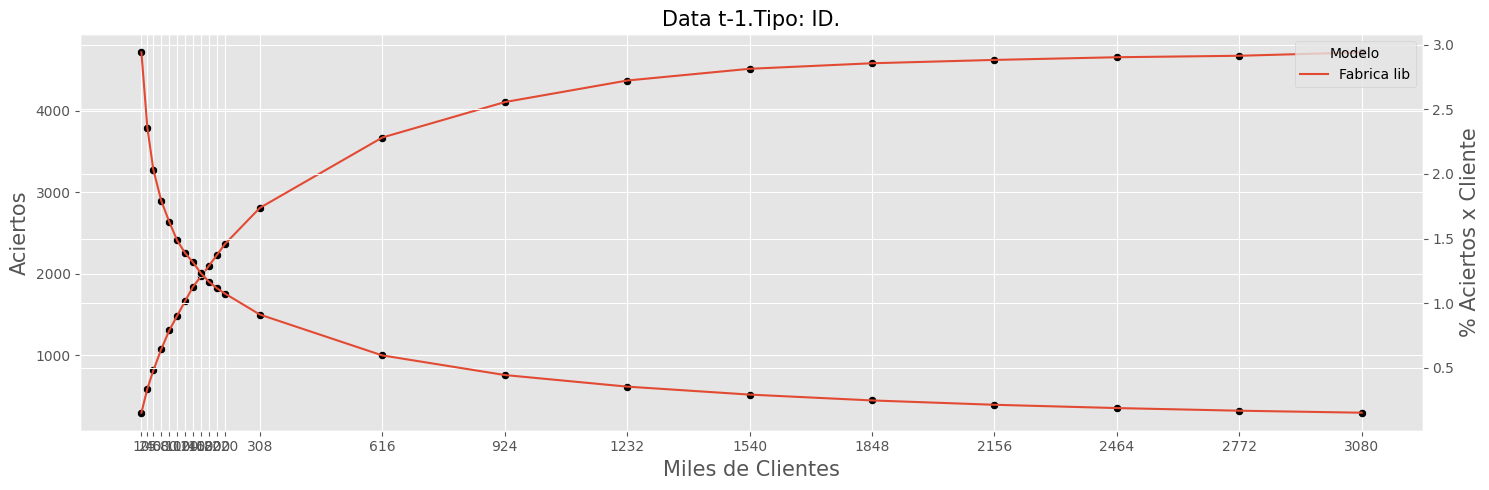

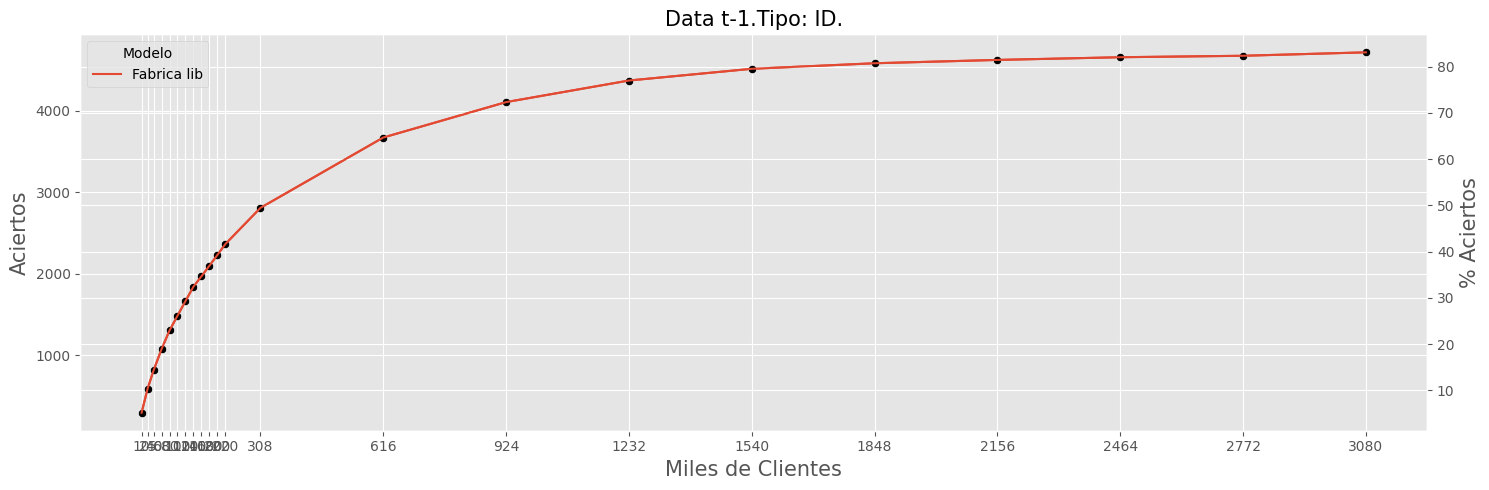

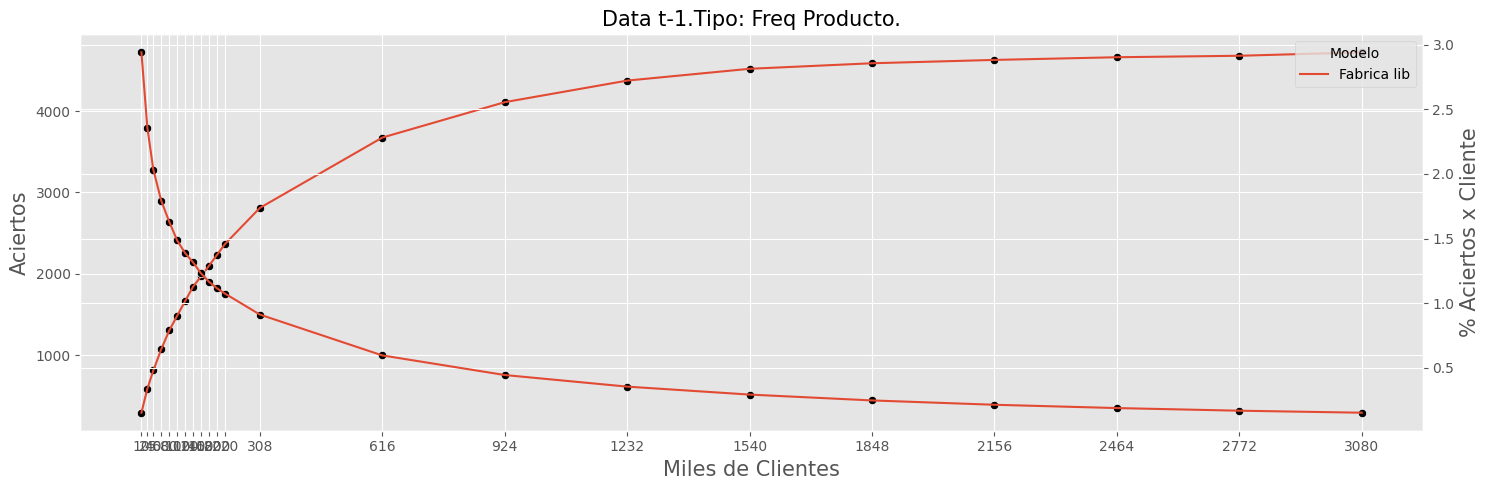

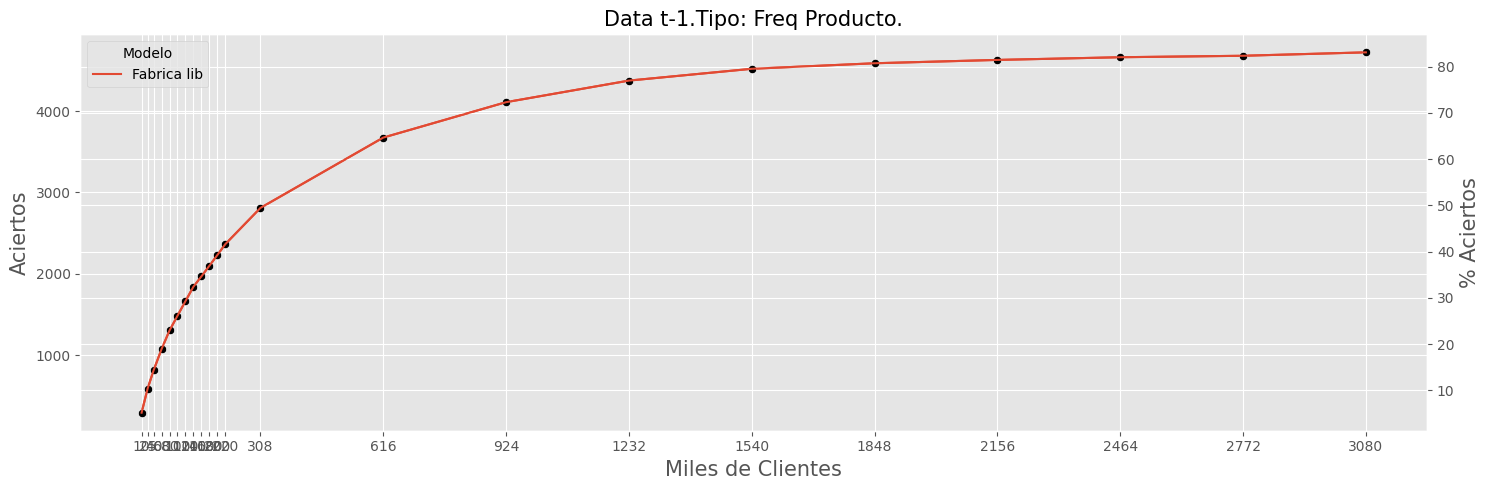

[01/21/25 14:12:40] INFO     ---------------------------------------------------                       ]8;id=690831;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=974712;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

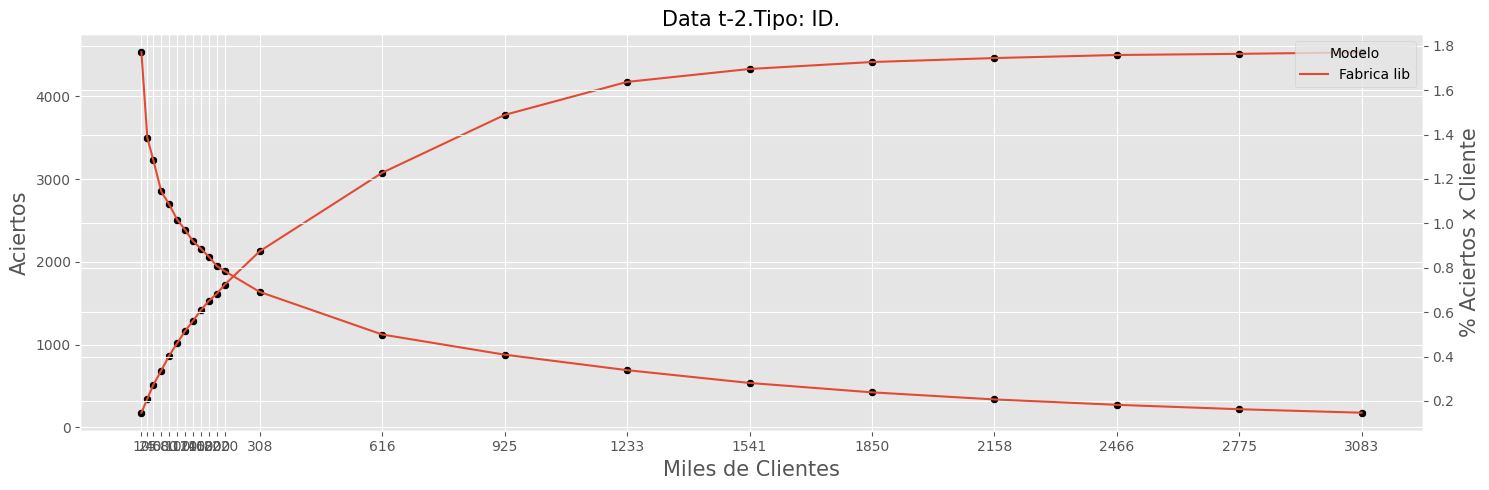

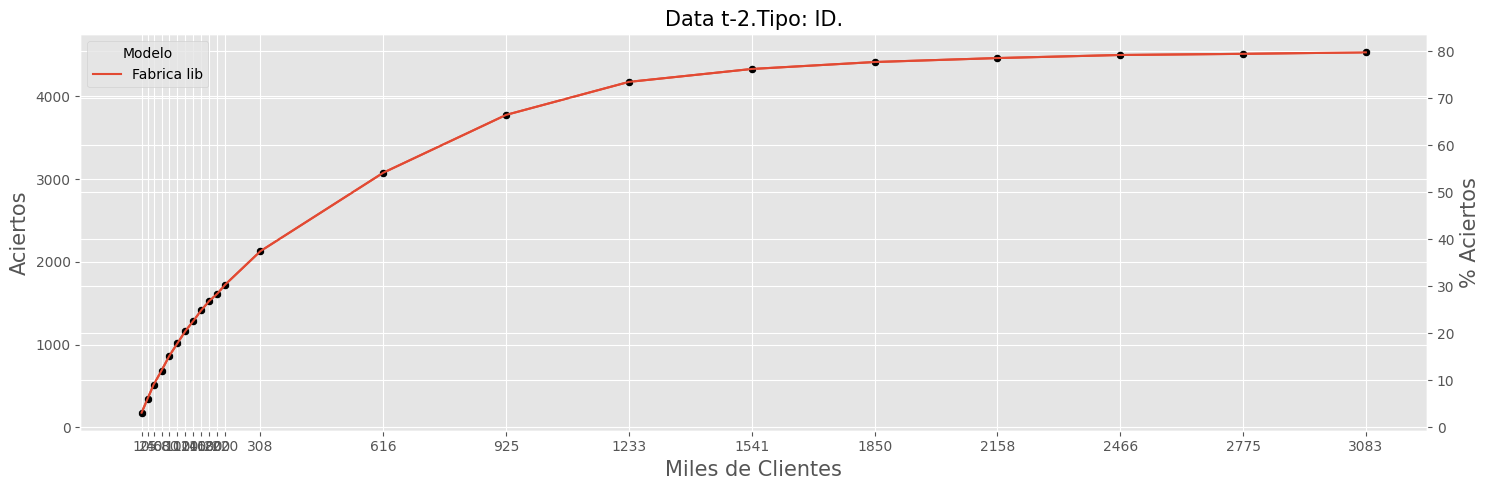

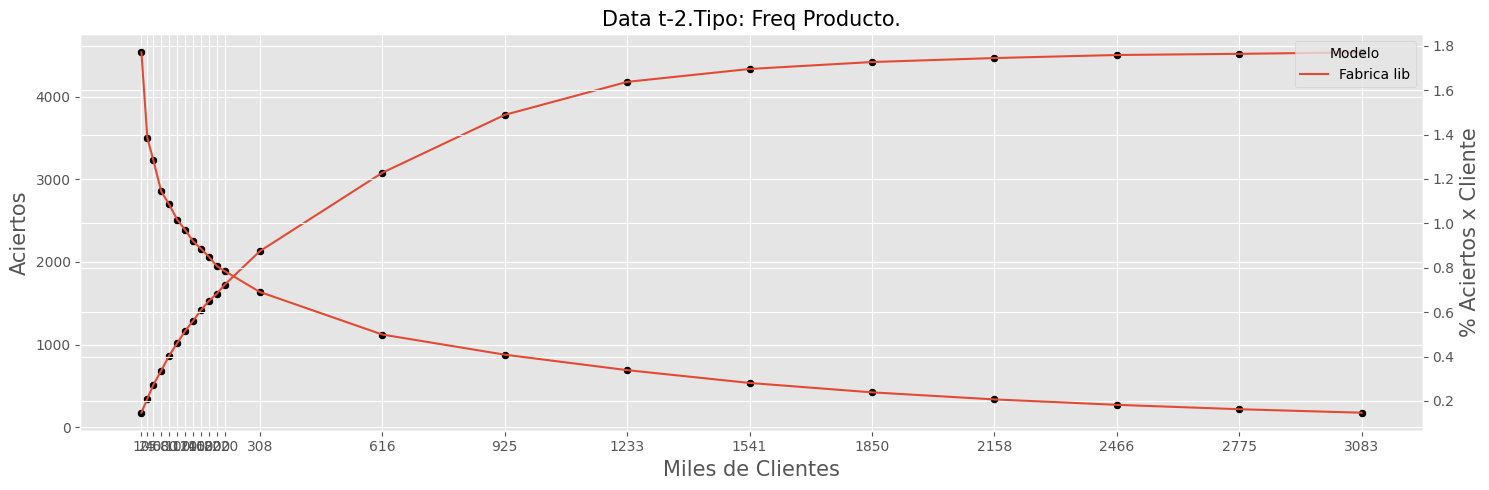

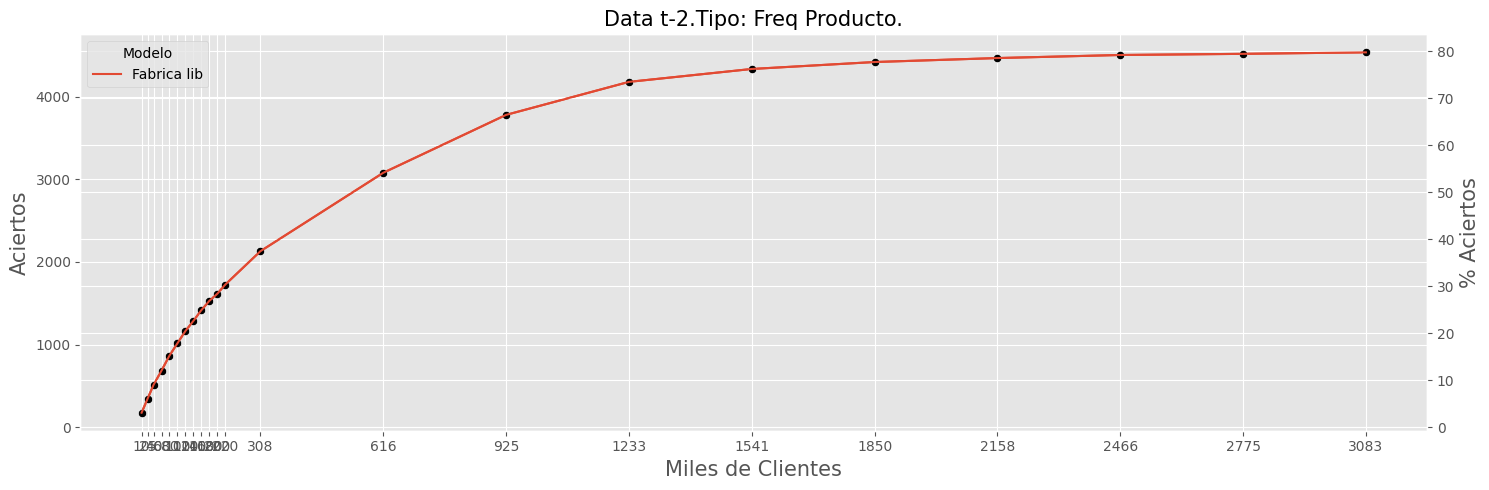

[01/21/25 14:12:42] INFO     ---------------------------------------------------                       ]8;id=628585;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=205399;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

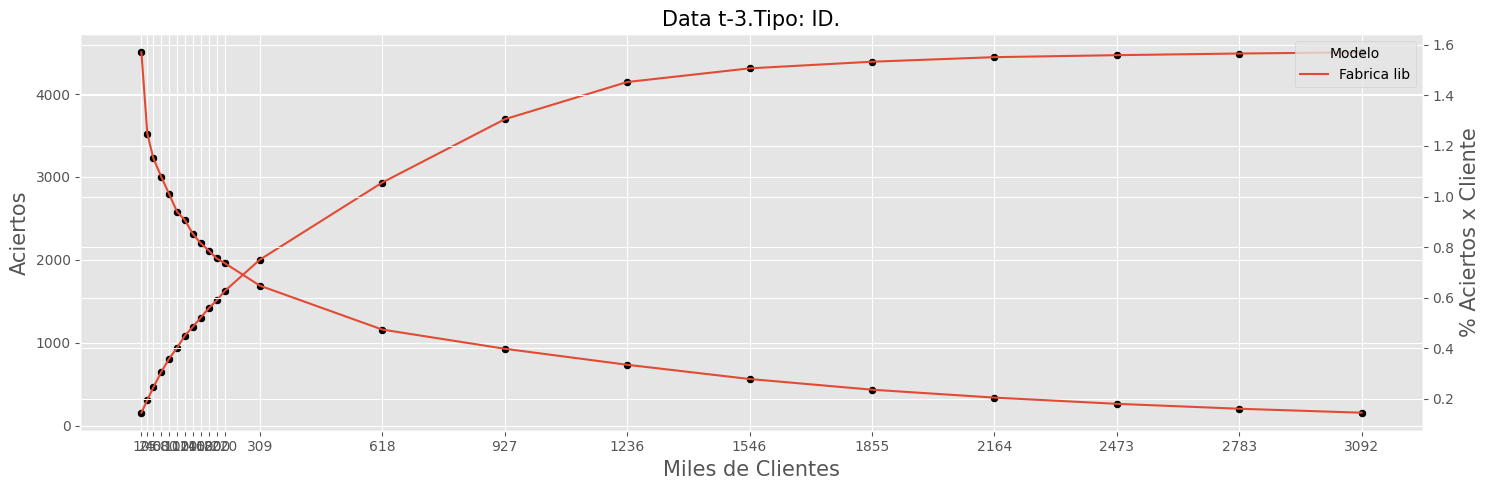

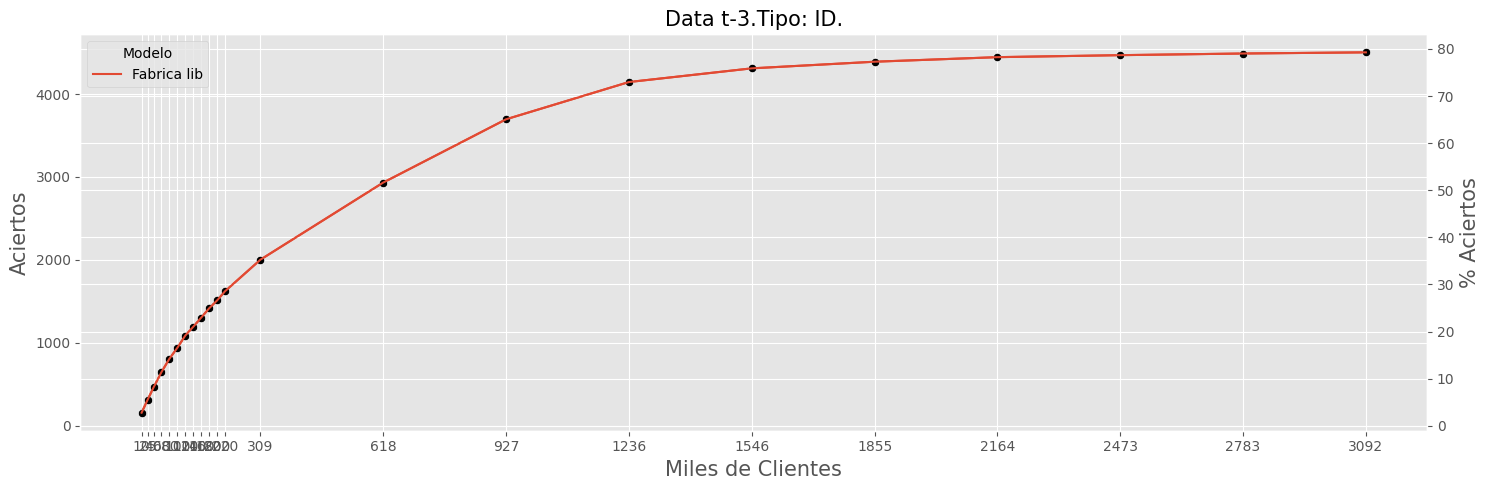

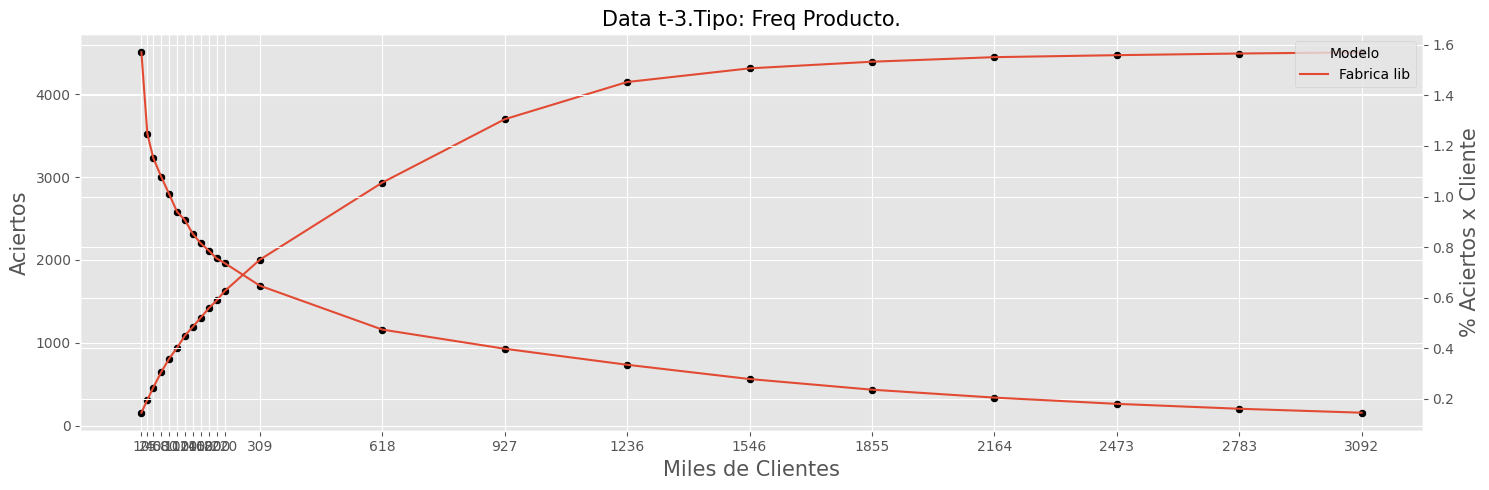

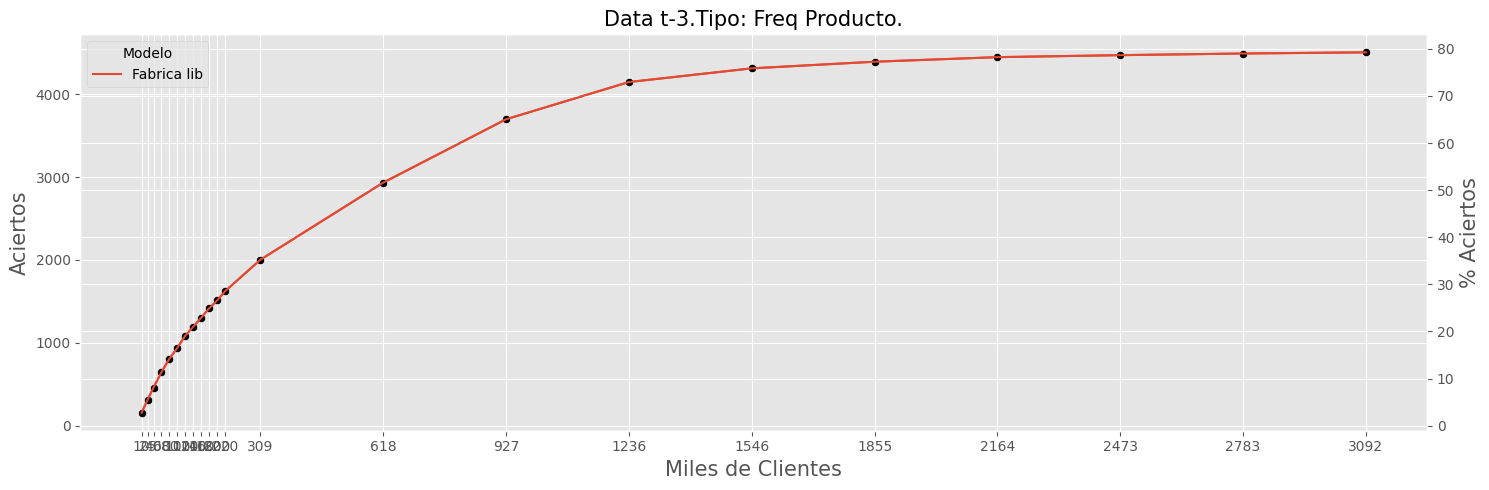

[01/21/25 14:12:43] INFO     ---------------------------------------------------                       ]8;id=288879;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=776055;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

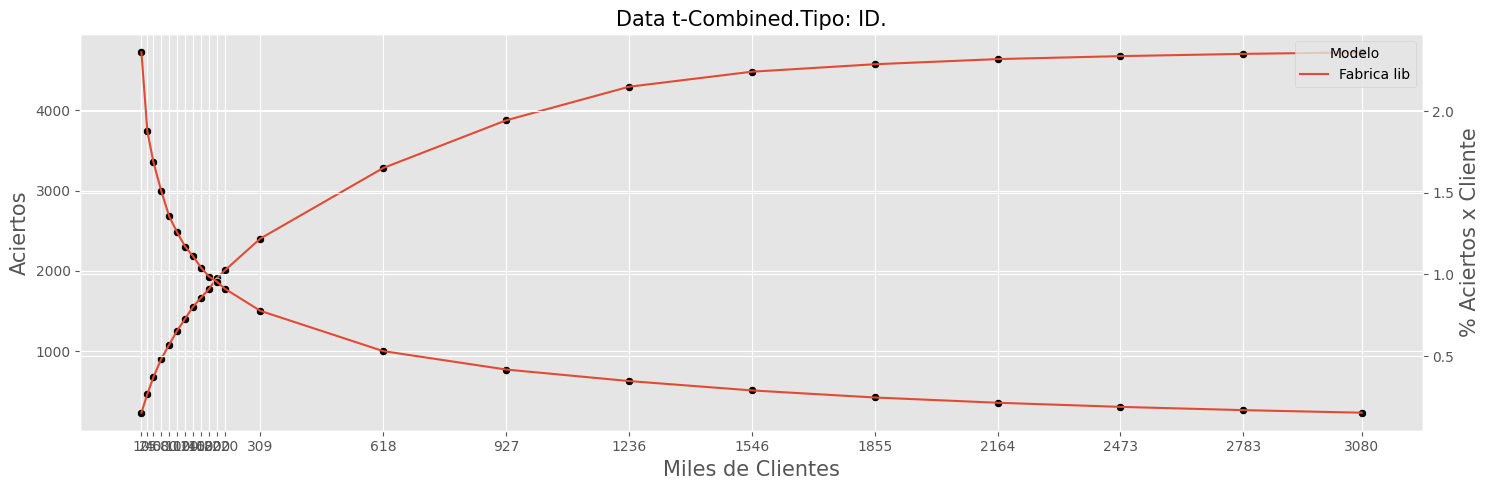

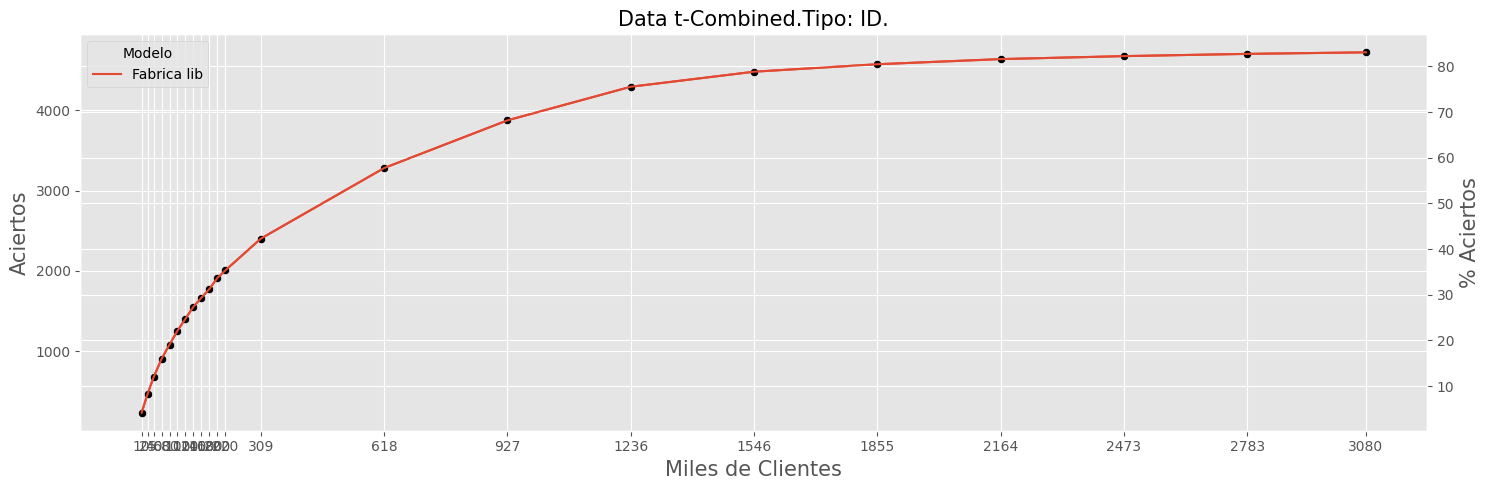

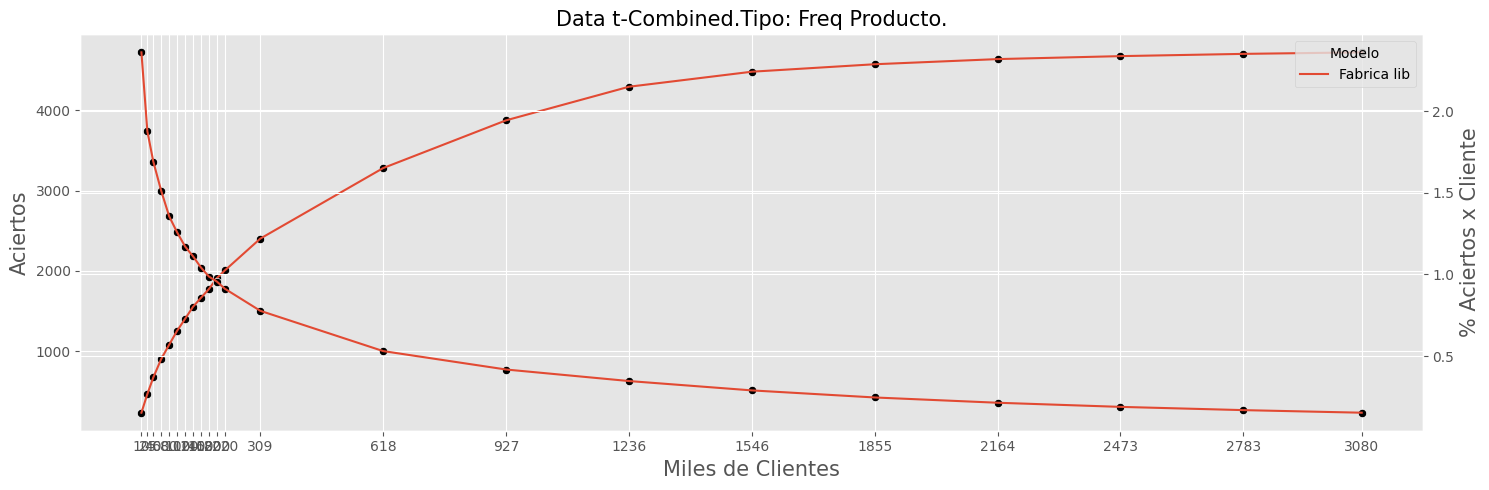

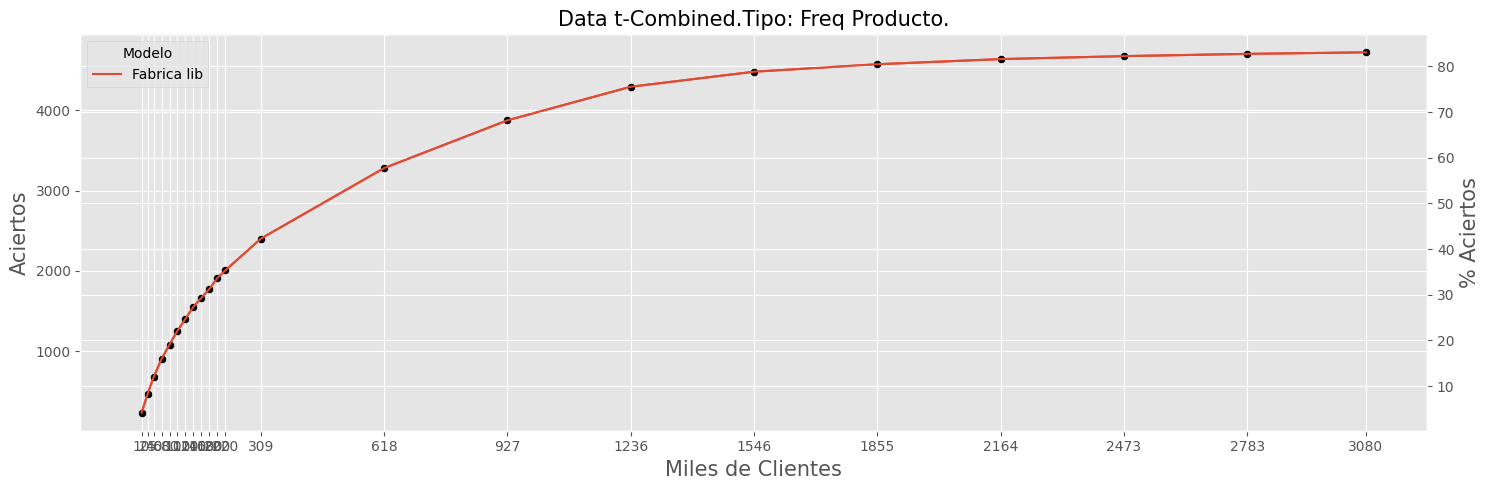

[01/21/25 14:12:45] INFO     ---------------------------------------------------                       ]8;id=457710;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=320241;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

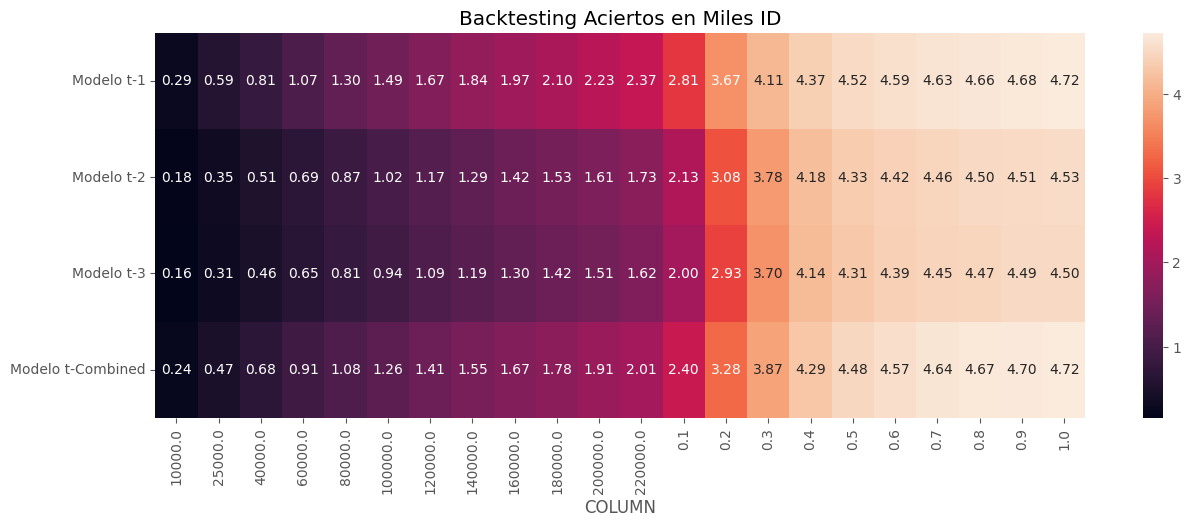

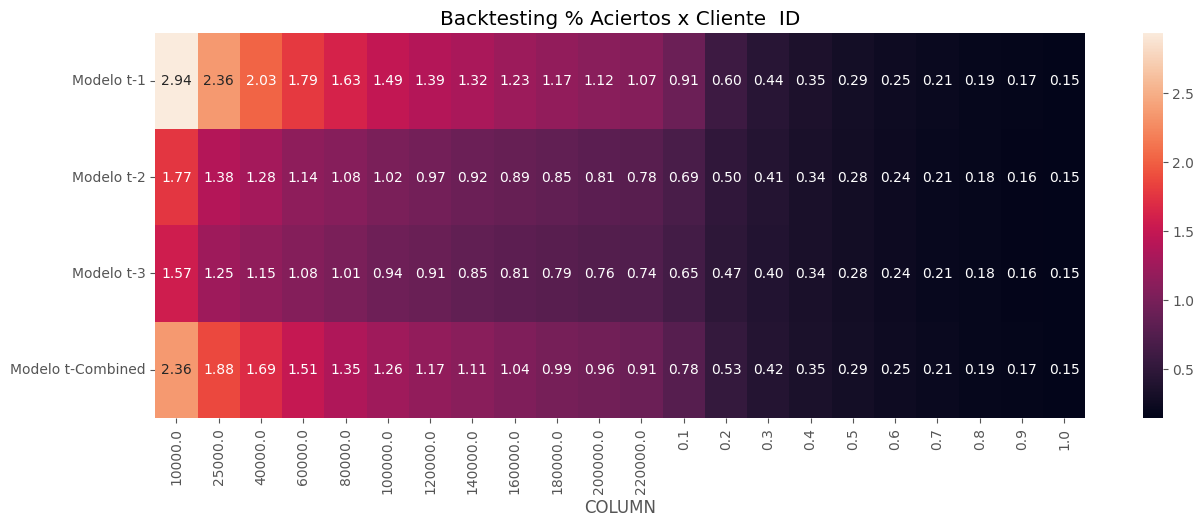

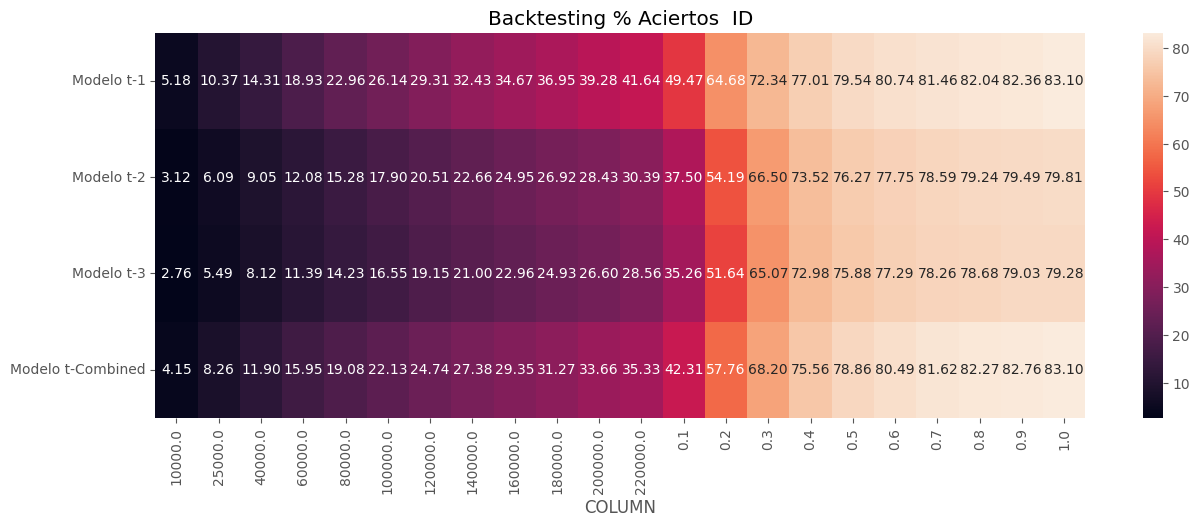

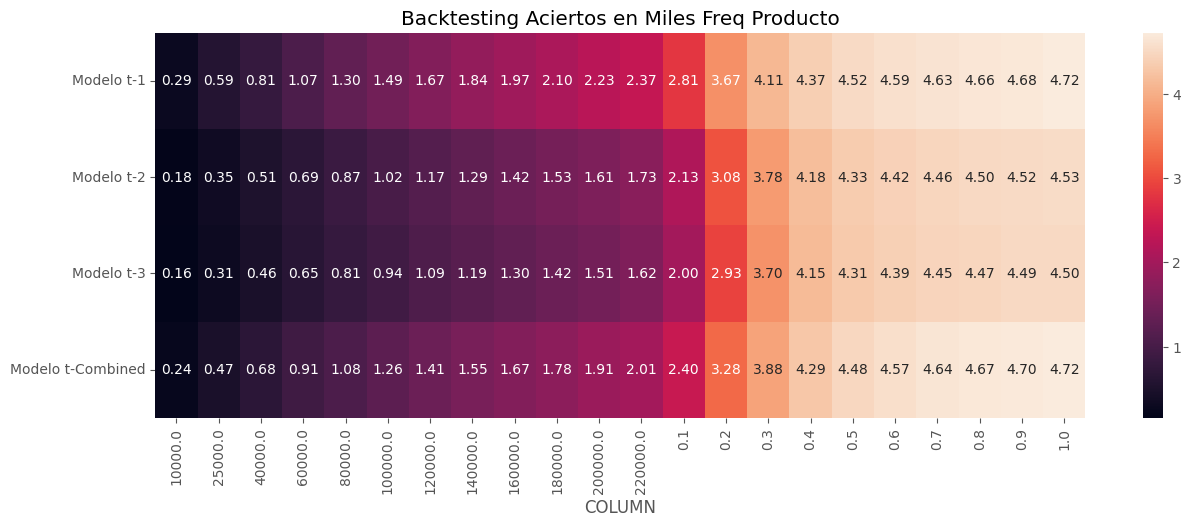

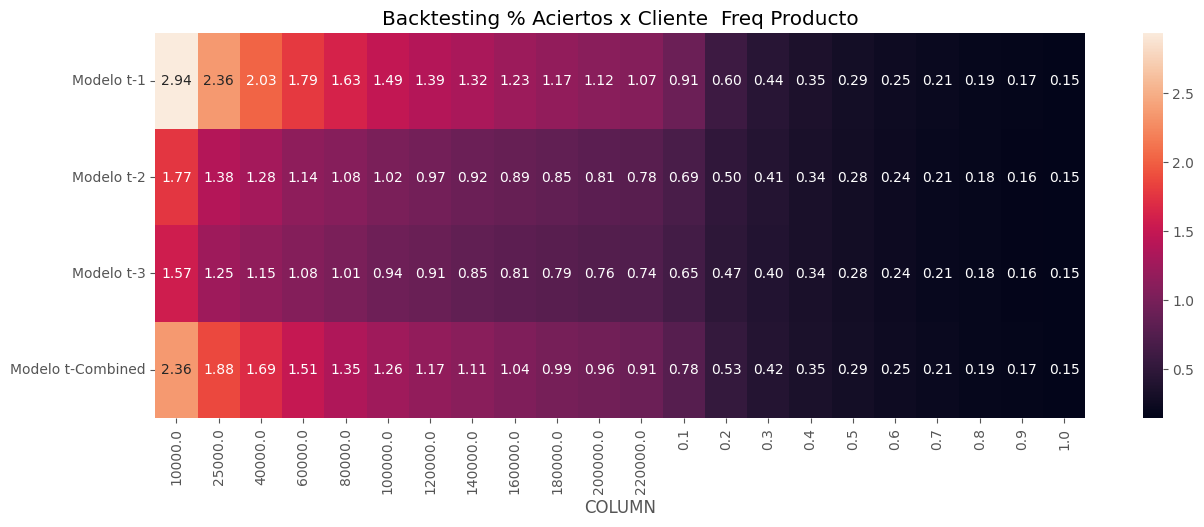

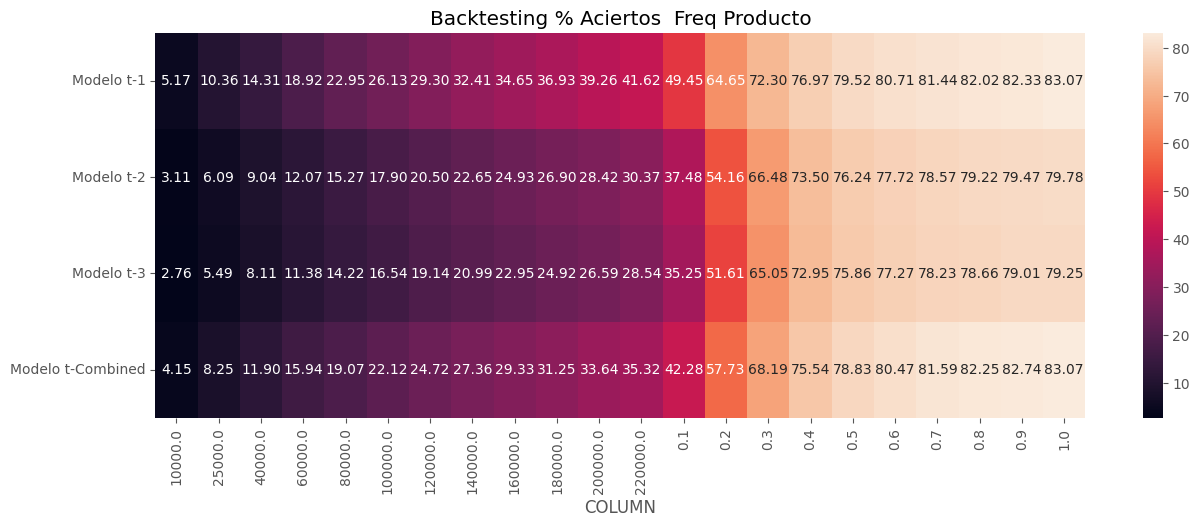

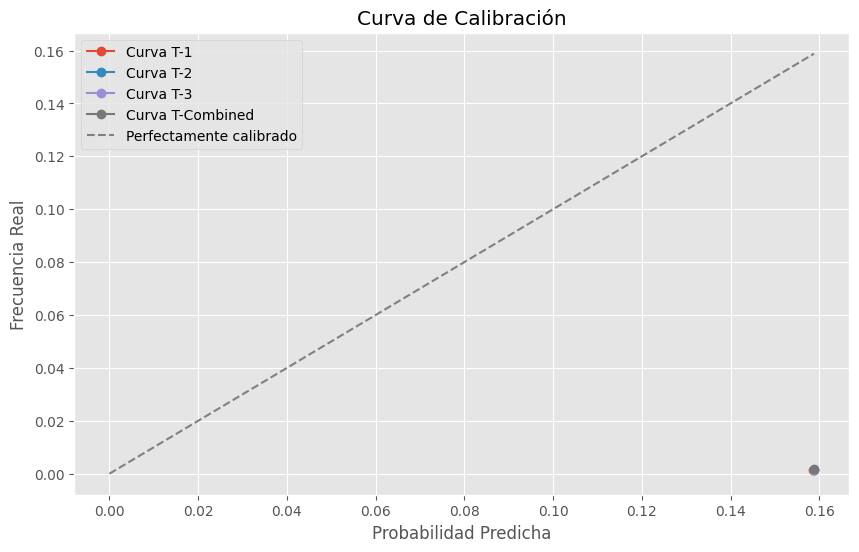

In [9]:
backtesting.plotear_curvas_rezago(save_backtesting, params)
plt.figure(figsize=(10, 6))
max_value = 0
for i in save_backtesting.keys():
    prob_true = save_backtesting[i]['prob_true']
    prob_pred = save_backtesting[i]['prob_pred']
    # Graficar la curva de calibración
    try:
        msg = str(int(i))
    except:
        msg = str(i)
    plt.plot(prob_pred, prob_true, marker='o', label='Curva'+" T-"+msg)
    max_value = np.max([max_value,np.max(prob_pred)])
plt.plot([0, max_value], [0, max_value], linestyle='--', color='gray', label='Perfectamente calibrado')
plt.title('Curva de Calibración')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia Real')
plt.legend()
plt.show()
# curva > 45 grados = subestimar
# curva < 45 grados = sobrestimar

In [10]:
wanted_metric = ['N all','N n_top','true_sum n_top','backtest_metric n_top','Precision n_top','recall n_top','f1-score n_top']
for i in save_backtesting.keys():
    print(i,'Top Metrics')
    res = save_backtesting[i]['metrics']
    display(res[(res["metric_name"].isin(wanted_metric))&(res["class_name"].isin(['1.0','1',1,1.0,'dim shape']))].drop('timestamp', axis=1))
    display(res[res["metric_name"].isin(['True negatives','True positives','False negatives','False positives'])])
    print('------------')

1 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202411                N n_top       n_top   
1        LIB  Ensamble,       202411                  N all   dim shape   
2        LIB  Ensamble,       202411  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202411        Precision n_top       n_top   
5        LIB  Ensamble,       202411           recall n_top       n_top   
7        LIB  Ensamble,       202411         f1-score n_top       n_top   
9        LIB  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   924263  
1  dim shape  3080879  
2        1.0   0.4447  
3          1   0.4447  
5          1    100.0  
7          1   0.8854  
9          1     4110

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-21 13:45        LIB  Ensamble,       202411   True positives   
19  2025-01-21 13:45        LIB  Ensamble,       202411  False negatives   
20  2025-01-21 13:45        LIB  Ensamble,       202411   True negatives   
21  2025-01-21 13:45        LIB  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall     4720.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2997697.0

------------
2 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202411                N n_top       n_top   
1        LIB  Ensamble,       202411                  N all   dim shape   
2        LIB  Ensamble,       202411  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202411        Precision n_top       n_top   
5        LIB  Ensamble,       202411           recall n_top       n_top   
7        LIB  Ensamble,       202411         f1-score n_top       n_top   
9        LIB  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   925038  
1  dim shape  3083460  
2        1.0   0.4098  
3          1   0.4098  
5          1    100.0  
7          1   0.8163  
9          1     3791

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-21 13:45        LIB  Ensamble,       202411   True positives   
19  2025-01-21 13:45        LIB  Ensamble,       202411  False negatives   
20  2025-01-21 13:45        LIB  Ensamble,       202411   True negatives   
21  2025-01-21 13:45        LIB  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall     4533.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2931130.0

------------
3 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202411                N n_top       n_top   
1        LIB  Ensamble,       202411                  N all   dim shape   
2        LIB  Ensamble,       202411  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202411        Precision n_top       n_top   
5        LIB  Ensamble,       202411           recall n_top       n_top   
7        LIB  Ensamble,       202411         f1-score n_top       n_top   
9        LIB  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   927688  
1  dim shape  3092295  
2        1.0   0.4013  
3          1   0.4013  
5          1    100.0  
7          1   0.7994  
9          1     3723

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-21 13:45        LIB  Ensamble,       202411   True positives   
19  2025-01-21 13:45        LIB  Ensamble,       202411  False negatives   
20  2025-01-21 13:45        LIB  Ensamble,       202411   True negatives   
21  2025-01-21 13:45        LIB  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall     4503.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2864619.0

------------
Combined Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202411                N n_top       n_top   
1        LIB  Ensamble,       202411                  N all   dim shape   
2        LIB  Ensamble,       202411  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202411        Precision n_top       n_top   
5        LIB  Ensamble,       202411           recall n_top       n_top   
7        LIB  Ensamble,       202411         f1-score n_top       n_top   
9        LIB  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   924264  
1  dim shape  3080880  
2        1.0   0.4201  
3          1   0.4201  
5          1    100.0  
7          1   0.8367  
9          1     3883

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-21 13:46        LIB  Ensamble,       202411   True positives   
19  2025-01-21 13:46        LIB  Ensamble,       202411  False negatives   
20  2025-01-21 13:46        LIB  Ensamble,       202411   True negatives   
21  2025-01-21 13:46        LIB  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall     4720.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2867869.0

------------


In [11]:
for i in save_backtesting.keys():
    print(i)
    res = save_backtesting[i]['ks']
    display(res)

1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     15.89     15.90          307891             2809            0.91   
1      9     15.88     15.89          308270              865            0.28   
2      8     15.88     15.88          308098              435            0.14   
3      7     15.88     15.88          308081              265            0.09   
4      6     15.87     15.88          308098              144            0.05   
5      5     15.86     15.87          308084               68            0.02   
6      4     15.85     15.86          308090               41            0.01   
7      3     15.84     15.85          308082               33            0.01   
8      2     15.82     15.84          308095               18            0.01   
9      1     13.44     15.82          308090               42            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          59.51                9.99    49.52  
1          77.84               20.00    57.84  
2          87.06               30.00    57.06  
3          92.67               40.00    52.67  
4          95.72               50.00    45.72  
5          97.16               60.00    37.16  
6          98.03               70.00    28.03  
7          98.73               80.00    18.73  
8          99.11               90.00     9.11  
9         100.00              100.00     0.00

2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     15.89     15.90          308302             2130            0.69   
1      9     15.89     15.89          308346              948            0.31   
2      8     15.89     15.89          308364              699            0.23   
3      7     15.88     15.89          308353              399            0.13   
4      6     15.88     15.88          308347              156            0.05   
5      5     15.87     15.88          308363               84            0.03   
6      4     15.87     15.87          308330               48            0.02   
7      3     15.86     15.87          308361               37            0.01   
8      2     15.85     15.86          308344               14            0.00   
9      1     14.08     15.85          308350               18            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          46.99                10.0    36.99  
1          67.90                20.0    47.90  
2          83.32                30.0    53.32  
3          92.12                40.0    52.13  
4          95.57                50.0    45.57  
5          97.42                60.0    37.42  
6          98.48                70.0    28.48  
7          99.29                80.0    19.29  
8          99.60                90.0     9.60  
9         100.00               100.0     0.00

3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     15.89     15.90          309212             2003            0.65   
1      9     15.89     15.89          309237              930            0.30   
2      8     15.89     15.89          309237              763            0.25   
3      7     15.88     15.89          309210              449            0.15   
4      6     15.88     15.88          309240              165            0.05   
5      5     15.87     15.88          309219               80            0.03   
6      4     15.87     15.87          309242               55            0.02   
7      3     15.86     15.87          309235               24            0.01   
8      2     15.85     15.86          309233               20            0.01   
9      1     14.67     15.85          309230               14            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          44.48                10.0    34.48  
1          65.13                20.0    45.13  
2          82.08                30.0    52.08  
3          92.05                40.0    52.05  
4          95.71                50.0    45.71  
5          97.49                60.0    37.49  
6          98.71                70.0    28.71  
7          99.24                80.0    19.25  
8          99.69                90.0     9.69  
9         100.00               100.0     0.00

Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     15.89     15.90          308008             2399            0.78   
1      9     15.89     15.89          308160              875            0.28   
2      8     15.89     15.89          308045              593            0.19   
3      7     15.88     15.89          308137              420            0.14   
4      6     15.88     15.88          308089              186            0.06   
5      5     15.88     15.88          308082               98            0.03   
6      4     15.87     15.88          308071               63            0.02   
7      3     15.87     15.87          308103               39            0.01   
8      2     15.86     15.87          308078               28            0.01   
9      1     15.84     15.86          308107               19            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          50.83                10.0    40.83  
1          69.36                20.0    49.36  
2          81.93                30.0    51.93  
3          90.83                40.0    50.83  
4          94.77                50.0    44.77  
5          96.84                60.0    36.84  
6          98.18                70.0    28.18  
7          99.00                80.0    19.00  
8          99.60                90.0     9.60  
9         100.00               100.0     0.00

## Comparar backtesting

In [8]:
catalog.load('homologate_region_model')

[01/24/25 19:28:42] INFO     Loading data from 'homologate_region_model' (PickleDataSet)...     ]8;id=489073;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=439392;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\


{
    'variable1': {
        'nombre': 'region',
        'insumo': 'departamento',
        'fillna': 'Other_Region',
        'modo_homologacion': {
            'amazonas': 'Region_Amazonica',
            'antioquia': 'Region_Andina',
            'arauca': 'Region_Orinoquia',
            'archipielago_de_san_andres_providencia_y': 'Region_Caribe',
            'atlantico': 'Region_Caribe',
            'bogota_d_c': 'Region_Central',
            'bogota_d_c_': 'Region_Central',
            'bolivar': 'Region_Caribe',
            'boyaca': 'Region_Andina',
            'caldas': 'Region_Andina',
            'caqueta': 'Region_Amazonica',
            'casanare': 'Region_Orinoquia',
            'cauca': 'Region_Pacifica',
            'cesar': 'Region_Caribe',
            'choco': 'Region_Pacifica',
            'cordoba': 'Region_Caribe',
            'cundinamarca': 'Region_Andina',
            'guainia': 'Region_Amazonica',
            'guaviare': 'Region_Amazonica',
            'huila': 'Re

In [9]:
data_backtesting1 = catalog.load("data_backtesting_202410_experimento1")
data_backtesting11 = catalog.load("data_backtesting_202410_experimento2")
data_backtesting111 = catalog.load("data_backtesting_202410_anterior")

data_backtesting2 = catalog.load("data_backtesting_202411_experimento1")
data_backtesting22 = catalog.load("data_backtesting_202411_experimento2")
data_backtesting222 = catalog.load("data_backtesting_202411_anterior")

[01/24/25 19:28:50] INFO     Loading data from 'data_backtesting_202410_experimento1'           ]8;id=286689;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=577480;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PickleDataSet)...                                                                    

[01/24/25 19:30:46] INFO     Loading data from 'data_backtesting_202410_experimento2'           ]8;id=57450;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=530154;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PickleDataSet)...                                                                    

[01/24/25 19:32:33] INFO     Loading data from 'data_backtesting_202410_anterior'               ]8;id=320315;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=116165;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PickleDataSet)...                                                                    

[01/24/25 19:34:46] INFO     Loading data from 'data_backtesting_202411_experimento1'           ]8;id=283883;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=792190;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PickleDataSet)...                                                                    

[01/24/25 19:37:30] INFO     Loading data from 'data_backtesting_202411_experimento2'           ]8;id=214198;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=884661;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PickleDataSet)...                                                                    

[01/24/25 19:40:00] INFO     Loading data from 'data_backtesting_202411_anterior'               ]8;id=518496;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=61444;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\
                             (PickleDataSet)...                                                                    

In [10]:
nametag_model = ['202410 exp1','202410 exp2','202410_MVP4','202411 exp1','202411 exp2','202411_MVP4']
backtesting_all = [data_backtesting1,data_backtesting11,data_backtesting111,data_backtesting2,data_backtesting22,data_backtesting222]
# nametag_model = ['202410','202411']
# backtesting_all = [data_backtesting1,data_backtesting2]

dict_keys(['ID', 'Freq Producto'])


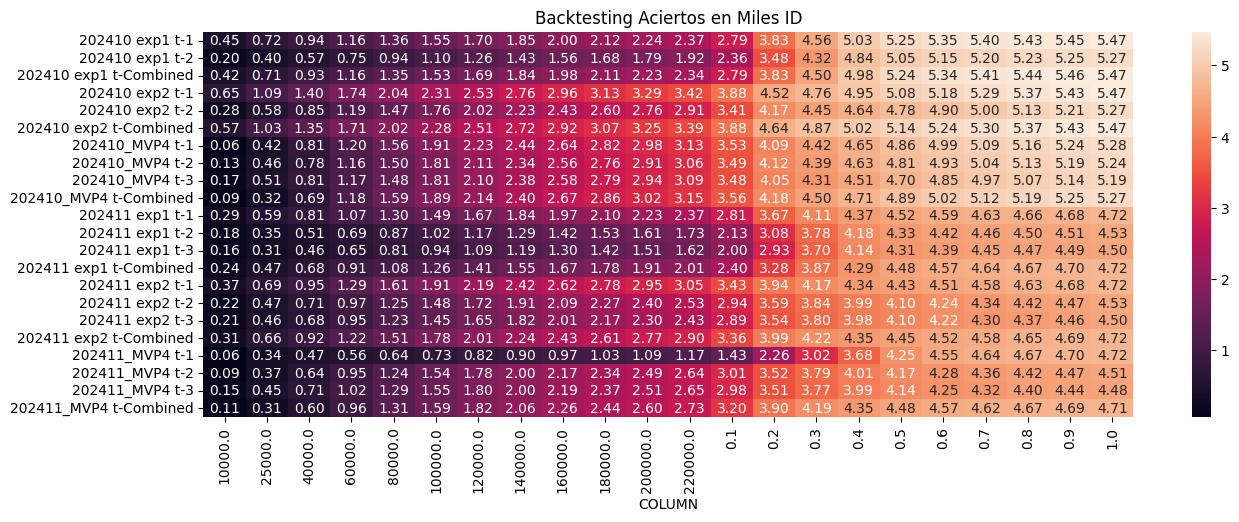

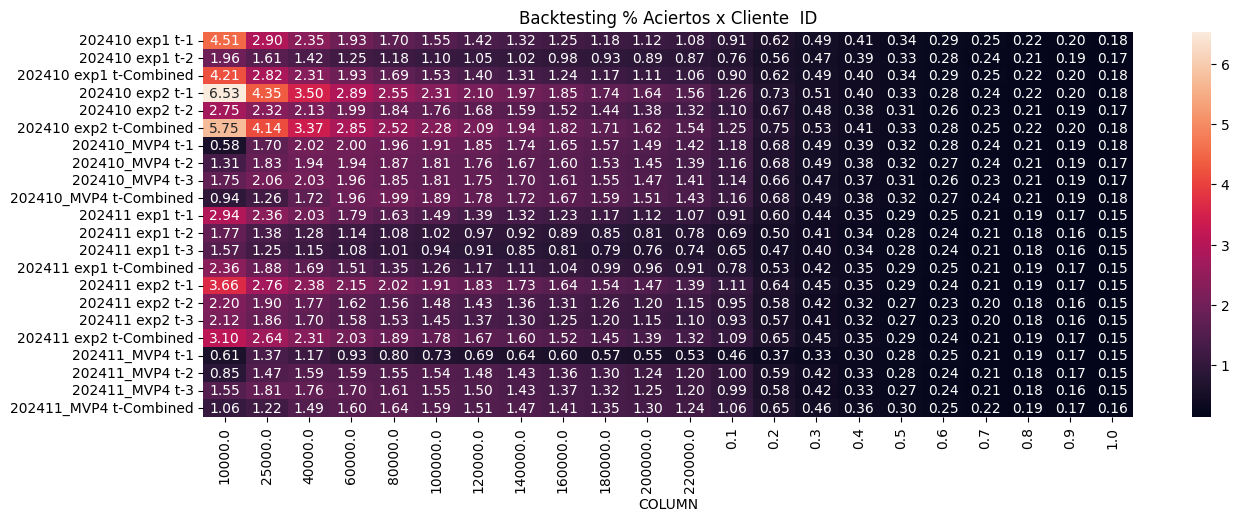

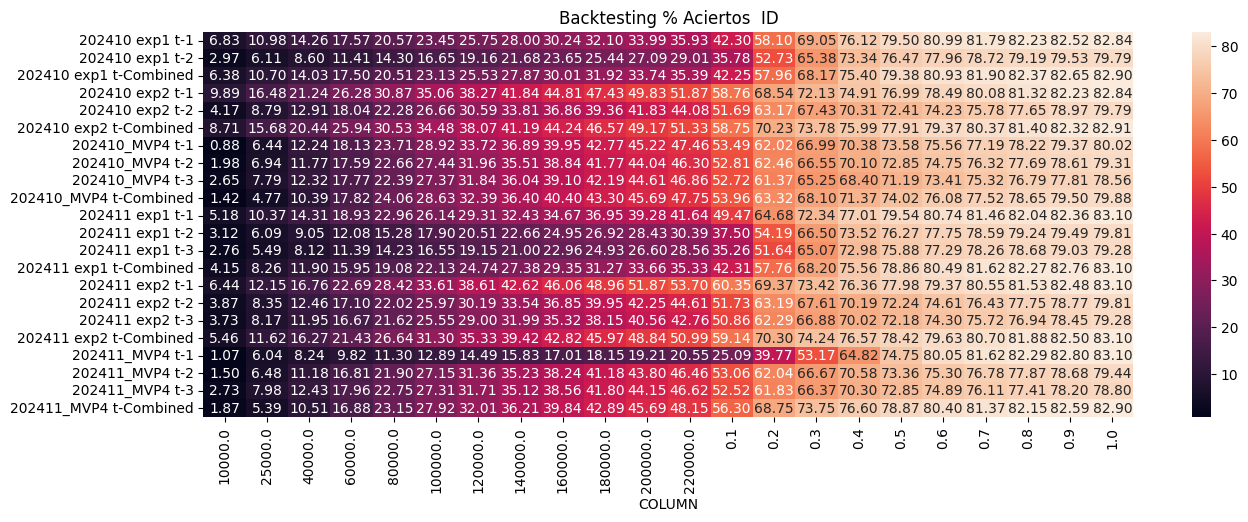

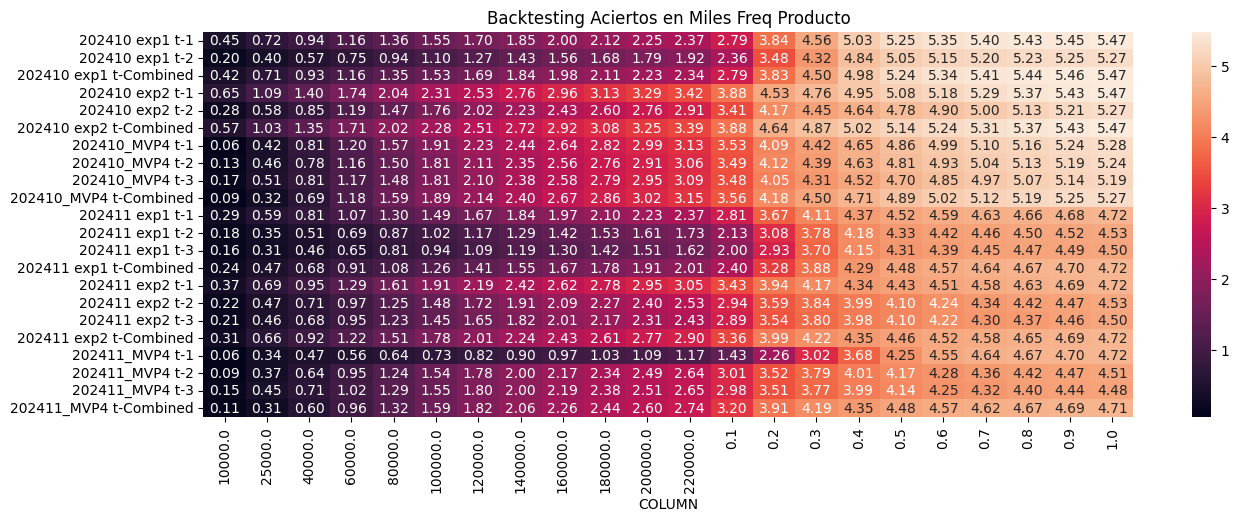

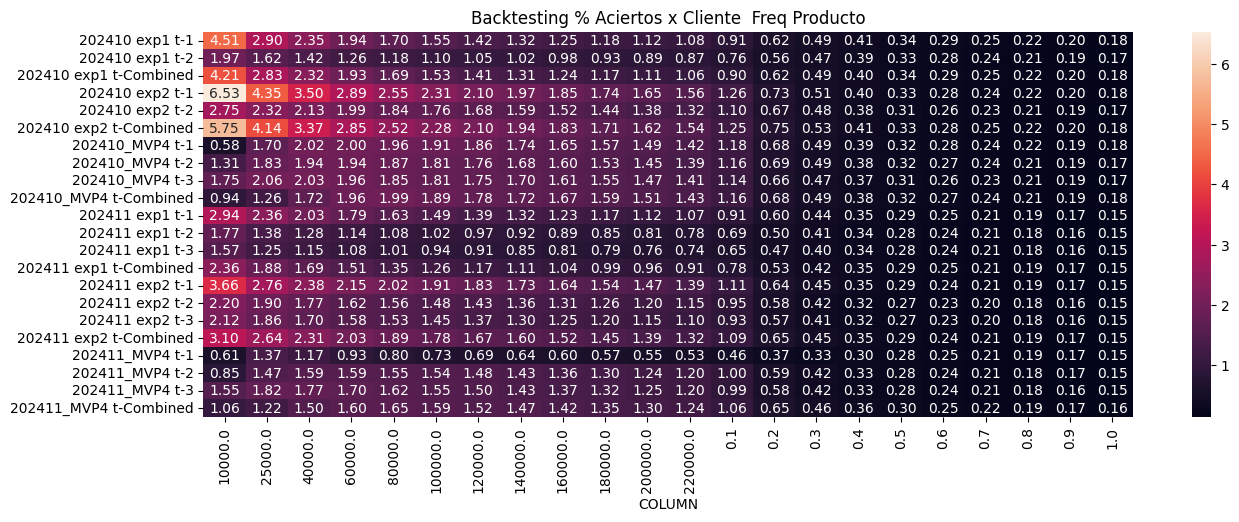

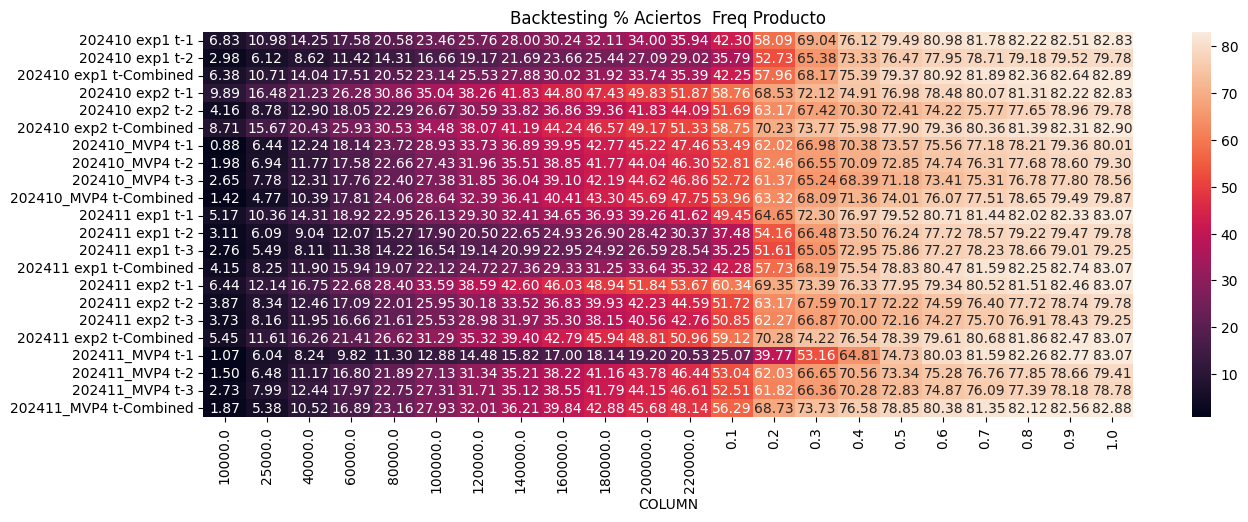

In [11]:
consolidacion_tipo = {}
for t,save_backtesting in enumerate(backtesting_all):
    for i in save_backtesting.keys():
        name = nametag_model[t]+' t-'+str(i)
        df_i = save_backtesting[i]['contactabilidad_curva']#.keys()
        df_i = df_i[~df_i['Aciertos'].isnull()]
        df_i = df_i.replace('Fabrica '+params['target'].split('_')[0],name)
        df_i = df_i[df_i['Modelo'] == name]
        for tipo in df_i['Tipo'].unique():
            df_ii = df_i[df_i['Tipo'] == tipo]
            df_ii = df_ii.set_index('COLUMN')
            if tipo not in consolidacion_tipo:
                consolidacion_tipo[tipo] = {'Aciertos': pd.DataFrame(),'% Aciertos x Cliente':pd.DataFrame(),'% Aciertos': pd.DataFrame()}
            for col in ['Aciertos','% Aciertos x Cliente','% Aciertos']:
                consolidacion_tipo[tipo][col] = pd.concat([consolidacion_tipo[tipo][col],df_ii[[col]].rename(columns = {col:name})], axis = 1)
print(consolidacion_tipo.keys())
import seaborn as sns
for col in list(consolidacion_tipo.keys()):
    for tipo in ['Aciertos','% Aciertos x Cliente','% Aciertos']:
        if tipo == 'Aciertos':
            graph = consolidacion_tipo[col][tipo].T/1000
            msj = f'Backtesting {tipo} en Miles {col}'
        else:
            graph = consolidacion_tipo[col][tipo].T
            msj = f'Backtesting {tipo}  {col}'
        plt.figure(figsize=(15,5))
        sns.heatmap(graph, annot = True, fmt= '0.02f')
        plt.title(msj)
        plt.show()

In [14]:
for t,save_backtesting in enumerate(backtesting_all):
    for i in save_backtesting.keys():
        name = nametag_model[t]+' t-'+str(i)
        print(name)
        res = save_backtesting[i]['ks']
        display(res)

202410 exp1 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     15.89     15.90          308302             2792            0.91   
1      9     15.89     15.89          308346             1042            0.34   
2      8     15.89     15.89          308364              724            0.23   
3      7     15.88     15.89          308353              467            0.15   
4      6     15.88     15.88          308347              223            0.07   
5      5     15.87     15.88          308363               98            0.03   
6      4     15.87     15.87          308330               53            0.02   
7      3     15.86     15.87          308361               29            0.01   
8      2     15.85     15.86          308344               19            0.01   
9      1     14.08     15.85          308350               21            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          51.06                10.0    41.06  
1          70.12                20.0    50.12  
2          83.36                30.0    53.36  
3          91.90                40.0    51.90  
4          95.98                50.0    45.98  
5          97.77                60.0    37.77  
6          98.74                70.0    28.74  
7          99.27                80.0    19.27  
8          99.62                90.0     9.62  
9         100.00               100.0     0.00

202410 exp1 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     15.89     15.90          309212             2362            0.76   
1      9     15.89     15.89          309237             1118            0.36   
2      8     15.89     15.89          309237              836            0.27   
3      7     15.88     15.89          309210              525            0.17   
4      6     15.88     15.88          309240              207            0.07   
5      5     15.87     15.88          309219               98            0.03   
6      4     15.87     15.87          309242               50            0.02   
7      3     15.86     15.87          309235               31            0.01   
8      2     15.85     15.86          309233               23            0.01   
9      1     14.67     15.85          309230               17            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          44.85                10.0    34.85  
1          66.07                20.0    46.07  
2          81.94                30.0    51.94  
3          91.91                40.0    51.91  
4          95.84                50.0    45.84  
5          97.70                60.0    37.70  
6          98.65                70.0    28.65  
7          99.24                80.0    19.24  
8          99.68                90.0     9.68  
9         100.00               100.0     0.00

202410 exp1 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     15.89     15.90          308309             2784            0.90   
1      9     15.89     15.89          308347             1035            0.34   
2      8     15.89     15.89          308382              680            0.22   
3      7     15.88     15.89          308335              476            0.15   
4      6     15.88     15.88          308343              263            0.09   
5      5     15.88     15.88          308356              103            0.03   
6      4     15.87     15.88          308349               64            0.02   
7      3     15.87     15.87          308345               32            0.01   
8      2     15.86     15.87          308347               18            0.01   
9      1     15.83     15.86          308348               17            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          50.88                10.0    40.88  
1          69.79                20.0    49.79  
2          82.22                30.0    52.22  
3          90.92                40.0    50.92  
4          95.72                50.0    45.72  
5          97.61                60.0    37.61  
6          98.78                70.0    28.78  
7          99.36                80.0    19.36  
8          99.69                90.0     9.69  
9         100.00               100.0     0.00

202410 exp2 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     15.85     15.86          308343             3879            1.26   
1      9     15.85     15.85          308349              645            0.21   
2      8     15.84     15.85          308340              237            0.08   
3      7     15.83     15.84          308350              184            0.06   
4      6     15.81     15.83          308348              137            0.04   
5      5     15.78     15.81          308346               99            0.03   
6      4     15.71     15.78          308346              105            0.03   
7      3     15.52     15.71          308346               82            0.03   
8      2     14.66     15.52          308346               60            0.02   
9      1      6.31     14.66          308346               40            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          70.94                10.0    60.94  
1          82.74                20.0    62.74  
2          87.07                30.0    57.07  
3          90.44                40.0    50.44  
4          92.94                50.0    42.94  
5          94.75                60.0    34.75  
6          96.67                70.0    26.67  
7          98.17                80.0    18.17  
8          99.27                90.0     9.27  
9         100.00               100.0     0.00

202410 exp2 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     15.85     15.86          309230             3412            1.10   
1      9     15.85     15.85          309227              758            0.25   
2      8     15.84     15.85          309223              281            0.09   
3      7     15.83     15.84          309229              190            0.06   
4      6     15.81     15.83          309233              139            0.04   
5      5     15.78     15.81          309234              120            0.04   
6      4     15.72     15.78          309225              102            0.03   
7      3     15.56     15.72          309235              124            0.04   
8      2     14.84     15.56          309229               87            0.03   
9      1      7.32     14.84          309230               54            0.02   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          64.78                10.0    54.78  
1          79.17                20.0    59.17  
2          84.51                30.0    54.51  
3          88.11                40.0    48.11  
4          90.75                50.0    40.75  
5          93.03                60.0    33.03  
6          94.97                70.0    24.97  
7          97.32                80.0    17.32  
8          98.97                90.0     8.97  
9         100.00               100.0     0.00

202410 exp2 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     15.86     15.86          308336             3874            1.26   
1      9     15.85     15.86          308336              759            0.25   
2      8     15.85     15.85          308366              232            0.08   
3      7     15.84     15.85          308336              149            0.05   
4      6     15.83     15.84          308356              129            0.04   
5      5     15.81     15.83          308345               96            0.03   
6      4     15.79     15.81          308347               64            0.02   
7      3     15.72     15.79          308346               68            0.02   
8      2     15.50     15.72          308346               63            0.02   
9      1     11.29     15.50          308347               39            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          70.78                10.0    60.78  
1          84.65                20.0    64.65  
2          88.89                30.0    58.89  
3          91.61                40.0    51.61  
4          93.97                50.0    43.97  
5          95.72                60.0    35.72  
6          96.89                70.0    26.89  
7          98.14                80.0    18.14  
8          99.29                90.0     9.29  
9         100.00               100.0     0.00

202410_MVP4 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.27     15.56          300137             3531            1.18   
1      9      0.10      0.27          300136              563            0.19   
2      8      0.06      0.10          300136              328            0.11   
3      7      0.05      0.06          300137              224            0.07   
4      6      0.04      0.05          300136              211            0.07   
5      5      0.03      0.04          300136              131            0.04   
6      4      0.02      0.03          300137              107            0.04   
7      3      0.02      0.02          300136               68            0.02   
8      2      0.01      0.02          300136               76            0.03   
9      1      0.00      0.01          300137               43            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          66.85                10.0    56.85  
1          77.51                20.0    57.51  
2          83.72                30.0    53.72  
3          87.96                40.0    47.96  
4          91.95                50.0    41.95  
5          94.43                60.0    34.43  
6          96.46                70.0    26.46  
7          97.75                80.0    17.75  
8          99.19                90.0     9.19  
9         100.00               100.0     0.00

202410_MVP4 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.27     15.56          301027             3486            1.16   
1      9      0.10      0.27          301026              637            0.21   
2      8      0.06      0.10          301026              270            0.09   
3      7      0.05      0.06          301026              234            0.08   
4      6      0.04      0.05          301026              182            0.06   
5      5      0.03      0.04          301026              125            0.04   
6      4      0.02      0.03          301024              104            0.03   
7      3      0.02      0.02          301028               90            0.03   
8      2      0.01      0.02          301026               61            0.02   
9      1      0.00      0.01          301027               46            0.02   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          66.59                10.0    56.59  
1          78.76                20.0    58.76  
2          83.92                30.0    53.92  
3          88.39                40.0    48.39  
4          91.86                50.0    41.86  
5          94.25                60.0    34.25  
6          96.24                70.0    26.24  
7          97.96                80.0    17.96  
8          99.12                90.0     9.12  
9         100.00               100.0     0.00

202410_MVP4 t-3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.30     15.56          306616             3480            1.13   
1      9      0.12      0.30          306616              571            0.19   
2      8      0.07      0.12          306616              256            0.08   
3      7      0.05      0.07          306615              208            0.07   
4      6      0.04      0.05          306616              184            0.06   
5      5      0.03      0.04          306616              147            0.05   
6      4      0.02      0.03          306615              126            0.04   
7      3      0.02      0.02          306616               97            0.03   
8      2      0.01      0.02          306616               67            0.02   
9      1      0.00      0.01          306616               50            0.02   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          67.10                10.0    57.10  
1          78.11                20.0    58.11  
2          83.05                30.0    53.05  
3          87.06                40.0    47.06  
4          90.61                50.0    40.61  
5          93.44                60.0    33.44  
6          95.87                70.0    25.87  
7          97.74                80.0    17.74  
8          99.04                90.0     9.04  
9         100.00               100.0     0.00

202410_MVP4 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.41     15.56          295926             3526            1.19   
1      9      0.17      0.41          295925              631            0.21   
2      8      0.10      0.17          295925              311            0.11   
3      7      0.07      0.10          295925              210            0.07   
4      6      0.06      0.07          295925              189            0.06   
5      5      0.04      0.06          295926              139            0.05   
6      4      0.03      0.04          295925               91            0.03   
7      3      0.03      0.03          295925               76            0.03   
8      2      0.02      0.03          295925               64            0.02   
9      1      0.01      0.02          295926               36            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          66.87                10.0    56.87  
1          78.84                20.0    58.84  
2          84.73                30.0    54.73  
3          88.72                40.0    48.72  
4          92.30                50.0    42.30  
5          94.94                60.0    34.94  
6          96.66                70.0    26.66  
7          98.10                80.0    18.10  
8          99.32                90.0     9.32  
9         100.00               100.0     0.00

202411 exp1 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     15.89     15.90          307891             2809            0.91   
1      9     15.88     15.89          308270              865            0.28   
2      8     15.88     15.88          308098              435            0.14   
3      7     15.88     15.88          308081              265            0.09   
4      6     15.87     15.88          308098              144            0.05   
5      5     15.86     15.87          308084               68            0.02   
6      4     15.85     15.86          308090               41            0.01   
7      3     15.84     15.85          308082               33            0.01   
8      2     15.82     15.84          308095               18            0.01   
9      1     13.44     15.82          308090               42            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          59.51                9.99    49.52  
1          77.84               20.00    57.84  
2          87.06               30.00    57.06  
3          92.67               40.00    52.67  
4          95.72               50.00    45.72  
5          97.16               60.00    37.16  
6          98.03               70.00    28.03  
7          98.73               80.00    18.73  
8          99.11               90.00     9.11  
9         100.00              100.00     0.00

202411 exp1 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     15.89     15.90          308302             2130            0.69   
1      9     15.89     15.89          308346              948            0.31   
2      8     15.89     15.89          308364              699            0.23   
3      7     15.88     15.89          308353              399            0.13   
4      6     15.88     15.88          308347              156            0.05   
5      5     15.87     15.88          308363               84            0.03   
6      4     15.87     15.87          308330               48            0.02   
7      3     15.86     15.87          308361               37            0.01   
8      2     15.85     15.86          308344               14            0.00   
9      1     14.08     15.85          308350               18            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          46.99                10.0    36.99  
1          67.90                20.0    47.90  
2          83.32                30.0    53.32  
3          92.12                40.0    52.13  
4          95.57                50.0    45.57  
5          97.42                60.0    37.42  
6          98.48                70.0    28.48  
7          99.29                80.0    19.29  
8          99.60                90.0     9.60  
9         100.00               100.0     0.00

202411 exp1 t-3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     15.89     15.90          309212             2003            0.65   
1      9     15.89     15.89          309237              930            0.30   
2      8     15.89     15.89          309237              763            0.25   
3      7     15.88     15.89          309210              449            0.15   
4      6     15.88     15.88          309240              165            0.05   
5      5     15.87     15.88          309219               80            0.03   
6      4     15.87     15.87          309242               55            0.02   
7      3     15.86     15.87          309235               24            0.01   
8      2     15.85     15.86          309233               20            0.01   
9      1     14.67     15.85          309230               14            0.00   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          44.48                10.0    34.48  
1          65.13                20.0    45.13  
2          82.08                30.0    52.08  
3          92.05                40.0    52.05  
4          95.71                50.0    45.71  
5          97.49                60.0    37.49  
6          98.71                70.0    28.71  
7          99.24                80.0    19.25  
8          99.69                90.0     9.69  
9         100.00               100.0     0.00

202411 exp1 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     15.89     15.90          308008             2399            0.78   
1      9     15.89     15.89          308160              875            0.28   
2      8     15.89     15.89          308045              593            0.19   
3      7     15.88     15.89          308137              420            0.14   
4      6     15.88     15.88          308089              186            0.06   
5      5     15.88     15.88          308082               98            0.03   
6      4     15.87     15.88          308071               63            0.02   
7      3     15.87     15.87          308103               39            0.01   
8      2     15.86     15.87          308078               28            0.01   
9      1     15.84     15.86          308107               19            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          50.83                10.0    40.83  
1          69.36                20.0    49.36  
2          81.93                30.0    51.93  
3          90.83                40.0    50.83  
4          94.77                50.0    44.77  
5          96.84                60.0    36.84  
6          98.18                70.0    28.18  
7          99.00                80.0    19.00  
8          99.60                90.0     9.60  
9         100.00               100.0     0.00

202411 exp2 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     15.85     15.86          308087             3428            1.11   
1      9     15.83     15.85          308089              512            0.17   
2      8     15.80     15.83          308088              230            0.07   
3      7     15.74     15.80          308088              167            0.05   
4      6     15.64     15.74          308087               92            0.03   
5      5     15.44     15.64          308080               79            0.03   
6      4     15.02     15.44          308096               67            0.02   
7      3     13.94     15.02          308088               56            0.02   
8      2     11.01     13.94          308084               54            0.02   
9      1      6.98     11.01          308092               35            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          72.63                10.0    62.63  
1          83.47                20.0    63.47  
2          88.35                30.0    58.35  
3          91.89                40.0    51.89  
4          93.83                50.0    43.83  
5          95.51                60.0    35.51  
6          96.93                70.0    26.93  
7          98.11                80.0    18.11  
8          99.26                90.0     9.26  
9         100.00               100.0     0.00

202411 exp2 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     15.85     15.86          308343             2938            0.95   
1      9     15.85     15.85          308349              651            0.21   
2      8     15.84     15.85          308340              251            0.08   
3      7     15.83     15.84          308350              147            0.05   
4      6     15.81     15.83          308348              116            0.04   
5      5     15.78     15.81          308346              135            0.04   
6      4     15.71     15.78          308346              103            0.03   
7      3     15.52     15.71          308346               75            0.02   
8      2     14.66     15.52          308346               58            0.02   
9      1      6.31     14.66          308346               59            0.02   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          64.81                10.0    54.81  
1          79.17                20.0    59.17  
2          84.71                30.0    54.71  
3          87.95                40.0    47.96  
4          90.51                50.0    40.51  
5          93.49                60.0    33.49  
6          95.76                70.0    25.76  
7          97.42                80.0    17.42  
8          98.70                90.0     8.70  
9         100.00               100.0     0.00

202411 exp2 t-3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     15.85     15.86          309230             2889            0.93   
1      9     15.85     15.85          309227              649            0.21   
2      8     15.84     15.85          309223              261            0.08   
3      7     15.83     15.84          309229              178            0.06   
4      6     15.81     15.83          309233              123            0.04   
5      5     15.78     15.81          309234              120            0.04   
6      4     15.72     15.78          309225               81            0.03   
7      3     15.56     15.72          309235               69            0.02   
8      2     14.84     15.56          309229               86            0.03   
9      1      7.32     14.84          309230               47            0.02   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          64.16                10.0    54.16  
1          78.57                20.0    58.57  
2          84.37                30.0    54.37  
3          88.32                40.0    48.32  
4          91.05                50.0    41.05  
5          93.72                60.0    33.72  
6          95.51                70.0    25.51  
7          97.05                80.0    17.05  
8          98.96                90.0     8.96  
9         100.00               100.0     0.00

202411 exp2 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     15.86     15.86          308081             3351            1.09   
1      9     15.85     15.86          308094              642            0.21   
2      8     15.85     15.85          308081              223            0.07   
3      7     15.84     15.85          308095              131            0.04   
4      6     15.83     15.84          308081              104            0.03   
5      5     15.82     15.83          308093               69            0.02   
6      4     15.80     15.82          308090               62            0.02   
7      3     15.76     15.80          308089               68            0.02   
8      2     15.64     15.76          308088               35            0.01   
9      1     14.67     15.64          308088               35            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          71.00                10.0    61.00  
1          84.60                20.0    64.60  
2          89.32                30.0    59.32  
3          92.10                40.0    52.10  
4          94.30                50.0    44.30  
5          95.76                60.0    35.76  
6          97.08                70.0    27.08  
7          98.52                80.0    18.52  
8          99.26                90.0     9.26  
9         100.00               100.0     0.00

202411_MVP4 t-1


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.21     15.20          308088             1425            0.46   
1      9      0.12      0.21          308088              834            0.27   
2      8      0.08      0.12          308088              761            0.25   
3      7      0.06      0.08          308088              662            0.21   
4      6      0.05      0.06          308087              564            0.18   
5      5      0.04      0.05          308088              301            0.10   
6      4      0.03      0.04          308088               89            0.03   
7      3      0.02      0.03          308088               38            0.01   
8      2      0.01      0.02          308088               29            0.01   
9      1      0.00      0.01          308088               17            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          30.19                10.0    20.19  
1          47.86                20.0    27.86  
2          63.98                30.0    33.98  
3          78.01                40.0    38.01  
4          89.96                50.0    39.96  
5          96.33                60.0    36.33  
6          98.22                70.0    28.22  
7          99.03                80.0    19.03  
8          99.64                90.0     9.64  
9         100.00               100.0     0.00

202411_MVP4 t-2


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.27     15.56          300137             3014            1.00   
1      9      0.10      0.27          300136              510            0.17   
2      8      0.06      0.10          300136              263            0.09   
3      7      0.05      0.06          300137              222            0.07   
4      6      0.04      0.05          300136              158            0.05   
5      5      0.03      0.04          300136              110            0.04   
6      4      0.02      0.03          300137               84            0.03   
7      3      0.02      0.02          300136               62            0.02   
8      2      0.01      0.02          300136               46            0.02   
9      1      0.00      0.01          300137               43            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          66.80                10.0    56.80  
1          78.10                20.0    58.10  
2          83.93                30.0    53.93  
3          88.85                40.0    48.85  
4          92.35                50.0    42.35  
5          94.79                60.0    34.79  
6          96.65                70.0    26.65  
7          98.03                80.0    18.03  
8          99.05                90.0     9.05  
9         100.00               100.0     0.00

202411_MVP4 t-3


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.27     15.56          301027             2983            0.99   
1      9      0.10      0.27          301026              529            0.18   
2      8      0.06      0.10          301026              258            0.09   
3      7      0.05      0.06          301026              223            0.07   
4      6      0.04      0.05          301026              145            0.05   
5      5      0.03      0.04          301026              116            0.04   
6      4      0.02      0.03          301024               69            0.02   
7      3      0.02      0.02          301028               74            0.02   
8      2      0.01      0.02          301026               45            0.01   
9      1      0.00      0.01          301027               34            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          66.64                10.0    56.64  
1          78.46                20.0    58.46  
2          84.23                30.0    54.23  
3          89.21                40.0    49.21  
4          92.45                50.0    42.45  
5          95.04                60.0    35.04  
6          96.58                70.0    26.58  
7          98.24                80.0    18.24  
8          99.24                90.0     9.24  
9         100.00               100.0     0.00

202411_MVP4 t-Combined


decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      0.46     15.56          295926             3172            1.07   
1      9      0.20      0.46          295925              719            0.24   
2      8      0.12      0.20          295925              288            0.10   
3      7      0.09      0.12          295925              164            0.06   
4      6      0.07      0.09          295925              126            0.04   
5      5      0.05      0.07          295926               89            0.03   
6      4      0.04      0.05          295925               59            0.02   
7      3      0.03      0.04          295925               42            0.01   
8      2      0.02      0.03          295925               28            0.01   
9      1      0.02      0.02          295926               22            0.01   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          67.36                10.0    57.36  
1          82.63                20.0    62.63  
2          88.74                30.0    58.74  
3          92.23                40.0    52.23  
4          94.90                50.0    44.90  
5          96.79                60.0    36.79  
6          98.05                70.0    28.05  
7          98.94                80.0    18.94  
8          99.53                90.0     9.53  
9         100.00               100.0     0.00

In [15]:
wanted_metric = ['N all','N n_top','true_sum n_top','backtest_metric n_top','Precision n_top','recall n_top','f1-score n_top']
for t,save_backtesting in enumerate(backtesting_all):
    for i in save_backtesting.keys():
        name = nametag_model[t]+' t-'+str(i)
        print(name,'Top Metrics')
        res = save_backtesting[i]['metrics']
        display(res[(res["metric_name"].isin(wanted_metric))&(res["class_name"].isin(['1.0','1',1,1.0,'dim shape']))].drop('timestamp', axis=1))
        display(res[res["metric_name"].isin(['True negatives','True positives','False negatives','False positives'])])
        print('------------')

202410 exp1 t-1 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202411                N n_top       n_top   
1        LIB  Ensamble,       202411                  N all   dim shape   
2        LIB  Ensamble,       202411  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202411        Precision n_top       n_top   
5        LIB  Ensamble,       202411           recall n_top       n_top   
7        LIB  Ensamble,       202411         f1-score n_top       n_top   
9        LIB  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   925038  
1  dim shape  3083460  
2        1.0   0.4932  
3          1   0.4932  
5          1    100.0  
7          1   0.9815  
9          1     4562

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-21 13:10        LIB  Ensamble,       202411   True positives   
19  2025-01-21 13:10        LIB  Ensamble,       202411  False negatives   
20  2025-01-21 13:10        LIB  Ensamble,       202411   True negatives   
21  2025-01-21 13:10        LIB  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall     5468.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  3005598.0

------------
202410 exp1 t-2 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202411                N n_top       n_top   
1        LIB  Ensamble,       202411                  N all   dim shape   
2        LIB  Ensamble,       202411  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202411        Precision n_top       n_top   
5        LIB  Ensamble,       202411           recall n_top       n_top   
7        LIB  Ensamble,       202411         f1-score n_top       n_top   
9        LIB  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   927688  
1  dim shape  3092295  
2        1.0   0.4666  
3          1   0.4666  
5          1    100.0  
7          1    0.929  
9          1     4329

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-21 13:10        LIB  Ensamble,       202411   True positives   
19  2025-01-21 13:10        LIB  Ensamble,       202411  False negatives   
20  2025-01-21 13:10        LIB  Ensamble,       202411   True negatives   
21  2025-01-21 13:10        LIB  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall     5267.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2936412.0

------------
202410 exp1 t-Combined Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202411                N n_top       n_top   
1        LIB  Ensamble,       202411                  N all   dim shape   
2        LIB  Ensamble,       202411  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202411        Precision n_top       n_top   
5        LIB  Ensamble,       202411           recall n_top       n_top   
7        LIB  Ensamble,       202411         f1-score n_top       n_top   
9        LIB  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   925038  
1  dim shape  3083461  
2        1.0    0.487  
3          1    0.487  
5          1    100.0  
7          1   0.9693  
9          1     4505

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-21 13:10        LIB  Ensamble,       202411   True positives   
19  2025-01-21 13:10        LIB  Ensamble,       202411  False negatives   
20  2025-01-21 13:10        LIB  Ensamble,       202411   True negatives   
21  2025-01-21 13:10        LIB  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall     5472.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2931485.0

------------
202410 exp2 t-1 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202412                N n_top       n_top   
1        LIB  Ensamble,       202412                  N all   dim shape   
2        LIB  Ensamble,       202412  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202412        Precision n_top       n_top   
5        LIB  Ensamble,       202412           recall n_top       n_top   
7        LIB  Ensamble,       202412         f1-score n_top       n_top   
9        LIB  Ensamble,       202412         true_sum n_top       n_top   

  class_name    value  
0          1   925038  
1  dim shape  3083460  
2        1.0   0.5153  
3          1   0.5153  
5          1    100.0  
7          1   1.0254  
9          1     4767

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-24 18:11        LIB  Ensamble,       202412   True positives   
19  2025-01-24 18:11        LIB  Ensamble,       202412  False negatives   
20  2025-01-24 18:11        LIB  Ensamble,       202412   True negatives   
21  2025-01-24 18:11        LIB  Ensamble,       202412  False positives   

       metric_type class_name      value  
18  overall metric    overall     5468.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  3005598.0

------------
202410 exp2 t-2 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202412                N n_top       n_top   
1        LIB  Ensamble,       202412                  N all   dim shape   
2        LIB  Ensamble,       202412  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202412        Precision n_top       n_top   
5        LIB  Ensamble,       202412           recall n_top       n_top   
7        LIB  Ensamble,       202412         f1-score n_top       n_top   
9        LIB  Ensamble,       202412         true_sum n_top       n_top   

  class_name    value  
0          1   927688  
1  dim shape  3092295  
2        1.0   0.4811  
3          1   0.4811  
5          1    100.0  
7          1   0.9576  
9          1     4463

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-24 18:12        LIB  Ensamble,       202412   True positives   
19  2025-01-24 18:12        LIB  Ensamble,       202412  False negatives   
20  2025-01-24 18:12        LIB  Ensamble,       202412   True negatives   
21  2025-01-24 18:12        LIB  Ensamble,       202412  False positives   

       metric_type class_name      value  
18  overall metric    overall     5267.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2936412.0

------------
202410 exp2 t-Combined Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202412                N n_top       n_top   
1        LIB  Ensamble,       202412                  N all   dim shape   
2        LIB  Ensamble,       202412  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202412        Precision n_top       n_top   
5        LIB  Ensamble,       202412           recall n_top       n_top   
7        LIB  Ensamble,       202412         f1-score n_top       n_top   
9        LIB  Ensamble,       202412         true_sum n_top       n_top   

  class_name    value  
0          1   925038  
1  dim shape  3083461  
2        1.0   0.5273  
3          1   0.5273  
5          1    100.0  
7          1   1.0491  
9          1     4878

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-24 18:12        LIB  Ensamble,       202412   True positives   
19  2025-01-24 18:12        LIB  Ensamble,       202412  False negatives   
20  2025-01-24 18:12        LIB  Ensamble,       202412   True negatives   
21  2025-01-24 18:12        LIB  Ensamble,       202412  False positives   

       metric_type class_name      value  
18  overall metric    overall     5473.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2931326.0

------------
202410_MVP4 t-1 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202410                N n_top       n_top   
1        LIB  Ensamble,       202410                  N all   dim shape   
2        LIB  Ensamble,       202410  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202410        Precision n_top       n_top   
5        LIB  Ensamble,       202410           recall n_top       n_top   
7        LIB  Ensamble,       202410         f1-score n_top       n_top   
9        LIB  Ensamble,       202410         true_sum n_top       n_top   

  class_name    value  
0          1   900409  
1  dim shape  3001364  
2        1.0   0.4926  
3          1   0.4926  
5          1    100.0  
7          1   0.9803  
9          1     4435

timestamp model_name model_type dataset_name      metric_name  \
20  2025-01-20 18:55        LIB  Ensamble,       202410   True positives   
21  2025-01-20 18:55        LIB  Ensamble,       202410  False negatives   
22  2025-01-20 18:55        LIB  Ensamble,       202410   True negatives   
23  2025-01-20 18:55        LIB  Ensamble,       202410  False positives   

       metric_type class_name      value  
20  overall metric    overall     5276.0  
21  overall metric    overall        6.0  
22  overall metric    overall    41825.0  
23  overall metric    overall  2881979.0

------------
202410_MVP4 t-2 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202410                N n_top       n_top   
1        LIB  Ensamble,       202410                  N all   dim shape   
2        LIB  Ensamble,       202410  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202410        Precision n_top       n_top   
5        LIB  Ensamble,       202410           recall n_top       n_top   
7        LIB  Ensamble,       202410         f1-score n_top       n_top   
9        LIB  Ensamble,       202410         true_sum n_top       n_top   

  class_name    value  
0          1   903078  
1  dim shape  3010262  
2        1.0   0.4902  
3          1   0.4902  
5          1    100.0  
7          1   0.9756  
9          1     4427

timestamp model_name model_type dataset_name      metric_name  \
20  2025-01-20 18:55        LIB  Ensamble,       202410   True positives   
21  2025-01-20 18:55        LIB  Ensamble,       202410  False negatives   
22  2025-01-20 18:55        LIB  Ensamble,       202410   True negatives   
23  2025-01-20 18:55        LIB  Ensamble,       202410  False positives   

       metric_type class_name      value  
20  overall metric    overall     5233.0  
21  overall metric    overall        2.0  
22  overall metric    overall    39769.0  
23  overall metric    overall  2807721.0

------------
202410_MVP4 t-3 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202410                N n_top       n_top   
1        LIB  Ensamble,       202410                  N all   dim shape   
2        LIB  Ensamble,       202410  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202410        Precision n_top       n_top   
5        LIB  Ensamble,       202410           recall n_top       n_top   
7        LIB  Ensamble,       202410         f1-score n_top       n_top   
9        LIB  Ensamble,       202410         true_sum n_top       n_top   

  class_name    value  
0          1   919847  
1  dim shape  3066158  
2        1.0   0.4748  
3          1   0.4748  
5          1    100.0  
7          1    0.945  
9          1     4367

timestamp model_name model_type dataset_name      metric_name  \
20  2025-01-20 18:55        LIB  Ensamble,       202410   True positives   
21  2025-01-20 18:55        LIB  Ensamble,       202410  False negatives   
22  2025-01-20 18:55        LIB  Ensamble,       202410   True negatives   
23  2025-01-20 18:55        LIB  Ensamble,       202410  False positives   

       metric_type class_name      value  
20  overall metric    overall     5180.0  
21  overall metric    overall        6.0  
22  overall metric    overall    36791.0  
23  overall metric    overall  2729403.0

------------
202410_MVP4 t-Combined Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202410                N n_top       n_top   
1        LIB  Ensamble,       202410                  N all   dim shape   
2        LIB  Ensamble,       202410  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202410        Precision n_top       n_top   
5        LIB  Ensamble,       202410           recall n_top       n_top   
7        LIB  Ensamble,       202410         f1-score n_top       n_top   
9        LIB  Ensamble,       202410         true_sum n_top       n_top   

  class_name    value  
0          1   887775  
1  dim shape  2959253  
2        1.0   0.5095  
3          1   0.5095  
5          1    100.0  
7          1   1.0138  
9          1     4523

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-20 18:56        LIB  Ensamble,       202410   True positives   
19  2025-01-20 18:56        LIB  Ensamble,       202410  False negatives   
20  2025-01-20 18:56        LIB  Ensamble,       202410   True negatives   
21  2025-01-20 18:56        LIB  Ensamble,       202410  False positives   

       metric_type class_name      value  
18  overall metric    overall     5273.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2690606.0

------------
202411 exp1 t-1 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202411                N n_top       n_top   
1        LIB  Ensamble,       202411                  N all   dim shape   
2        LIB  Ensamble,       202411  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202411        Precision n_top       n_top   
5        LIB  Ensamble,       202411           recall n_top       n_top   
7        LIB  Ensamble,       202411         f1-score n_top       n_top   
9        LIB  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   924263  
1  dim shape  3080879  
2        1.0   0.4447  
3          1   0.4447  
5          1    100.0  
7          1   0.8854  
9          1     4110

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-21 13:45        LIB  Ensamble,       202411   True positives   
19  2025-01-21 13:45        LIB  Ensamble,       202411  False negatives   
20  2025-01-21 13:45        LIB  Ensamble,       202411   True negatives   
21  2025-01-21 13:45        LIB  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall     4720.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2997697.0

------------
202411 exp1 t-2 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202411                N n_top       n_top   
1        LIB  Ensamble,       202411                  N all   dim shape   
2        LIB  Ensamble,       202411  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202411        Precision n_top       n_top   
5        LIB  Ensamble,       202411           recall n_top       n_top   
7        LIB  Ensamble,       202411         f1-score n_top       n_top   
9        LIB  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   925038  
1  dim shape  3083460  
2        1.0   0.4098  
3          1   0.4098  
5          1    100.0  
7          1   0.8163  
9          1     3791

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-21 13:45        LIB  Ensamble,       202411   True positives   
19  2025-01-21 13:45        LIB  Ensamble,       202411  False negatives   
20  2025-01-21 13:45        LIB  Ensamble,       202411   True negatives   
21  2025-01-21 13:45        LIB  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall     4533.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2931130.0

------------
202411 exp1 t-3 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202411                N n_top       n_top   
1        LIB  Ensamble,       202411                  N all   dim shape   
2        LIB  Ensamble,       202411  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202411        Precision n_top       n_top   
5        LIB  Ensamble,       202411           recall n_top       n_top   
7        LIB  Ensamble,       202411         f1-score n_top       n_top   
9        LIB  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   927688  
1  dim shape  3092295  
2        1.0   0.4013  
3          1   0.4013  
5          1    100.0  
7          1   0.7994  
9          1     3723

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-21 13:45        LIB  Ensamble,       202411   True positives   
19  2025-01-21 13:45        LIB  Ensamble,       202411  False negatives   
20  2025-01-21 13:45        LIB  Ensamble,       202411   True negatives   
21  2025-01-21 13:45        LIB  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall     4503.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2864619.0

------------
202411 exp1 t-Combined Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202411                N n_top       n_top   
1        LIB  Ensamble,       202411                  N all   dim shape   
2        LIB  Ensamble,       202411  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202411        Precision n_top       n_top   
5        LIB  Ensamble,       202411           recall n_top       n_top   
7        LIB  Ensamble,       202411         f1-score n_top       n_top   
9        LIB  Ensamble,       202411         true_sum n_top       n_top   

  class_name    value  
0          1   924264  
1  dim shape  3080880  
2        1.0   0.4201  
3          1   0.4201  
5          1    100.0  
7          1   0.8367  
9          1     3883

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-21 13:46        LIB  Ensamble,       202411   True positives   
19  2025-01-21 13:46        LIB  Ensamble,       202411  False negatives   
20  2025-01-21 13:46        LIB  Ensamble,       202411   True negatives   
21  2025-01-21 13:46        LIB  Ensamble,       202411  False positives   

       metric_type class_name      value  
18  overall metric    overall     4720.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2867869.0

------------
202411 exp2 t-1 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202412                N n_top       n_top   
1        LIB  Ensamble,       202412                  N all   dim shape   
2        LIB  Ensamble,       202412  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202412        Precision n_top       n_top   
5        LIB  Ensamble,       202412           recall n_top       n_top   
7        LIB  Ensamble,       202412         f1-score n_top       n_top   
9        LIB  Ensamble,       202412         true_sum n_top       n_top   

  class_name    value  
0          1   924263  
1  dim shape  3080879  
2        1.0   0.4528  
3          1   0.4528  
5          1    100.0  
7          1   0.9015  
9          1     4185

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-24 17:29        LIB  Ensamble,       202412   True positives   
19  2025-01-24 17:29        LIB  Ensamble,       202412  False negatives   
20  2025-01-24 17:29        LIB  Ensamble,       202412   True negatives   
21  2025-01-24 17:29        LIB  Ensamble,       202412  False positives   

       metric_type class_name      value  
18  overall metric    overall     4720.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2997697.0

------------
202411 exp2 t-2 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202412                N n_top       n_top   
1        LIB  Ensamble,       202412                  N all   dim shape   
2        LIB  Ensamble,       202412  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202412        Precision n_top       n_top   
5        LIB  Ensamble,       202412           recall n_top       n_top   
7        LIB  Ensamble,       202412         f1-score n_top       n_top   
9        LIB  Ensamble,       202412         true_sum n_top       n_top   

  class_name    value  
0          1   925038  
1  dim shape  3083460  
2        1.0   0.4172  
3          1   0.4172  
5          1    100.0  
7          1   0.8309  
9          1     3859

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-24 17:29        LIB  Ensamble,       202412   True positives   
19  2025-01-24 17:29        LIB  Ensamble,       202412  False negatives   
20  2025-01-24 17:29        LIB  Ensamble,       202412   True negatives   
21  2025-01-24 17:29        LIB  Ensamble,       202412  False positives   

       metric_type class_name      value  
18  overall metric    overall     4533.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2931130.0

------------
202411 exp2 t-3 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202412                N n_top       n_top   
1        LIB  Ensamble,       202412                  N all   dim shape   
2        LIB  Ensamble,       202412  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202412        Precision n_top       n_top   
5        LIB  Ensamble,       202412           recall n_top       n_top   
7        LIB  Ensamble,       202412         f1-score n_top       n_top   
9        LIB  Ensamble,       202412         true_sum n_top       n_top   

  class_name    value  
0          1   927688  
1  dim shape  3092295  
2        1.0   0.4138  
3          1   0.4138  
5          1    100.0  
7          1   0.8242  
9          1     3839

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-24 17:30        LIB  Ensamble,       202412   True positives   
19  2025-01-24 17:30        LIB  Ensamble,       202412  False negatives   
20  2025-01-24 17:30        LIB  Ensamble,       202412   True negatives   
21  2025-01-24 17:30        LIB  Ensamble,       202412  False positives   

       metric_type class_name      value  
18  overall metric    overall     4503.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2864619.0

------------
202411 exp2 t-Combined Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202412                N n_top       n_top   
1        LIB  Ensamble,       202412                  N all   dim shape   
2        LIB  Ensamble,       202412  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202412        Precision n_top       n_top   
5        LIB  Ensamble,       202412           recall n_top       n_top   
7        LIB  Ensamble,       202412         f1-score n_top       n_top   
9        LIB  Ensamble,       202412         true_sum n_top       n_top   

  class_name    value  
0          1   924264  
1  dim shape  3080880  
2        1.0   0.4572  
3          1   0.4572  
5          1    100.0  
7          1   0.9103  
9          1     4226

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-24 17:30        LIB  Ensamble,       202412   True positives   
19  2025-01-24 17:30        LIB  Ensamble,       202412  False negatives   
20  2025-01-24 17:30        LIB  Ensamble,       202412   True negatives   
21  2025-01-24 17:30        LIB  Ensamble,       202412  False positives   

       metric_type class_name      value  
18  overall metric    overall     4720.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2865737.0

------------
202411_MVP4 t-1 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202410                N n_top       n_top   
1        LIB  Ensamble,       202410                  N all   dim shape   
2        LIB  Ensamble,       202410  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202410        Precision n_top       n_top   
5        LIB  Ensamble,       202410           recall n_top       n_top   
7        LIB  Ensamble,       202410         f1-score n_top       n_top   
9        LIB  Ensamble,       202410         true_sum n_top       n_top   

  class_name    value  
0          1   924263  
1  dim shape  3080879  
2        1.0   0.3309  
3          1   0.3309  
5          1    100.0  
7          1   0.6595  
9          1     3058

timestamp model_name model_type dataset_name      metric_name  \
20  2025-01-20 18:02        LIB  Ensamble,       202410   True positives   
21  2025-01-20 18:02        LIB  Ensamble,       202410  False negatives   
22  2025-01-20 18:02        LIB  Ensamble,       202410   True negatives   
23  2025-01-20 18:02        LIB  Ensamble,       202410  False positives   

       metric_type class_name      value  
20  overall metric    overall     4720.0  
21  overall metric    overall        0.0  
22  overall metric    overall    17737.0  
23  overall metric    overall  2979960.0

------------
202411_MVP4 t-2 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202410                N n_top       n_top   
1        LIB  Ensamble,       202410                  N all   dim shape   
2        LIB  Ensamble,       202410  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202410        Precision n_top       n_top   
5        LIB  Ensamble,       202410           recall n_top       n_top   
7        LIB  Ensamble,       202410         f1-score n_top       n_top   
9        LIB  Ensamble,       202410         true_sum n_top       n_top   

  class_name    value  
0          1   900409  
1  dim shape  3001364  
2        1.0   0.4235  
3          1   0.4235  
5          1    100.0  
7          1   0.8434  
9          1     3813

timestamp model_name model_type dataset_name      metric_name  \
20  2025-01-20 18:02        LIB  Ensamble,       202410   True positives   
21  2025-01-20 18:02        LIB  Ensamble,       202410  False negatives   
22  2025-01-20 18:02        LIB  Ensamble,       202410   True negatives   
23  2025-01-20 18:02        LIB  Ensamble,       202410  False positives   

       metric_type class_name      value  
20  overall metric    overall     4508.0  
21  overall metric    overall        4.0  
22  overall metric    overall    41285.0  
23  overall metric    overall  2809307.0

------------
202411_MVP4 t-3 Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202410                N n_top       n_top   
1        LIB  Ensamble,       202410                  N all   dim shape   
2        LIB  Ensamble,       202410  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202410        Precision n_top       n_top   
5        LIB  Ensamble,       202410           recall n_top       n_top   
7        LIB  Ensamble,       202410         f1-score n_top       n_top   
9        LIB  Ensamble,       202410         true_sum n_top       n_top   

  class_name    value  
0          1   903078  
1  dim shape  3010262  
2        1.0   0.4228  
3          1   0.4228  
5          1    100.0  
7          1    0.842  
9          1     3818

timestamp model_name model_type dataset_name      metric_name  \
20  2025-01-20 18:03        LIB  Ensamble,       202410   True positives   
21  2025-01-20 18:03        LIB  Ensamble,       202410  False negatives   
22  2025-01-20 18:03        LIB  Ensamble,       202410   True negatives   
23  2025-01-20 18:03        LIB  Ensamble,       202410  False positives   

       metric_type class_name      value  
20  overall metric    overall     4474.0  
21  overall metric    overall        2.0  
22  overall metric    overall    39001.0  
23  overall metric    overall  2747270.0

------------
202411_MVP4 t-Combined Top Metrics


model_name model_type dataset_name            metric_name metric_type  \
0        LIB  Ensamble,       202410                N n_top       n_top   
1        LIB  Ensamble,       202410                  N all   dim shape   
2        LIB  Ensamble,       202410  backtest_metric n_top       n_top   
3        LIB  Ensamble,       202410        Precision n_top       n_top   
5        LIB  Ensamble,       202410           recall n_top       n_top   
7        LIB  Ensamble,       202410         f1-score n_top       n_top   
9        LIB  Ensamble,       202410         true_sum n_top       n_top   

  class_name    value  
0          1   887775  
1  dim shape  2959253  
2        1.0   0.4732  
3          1   0.4732  
5          1    100.0  
7          1    0.942  
9          1     4201

timestamp model_name model_type dataset_name      metric_name  \
18  2025-01-20 18:03        LIB  Ensamble,       202410   True positives   
19  2025-01-20 18:03        LIB  Ensamble,       202410  False negatives   
20  2025-01-20 18:03        LIB  Ensamble,       202410   True negatives   
21  2025-01-20 18:03        LIB  Ensamble,       202410  False positives   

       metric_type class_name      value  
18  overall metric    overall     4709.0  
19  overall metric    overall        0.0  
20  overall metric    overall        0.0  
21  overall metric    overall  2774032.0

------------
